In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from scipy.stats import t as t_dist

from functions import *
from config import (MATPLOTLIB_PARAMS)

plt.rcParams.update(MATPLOTLIB_PARAMS)

# BENCHMARKS - Isolated 

In [2]:
df_kems = kem_data_process("data/kem_bench_oqs_50_iter_20250210.csv")

df_kems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0     frodo640aes          1       3.624       0.766       0.657   
1     frodo640aes          2       0.460       0.618       0.528   
2     frodo640aes          3       0.374       0.496       0.467   
3     frodo640aes          4       0.312       0.425       0.386   
4     frodo640aes          5       0.264       0.364       0.337   
...           ...        ...         ...         ...         ...   
2595       hqc256         46       5.785      11.747      17.532   
2596       hqc256         47       6.080      11.566      17.460   
2597       hqc256         48       5.780      12.158      17.730   
2598       hqc256         49       6.105      12.380      18.680   
2599       hqc256         50       6.180      12.362      18.693   

      TotalTime(ms)  
0             5.047  
1             1.606  
2             1.337  
3             1.123  
4             0.965  
...             ...  
2595         35.064  
2596         35.106  
2597         35.668  
2598         37.165  
2599         37.235  

[900 rows x 6 columns]

In [3]:
df_qkdkems = kem_data_process("data/kem_bench_qkdkemprovider_50_iter_20250210.csv")

df_qkdkems

Algorithm  Iteration  KeyGen(ms)  Encaps(ms)  Decaps(ms)  \
0    qkd_frodo640aes          1     333.331     355.200       1.346   
1    qkd_frodo640aes          2     337.080     323.796       1.406   
2    qkd_frodo640aes          3     423.029     386.516       1.342   
3    qkd_frodo640aes          4     365.885     349.023       1.356   
4    qkd_frodo640aes          5     396.577     304.634       1.475   
..               ...        ...         ...         ...         ...   
895       qkd_hqc256         46     355.377     311.511      18.618   
896       qkd_hqc256         47     364.945     387.417      18.943   
897       qkd_hqc256         48     360.399     349.344      17.315   
898       qkd_hqc256         49     378.952     346.871      18.632   
899       qkd_hqc256         50     412.327     322.755      17.466   

     TotalTime(ms)  
0          689.877  
1          662.282  
2          810.887  
3          716.264  
4          702.686  
..             ...  
895        685.506  
896        771.305  
897        727.058  
898        744.455  
899        752.548  

[900 rows x 6 columns]

In [4]:
# Count unique algorithms with
std_algorithms = df_kems['Algorithm'].unique()

print(f"Number of distinct algorithms: {len(std_algorithms)}")
print("\nPQC Algorithms found:")
for algo in sorted(std_algorithms):
    print(f"- {algo}")

Number of distinct algorithms: 18

PQC Algorithms found:
- bikel1
- bikel3
- bikel5
- frodo1344aes
- frodo1344shake
- frodo640aes
- frodo640shake
- frodo976aes
- frodo976shake
- hqc128
- hqc192
- hqc256
- kyber1024
- kyber512
- kyber768
- mlkem1024
- mlkem512
- mlkem768


In [5]:
# Count unique algorithms with qkd_ prefix
qkd_algorithms = df_qkdkems[df_qkdkems['Algorithm'].str.startswith('qkd_')]['Algorithm'].unique()

print(f"Number of distinct QKD algorithms: {len(qkd_algorithms)}")
print("\nQKD-PQC algorithms found:")
for algo in sorted(qkd_algorithms):
    print(f"- {algo}")

Number of distinct QKD algorithms: 18

QKD-PQC algorithms found:
- qkd_bikel1
- qkd_bikel3
- qkd_bikel5
- qkd_frodo1344aes
- qkd_frodo1344shake
- qkd_frodo640aes
- qkd_frodo640shake
- qkd_frodo976aes
- qkd_frodo976shake
- qkd_hqc128
- qkd_hqc192
- qkd_hqc256
- qkd_kyber1024
- qkd_kyber512
- qkd_kyber768
- qkd_mlkem1024
- qkd_mlkem512
- qkd_mlkem768


In [6]:
df_kems_stats = kem_data_summary(df_kems, warmup=2)

df_kems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                        
bikel1                     48            0.145           0.010   
bikel3                     48            0.401           0.014   
bikel5                     48            0.974           0.039   
frodo1344aes               48            0.827           0.171   
frodo1344shake             48            2.715           0.033   
frodo640aes                48            0.256           0.025   
frodo640shake              48            0.737           0.023   
frodo976aes                48            0.435           0.020   
frodo976shake              48            1.532           0.029   
hqc128                     48            1.173           0.255   
hqc192                     48            3.263           0.104   
hqc256                     48            5.859           0.216   
kyber1024                  48            0.017           0.001   
kyber512                   48            0.009           0.001   
kyber768                   48            0.012           0.001   
mlkem1024                  48            0.015           0.001   
mlkem512                   48            0.008           0.001   
mlkem768                   48            0.011           0.000   

                KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                         
bikel1                   0.136           0.169            0.034   
bikel3                   0.388           0.445            0.075   
bikel5                   0.906           1.076            0.152   
frodo1344aes             0.723           1.680            1.143   
frodo1344shake           2.542           2.801            2.883   
frodo640aes              0.238           0.374            0.358   
frodo640shake            0.720           0.816            0.807   
frodo976aes              0.401           0.496            0.623   
frodo976shake            1.513           1.654            1.635   
hqc128                   0.965           2.175            2.328   
hqc192                   3.141           3.453            6.529   
hqc256                   5.376           6.211           11.813   
kyber1024                0.015           0.020            0.019   
kyber512                 0.008           0.011            0.010   
kyber768                 0.011           0.016            0.013   
mlkem1024                0.015           0.017            0.015   
mlkem512                 0.007           0.010            0.007   
mlkem768                 0.011           0.012            0.010   

                Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                        
bikel1                   0.003           0.031           0.039   
bikel3                   0.003           0.070           0.087   
bikel5                   0.007           0.141           0.171   
frodo1344aes             0.241           0.988           2.401   
frodo1344shake           0.034           2.678           2.940   
frodo640aes              0.029           0.335           0.496   
frodo640shake            0.020           0.790           0.877   
frodo976aes              0.028           0.577           0.707   
frodo976shake            0.023           1.620           1.757   
hqc128                   0.475           1.932           4.310   
hqc192                   0.217           6.296           6.980   
hqc256                   0.421          10.811          12.402   
kyber1024                0.001           0.018           0.022   
kyber512                 0.001           0.008           0.013   
kyber768                 0.000           0.013           0.014   
mlkem1024                0.001           0.014           0.017   
mlkem512                 0.001           0.006           0.011   
mlkem768                 0.000           0.010           0.012   

                Decaps(ms)_mean  

In [7]:
df_qkdkems_stats = kem_data_summary(df_qkdkems, warmup=2)

df_qkdkems_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Algorithm                                                            
qkd_bikel1                     48          357.479          26.129   
qkd_bikel3                     48          371.532          51.103   
qkd_bikel5                     48          366.340          69.640   
qkd_frodo1344aes               48          388.994         150.486   
qkd_frodo1344shake             48          366.953          51.231   
qkd_frodo640aes                48          372.900          32.561   
qkd_frodo640shake              48          361.023          29.176   
qkd_frodo976aes                48          384.904         157.086   
qkd_frodo976shake              48          363.976          32.257   
qkd_hqc128                     48          357.699          26.379   
qkd_hqc192                     48          367.855          34.928   
qkd_hqc256                     48          373.410          28.704   
qkd_kyber1024                  48          375.610          31.411   
qkd_kyber512                   48          356.657          24.206   
qkd_kyber768                   48          364.398          30.872   
qkd_mlkem1024                  48          360.981          29.649   
qkd_mlkem512                   48          366.365          30.207   
qkd_mlkem768                   48          359.584          36.153   

                    KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Algorithm                                                             
qkd_bikel1                 304.308         431.467          317.293   
qkd_bikel3                 313.874         659.574          336.480   
qkd_bikel5                 306.483         795.548          318.364   
qkd_frodo1344aes           310.397        1391.079          329.515   
qkd_frodo1344shake         312.427         613.495          321.694   
qkd_frodo640aes            315.864         478.811          322.370   
qkd_frodo640shake          315.499         459.487          320.150   
qkd_frodo976aes            312.925        1428.964          320.592   
qkd_frodo976shake          312.139         467.671          325.236   
qkd_hqc128                 309.156         416.610          328.195   
qkd_hqc192                 304.252         483.414          333.965   
qkd_hqc256                 323.698         460.316          350.641   
qkd_kyber1024              325.835         443.807          324.876   
qkd_kyber512               312.641         416.152          321.812   
qkd_kyber768               319.314         449.650          317.837   
qkd_mlkem1024              306.214         413.443          318.380   
qkd_mlkem512               313.917         438.852          324.889   
qkd_mlkem768               302.590         486.107          318.160   

                    Encaps(ms)_std  Encaps(ms)_min  Encaps(ms)_max  \
Algorithm                                                            
qkd_bikel1                  19.008         296.493         364.821   
qkd_bikel3                  97.256         298.552         816.836   
qkd_bikel5                  17.451         299.510         359.913   
qkd_frodo1344aes            20.181         302.268         382.653   
qkd_frodo1344shake          15.068         300.651         377.525   
qkd_frodo640aes             19.785         302.906         386.516   
qkd_frodo640shake           19.475         293.047         368.611   
qkd_frodo976aes             22.688         294.593         397.717   
qkd_frodo976shake           22.245         300.601         391.296   
qkd_hqc128                  23.106         303.606         389.476   
qkd_hqc192                  23.280         307.076         391.224   
qkd_hqc256                  67.682         311.511         775.880   
qkd_kyber1024               28.958         298.181         439.258   
qkd_kyber512                22.669         298.499         392.765   
qkd_kyber768                17.867         297.646         369.990   
qkd_mlke

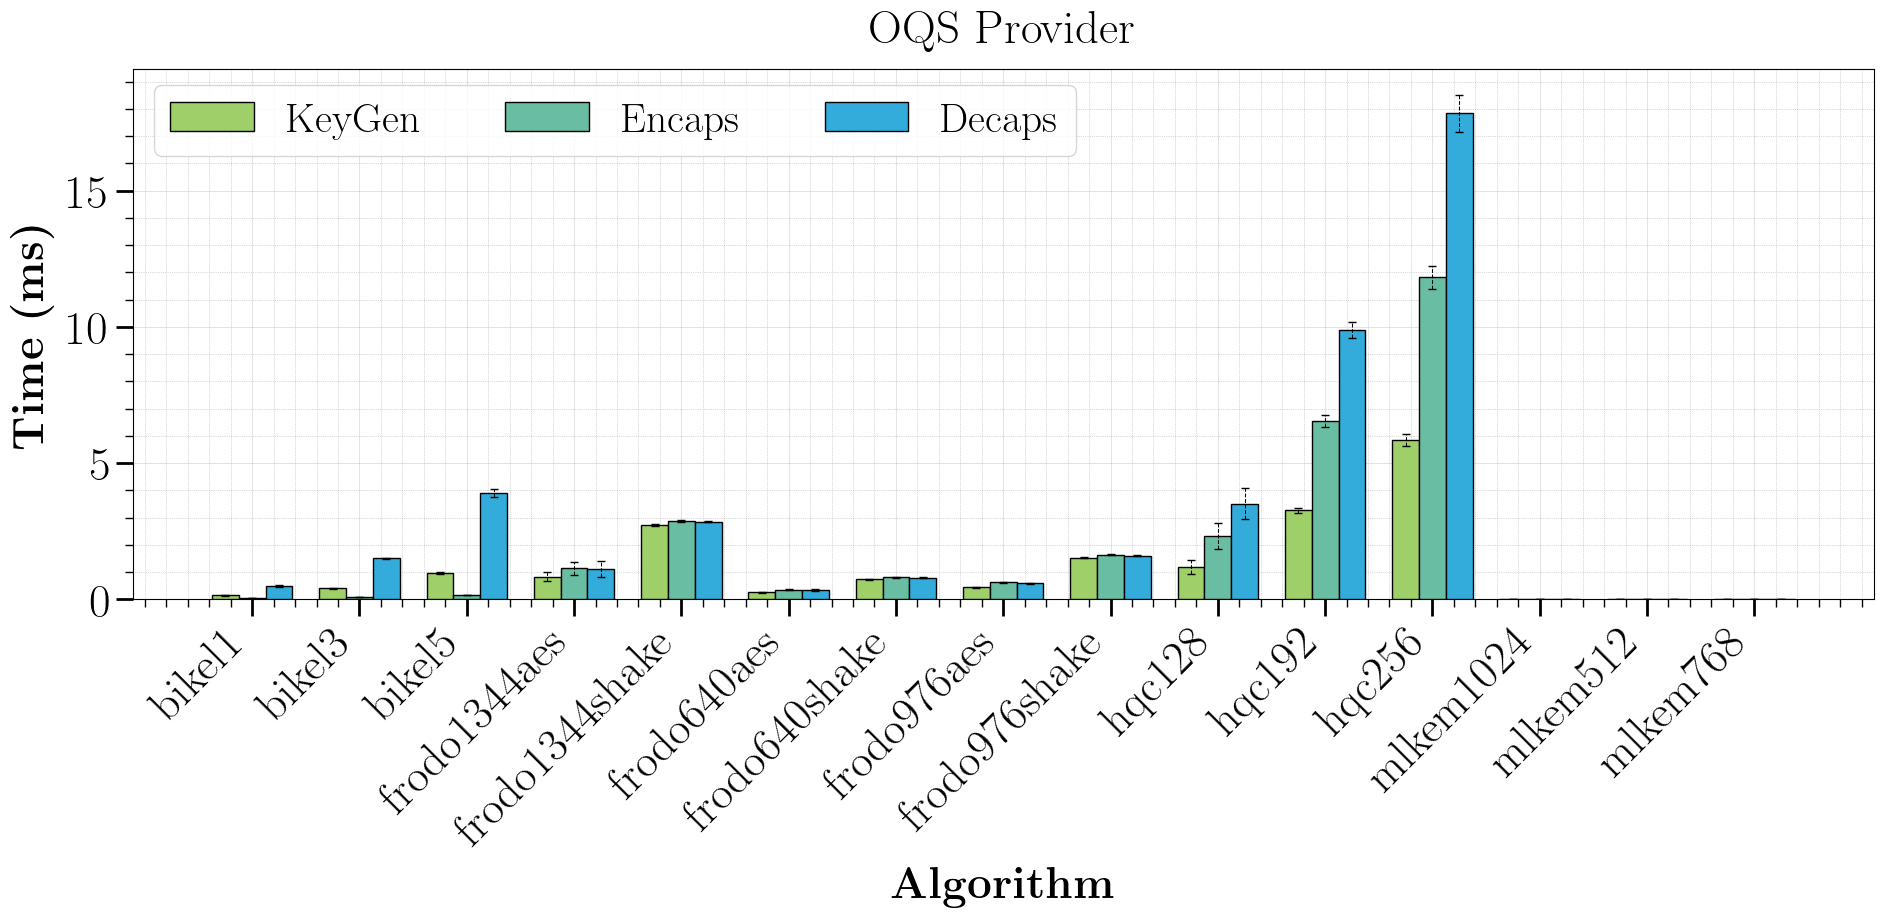

In [8]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_ops_times.pdf", y_start=None)

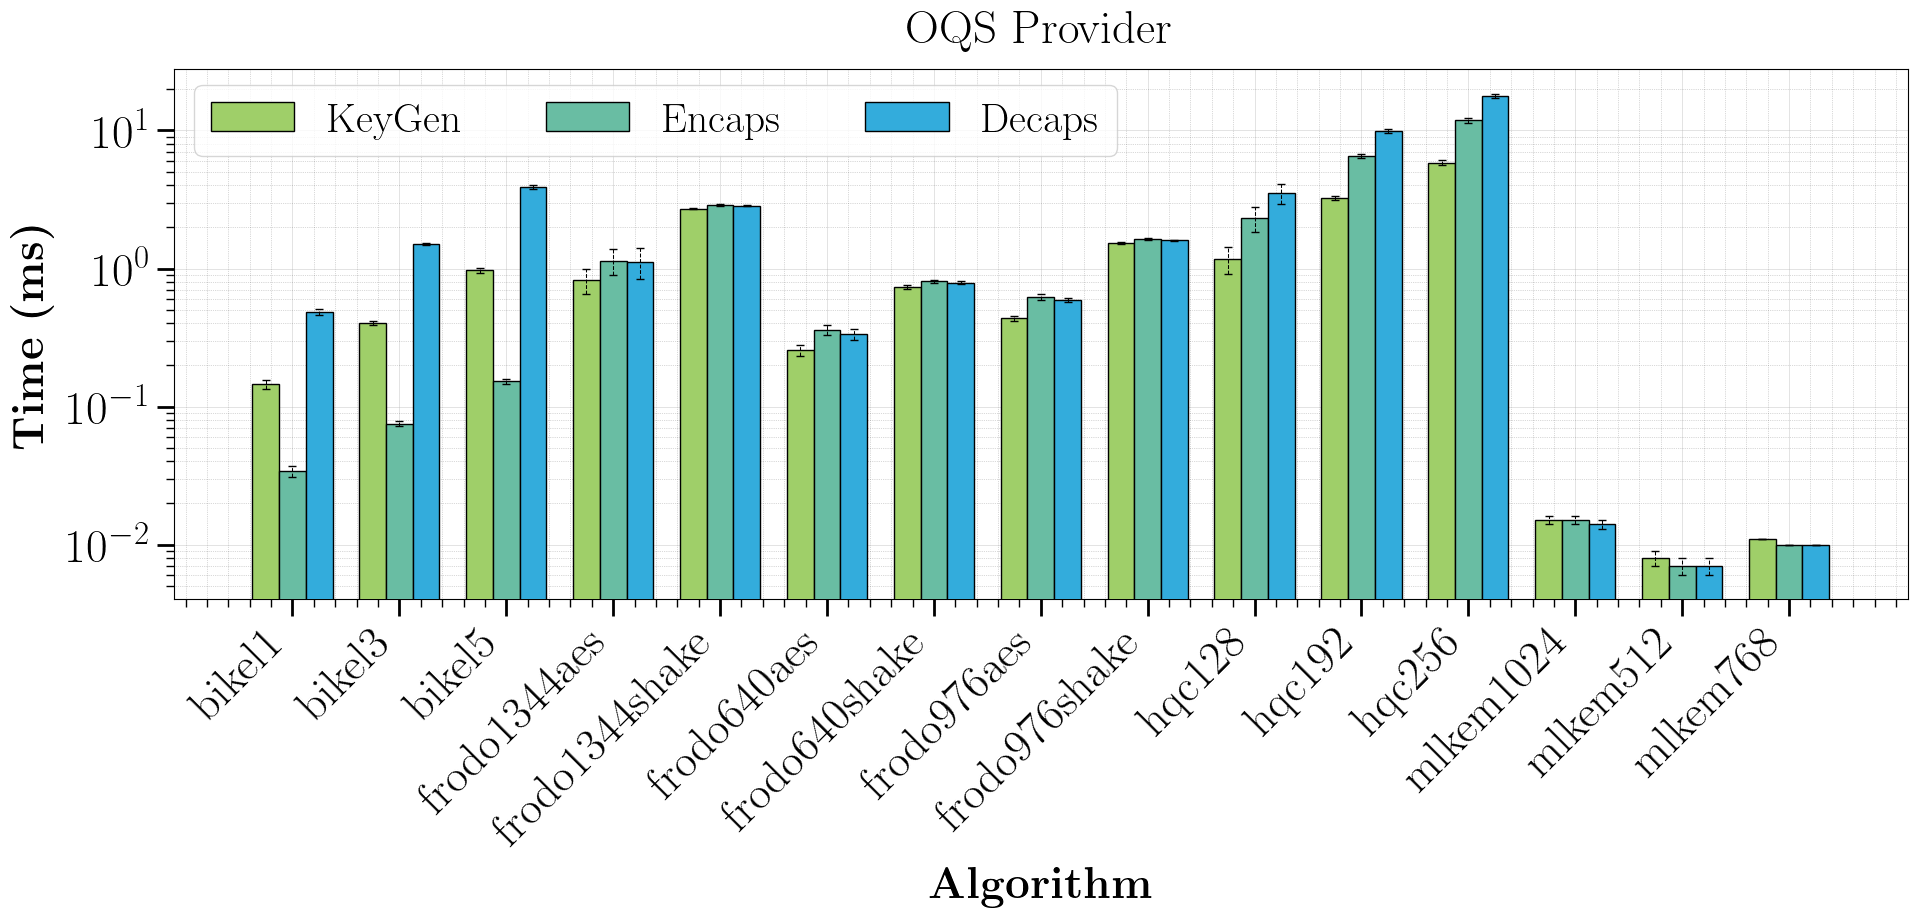

In [9]:
plot_kem_times(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_ops_times_log.pdf", y_start=None, log_scale=True)

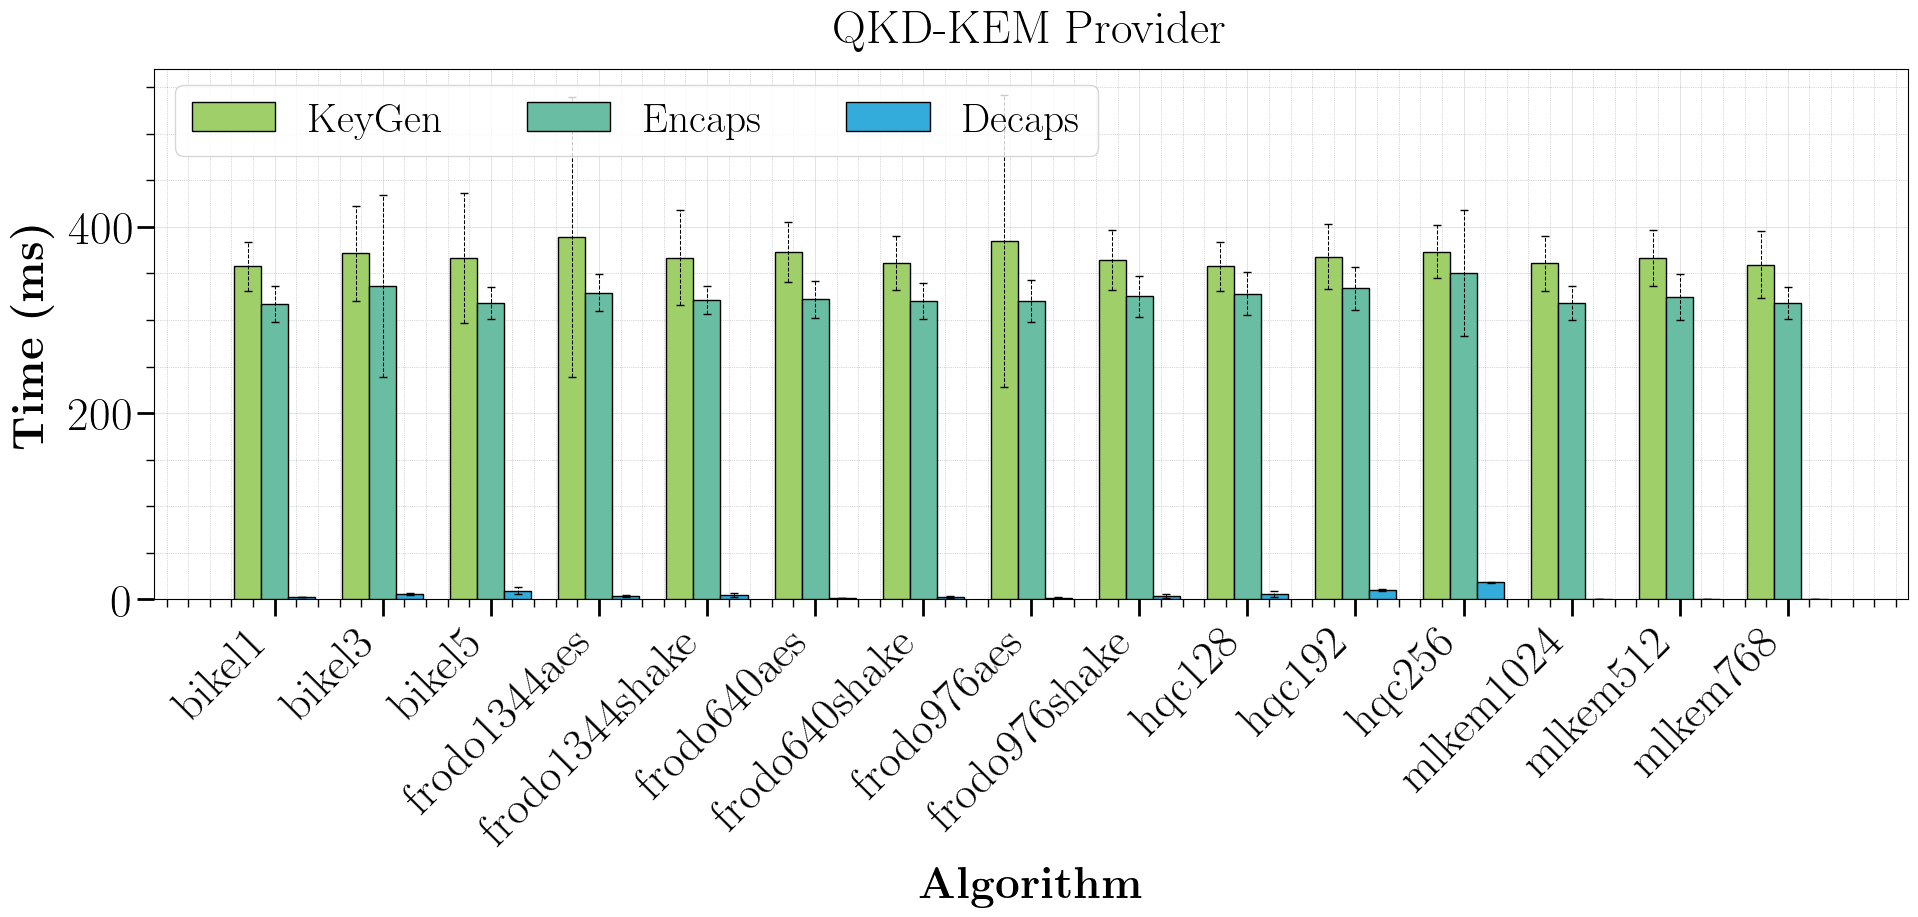

In [10]:
plot_kem_times(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_ops_times.pdf", y_start=None)

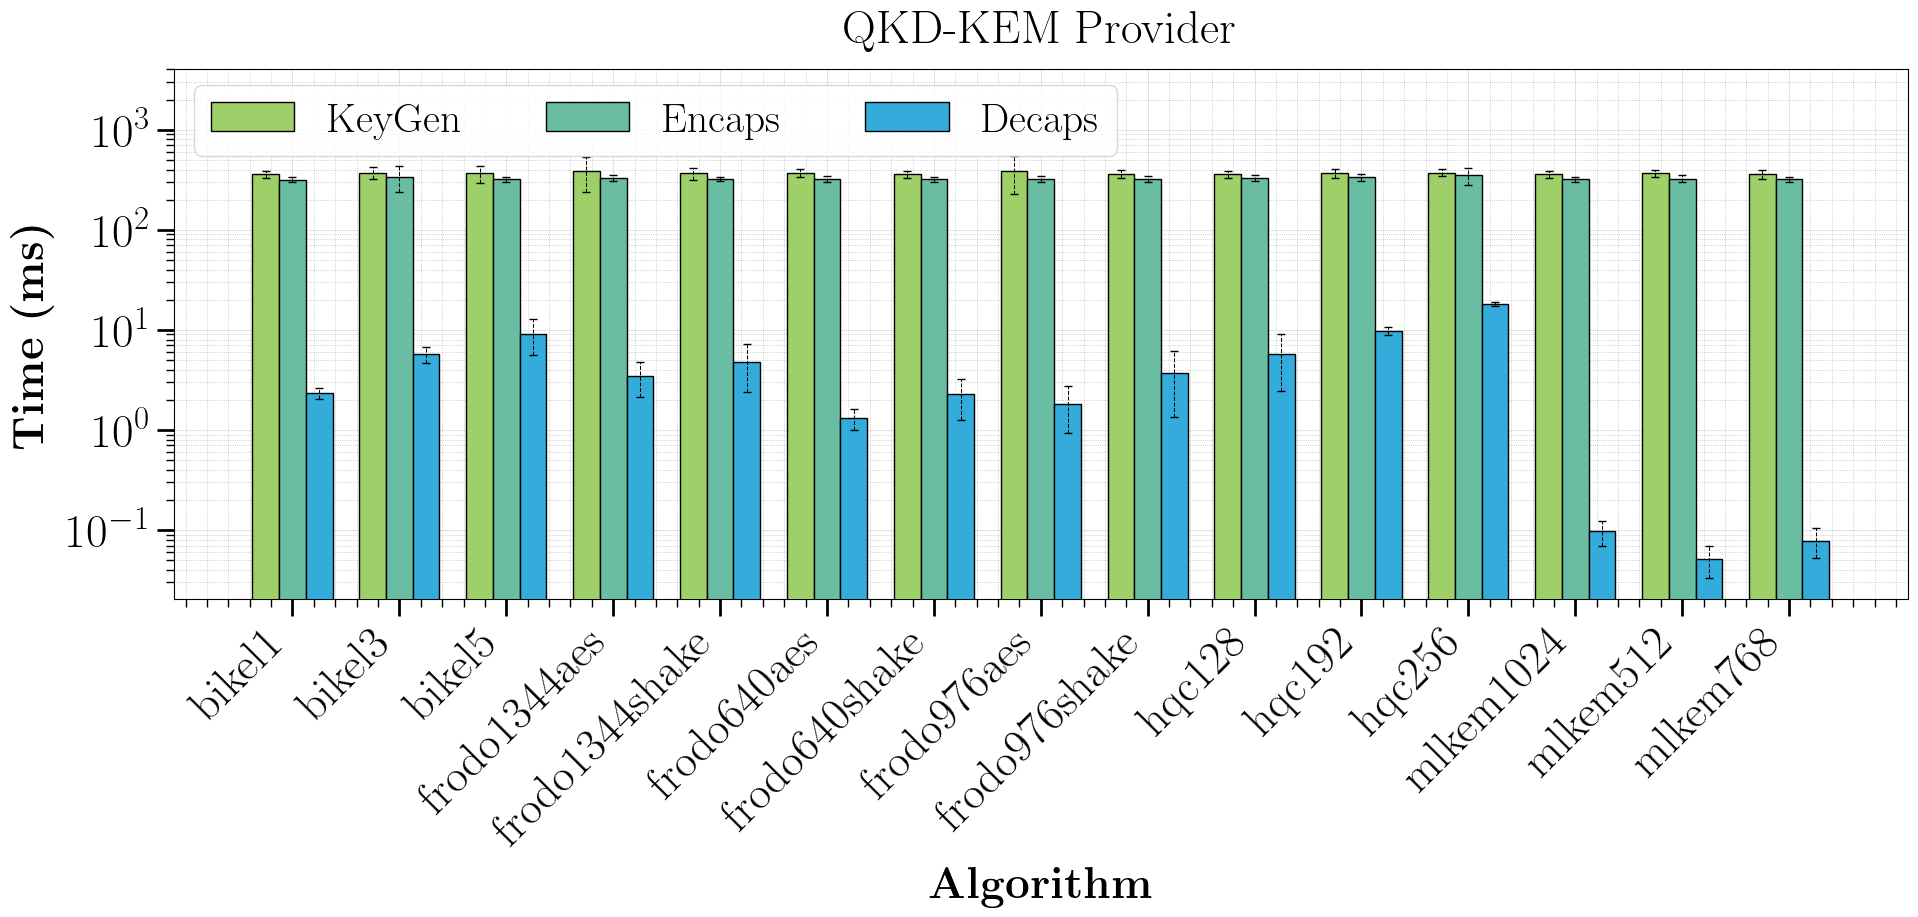

In [54]:
plot_kem_times(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_ops_times_log.pdf", y_start=None, y_end=4000, log_scale=True)

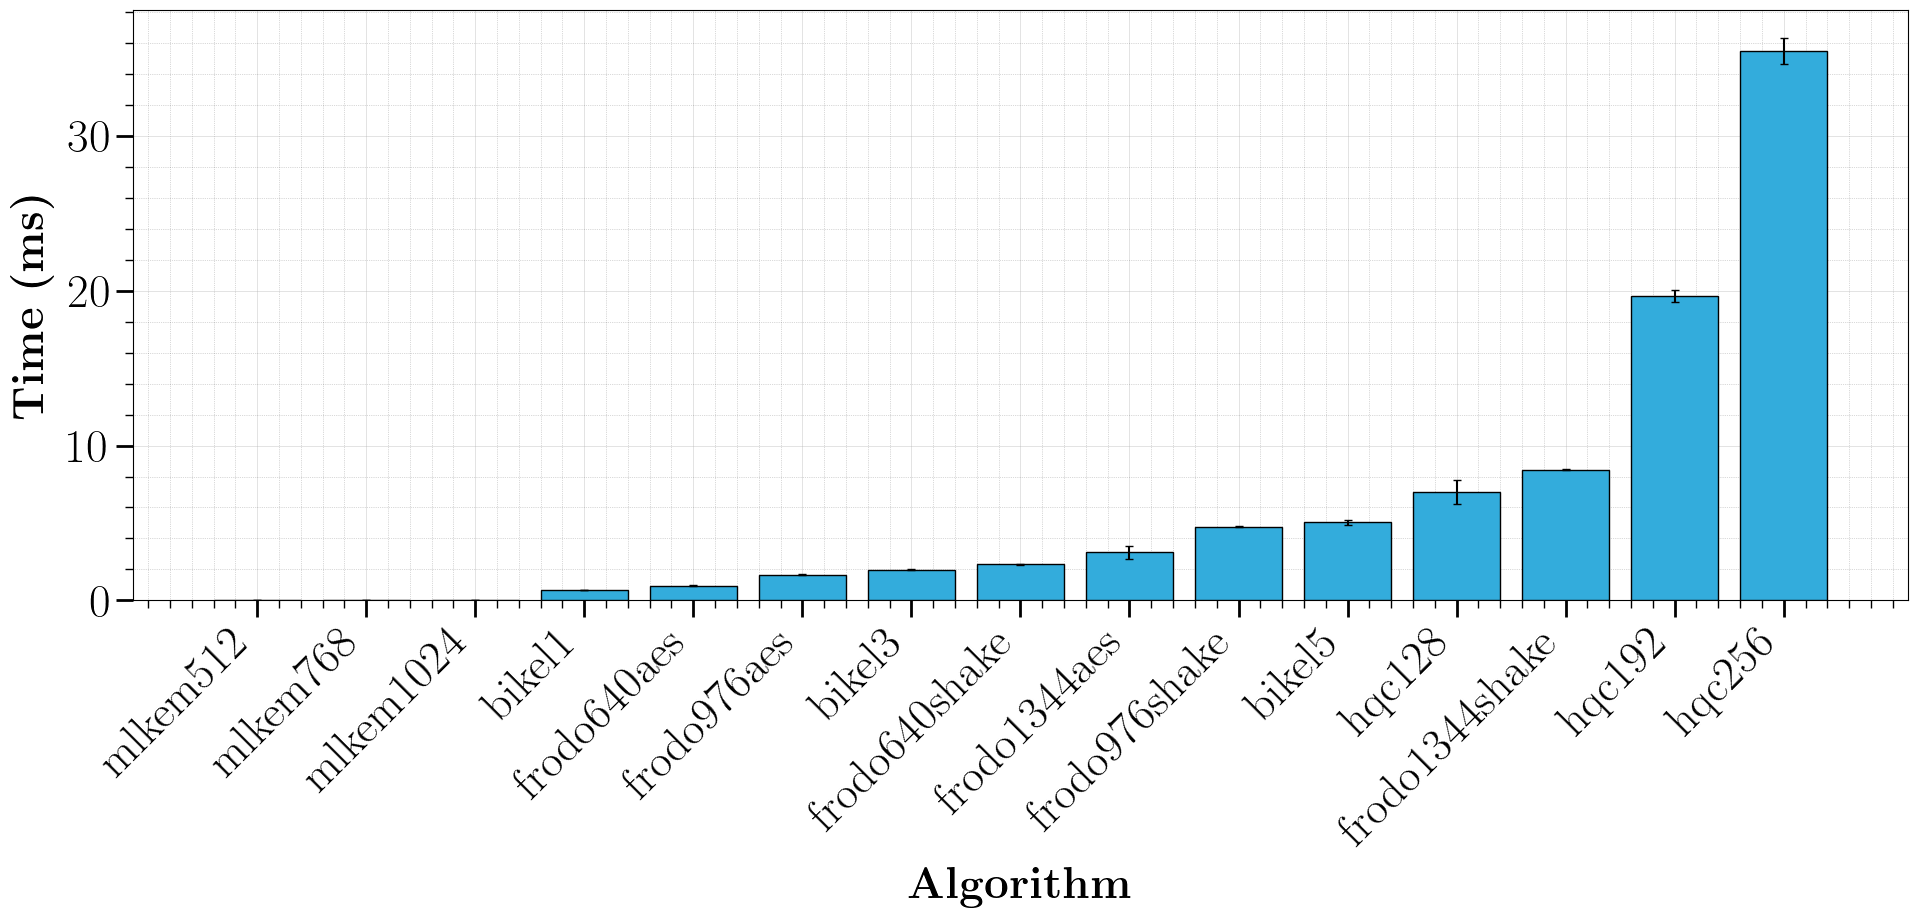

In [12]:
plot_kem_total_times(df_kems_stats, error_suffix="_std", plot_title="kems_total_times.pdf", y_start=None)

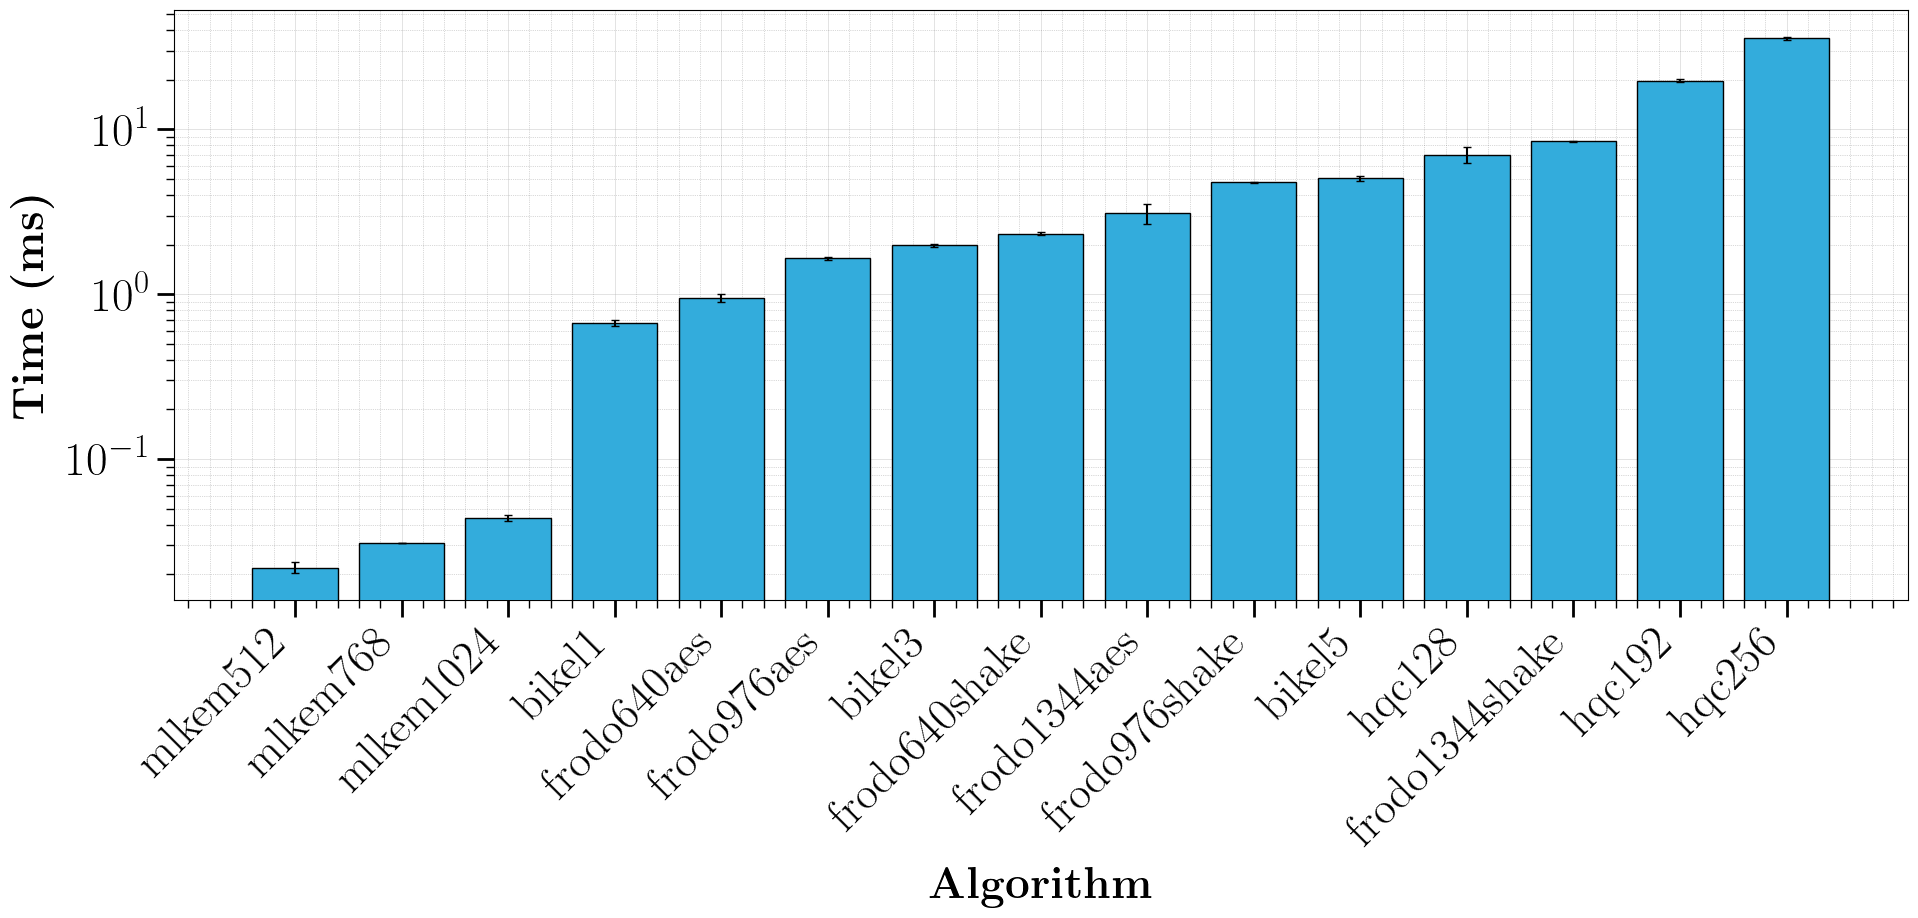

In [13]:
plot_kem_total_times(df_kems_stats, error_suffix="_std", plot_title="kems_total_times_log.pdf", y_start=None, log_scale=True)

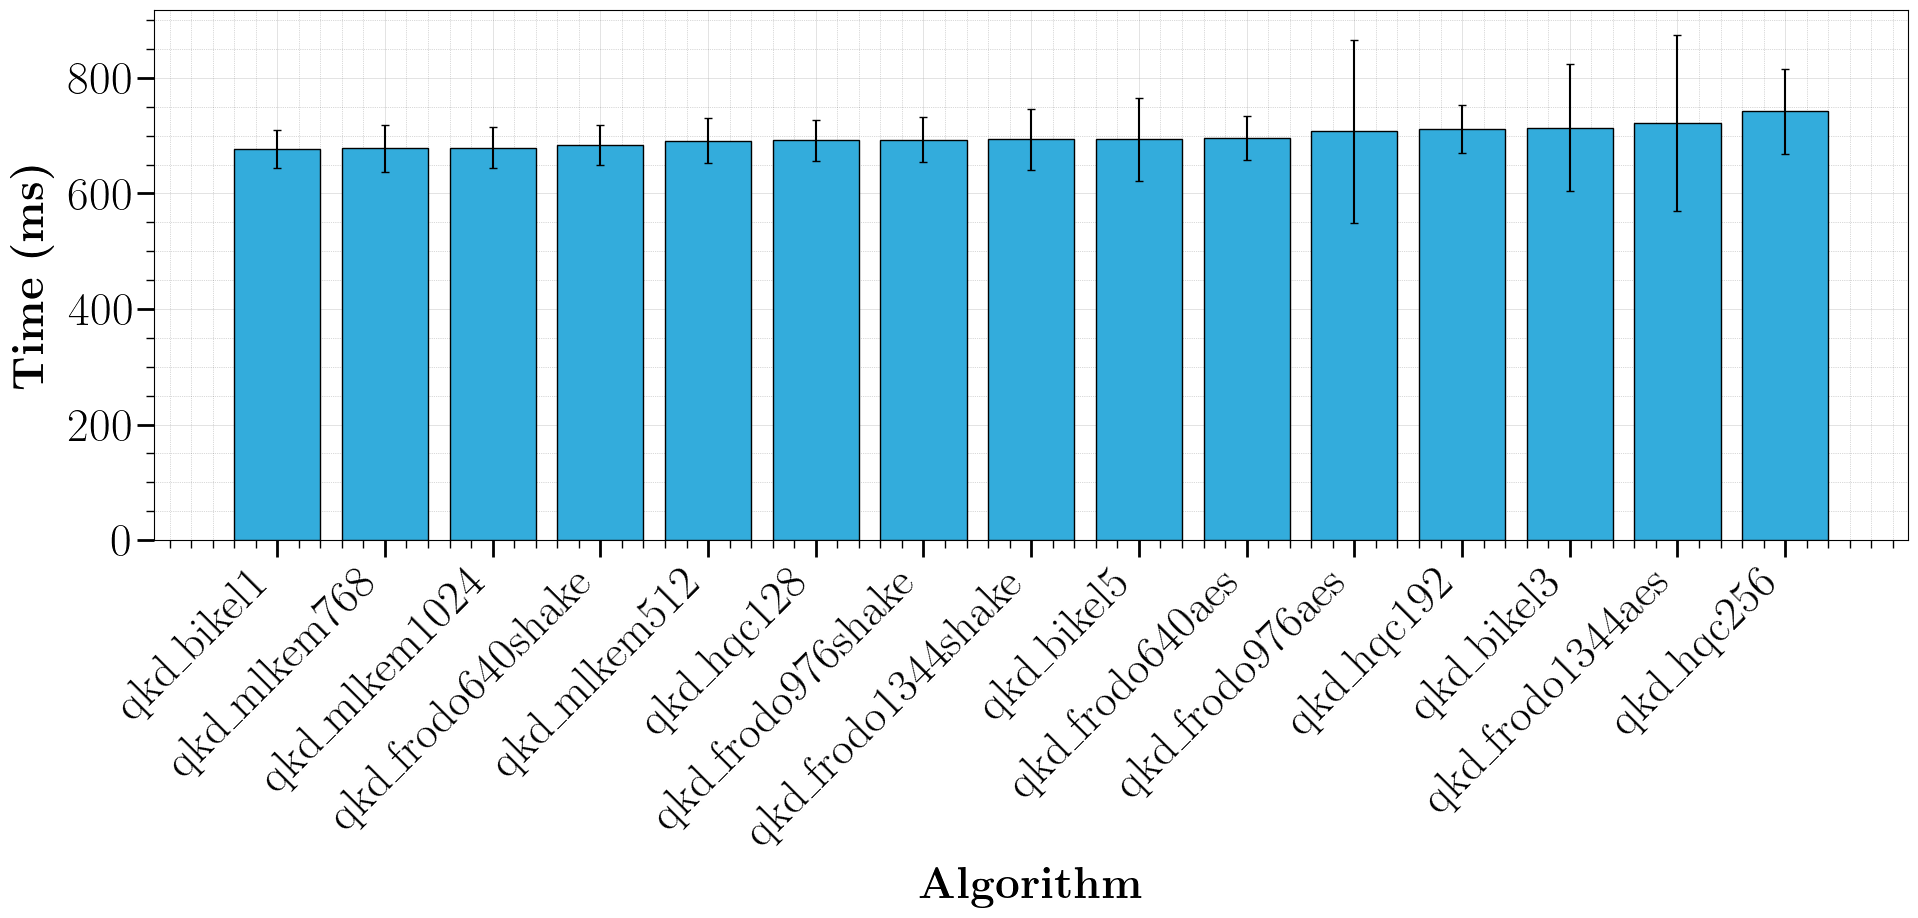

In [14]:
plot_kem_total_times(df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_total_times.pdf", y_start=None)

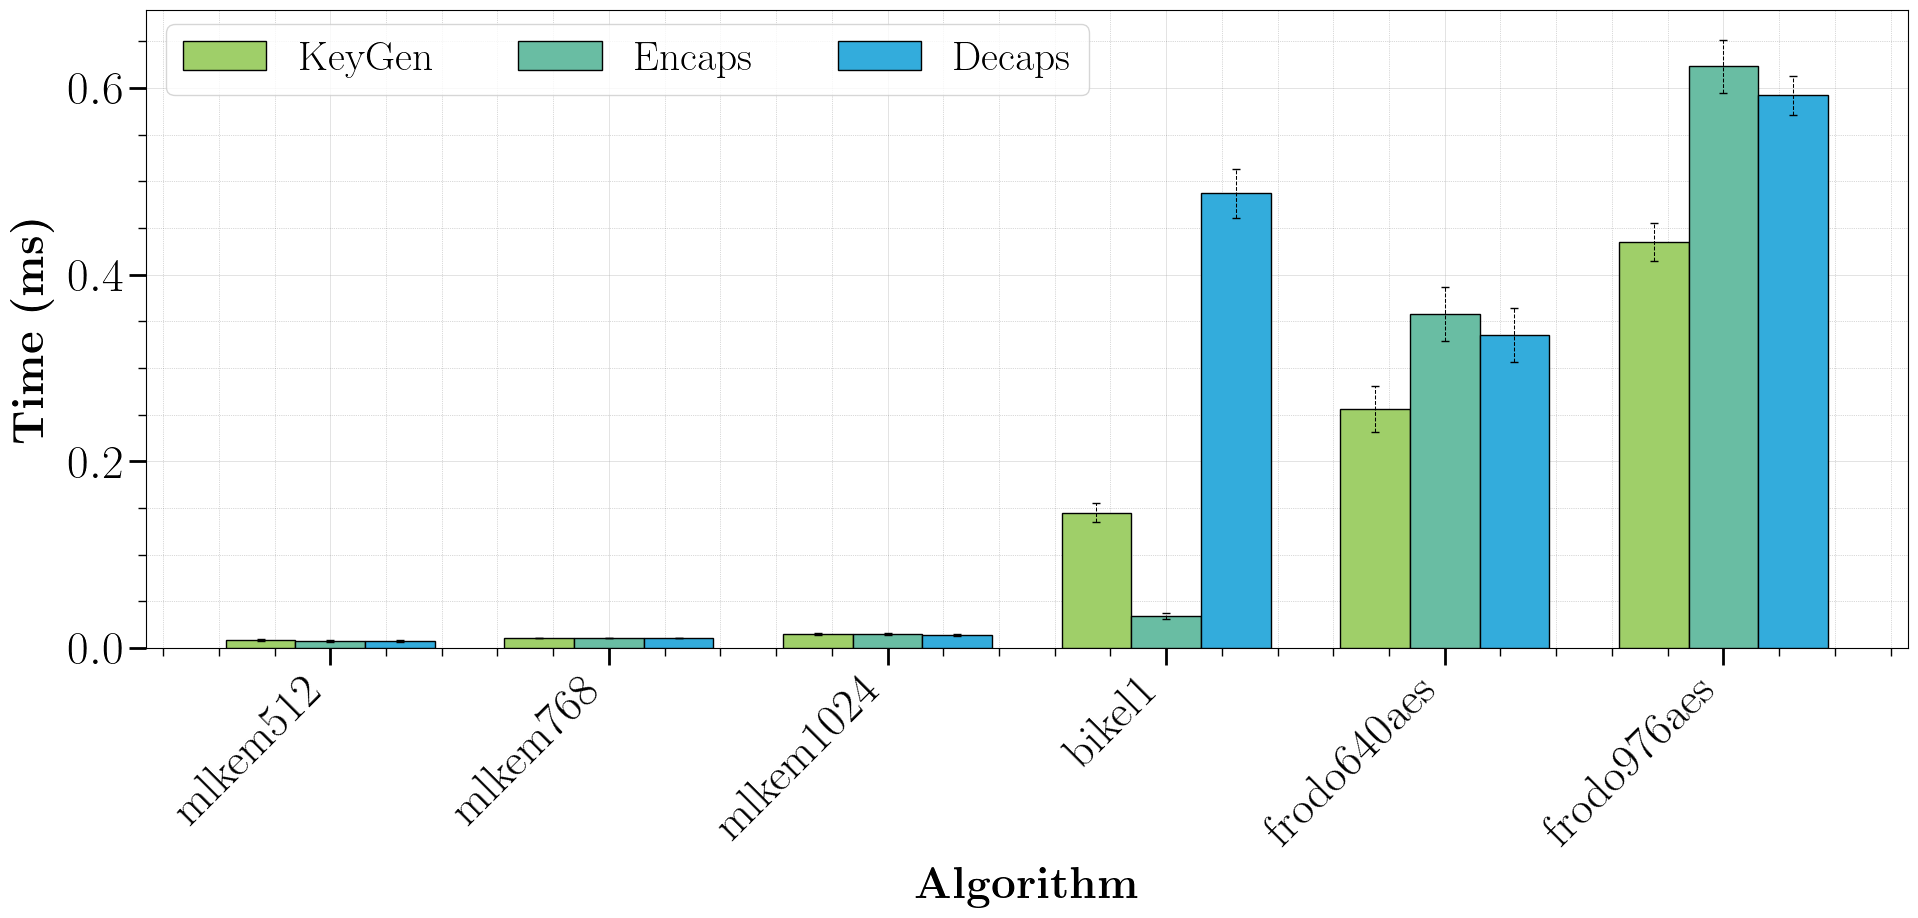

In [15]:
plot_kems_fast(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_fast_times.pdf")

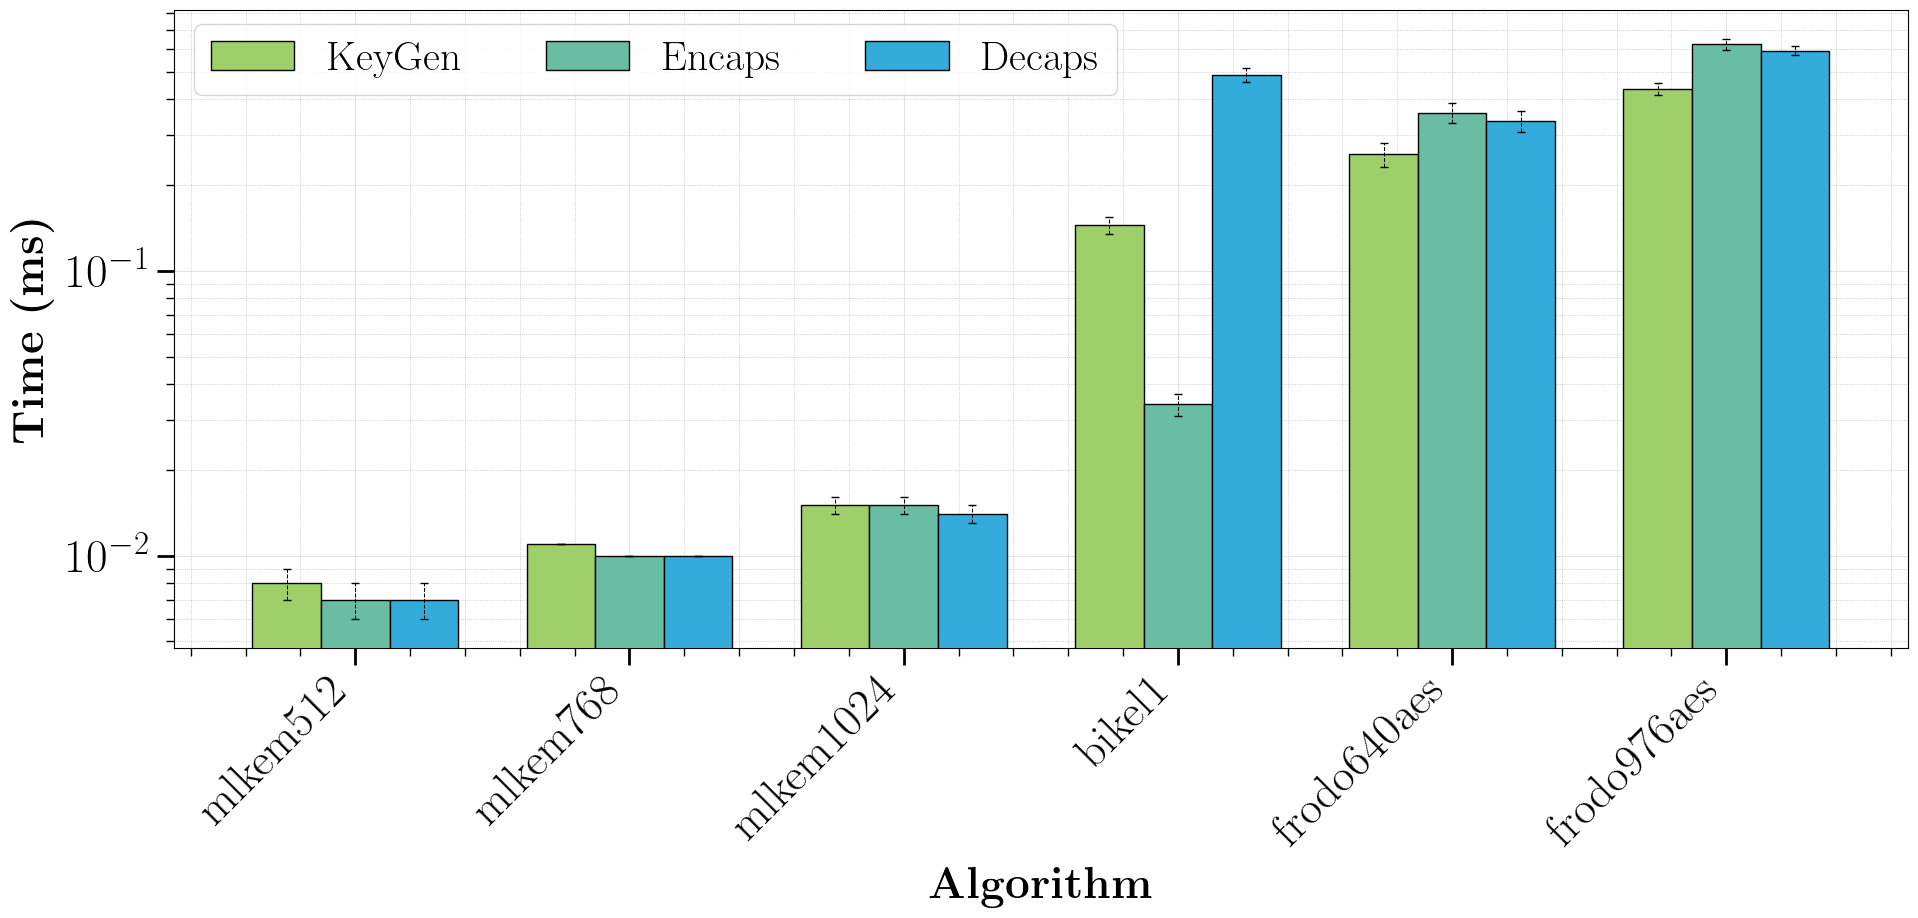

In [16]:
plot_kems_fast(input_df=df_kems_stats, error_suffix="_std", plot_title="kems_fast_times_log.pdf", log_scale=True)

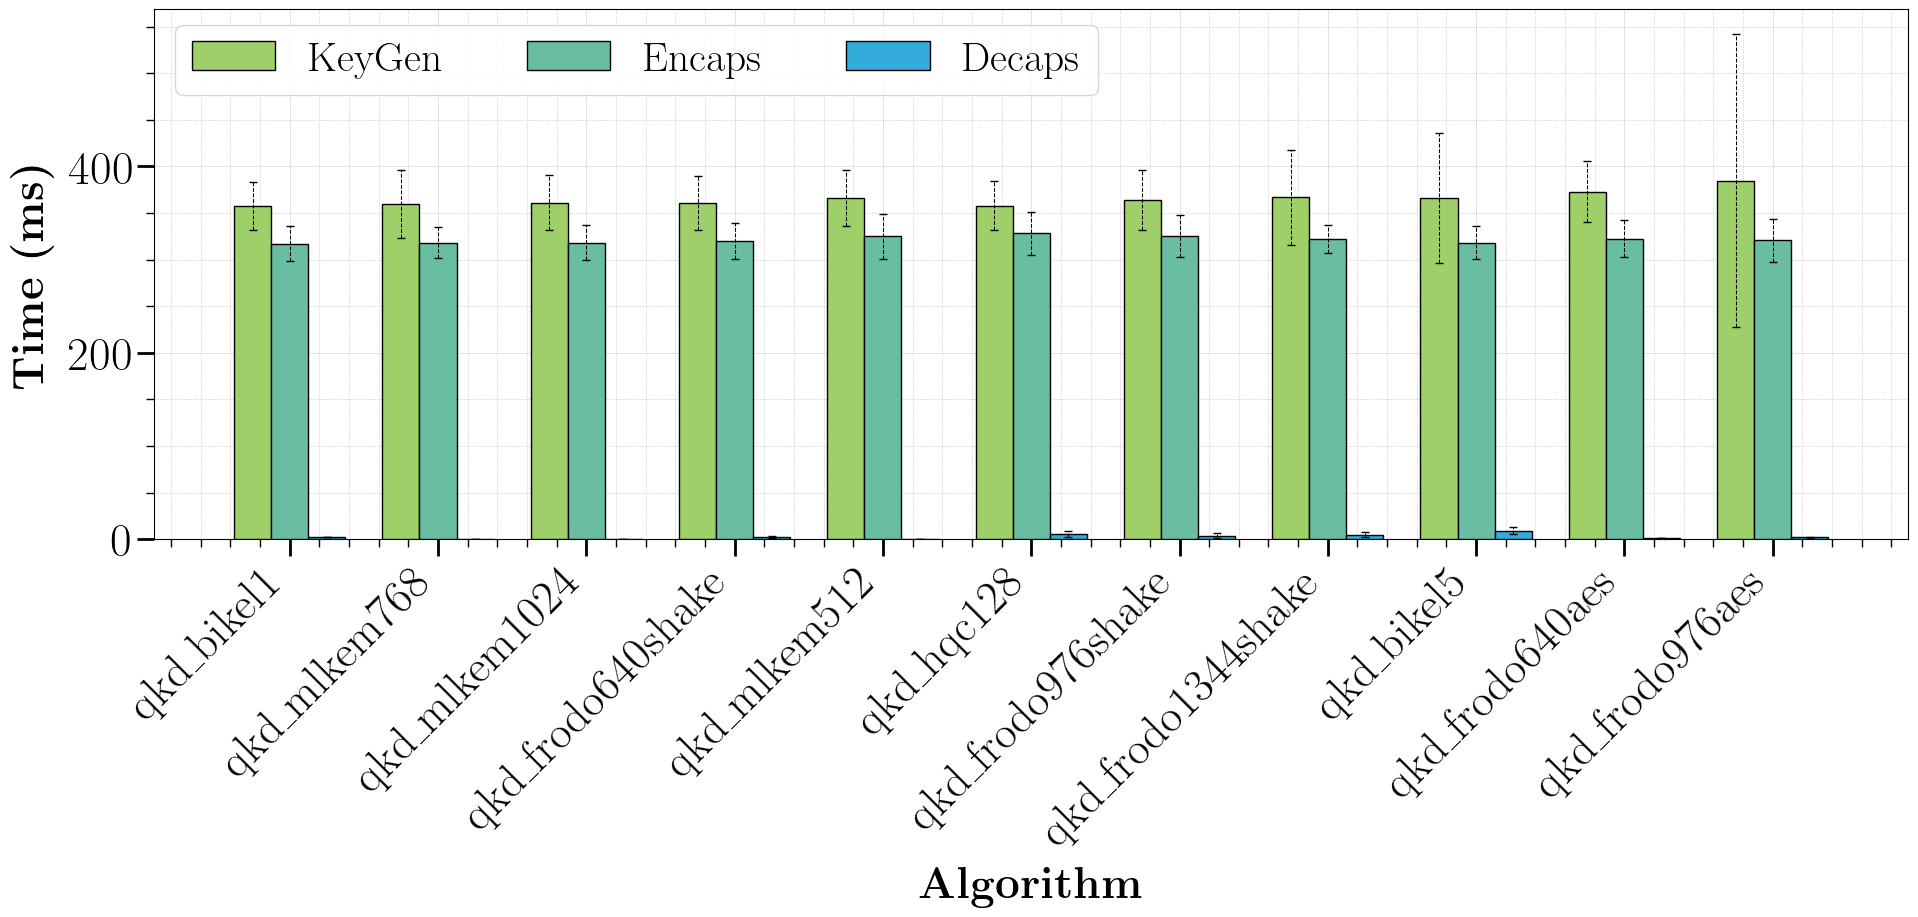

In [17]:
plot_kems_fast(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_fast_times.pdf")

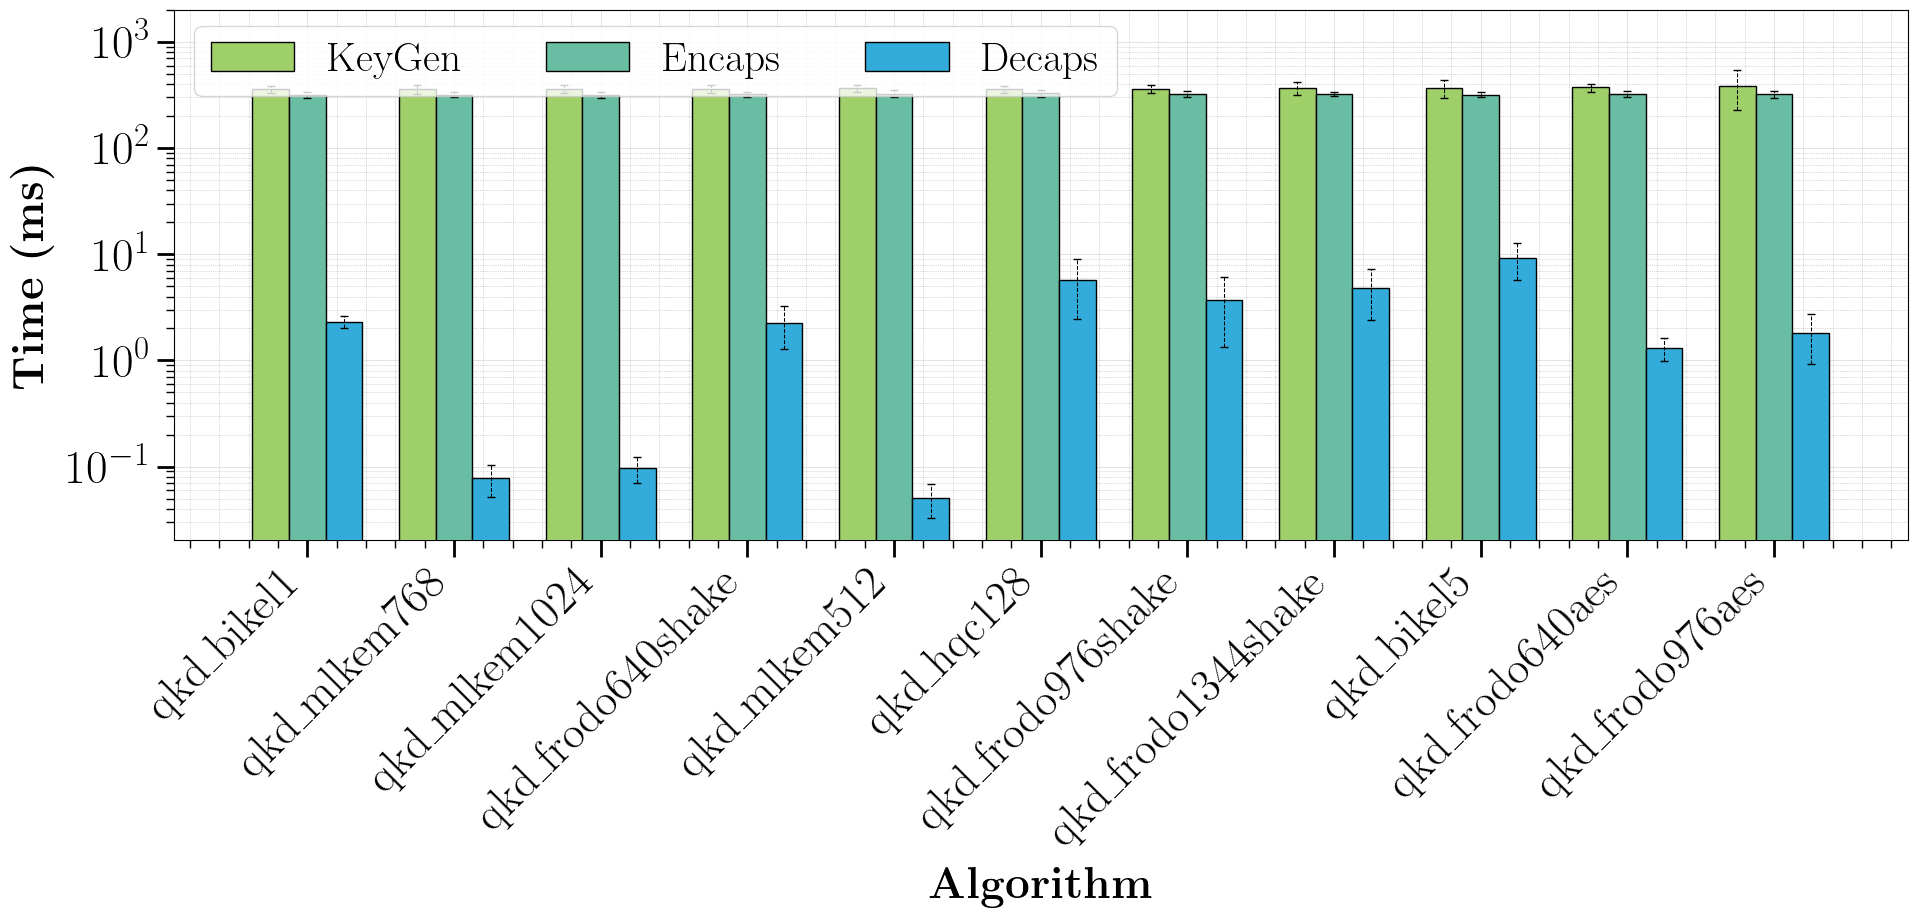

In [18]:
plot_kems_fast(input_df=df_qkdkems_stats, error_suffix="_std", plot_title="qkdkems_fast_times_log.pdf", y_end=2000, log_scale=True)

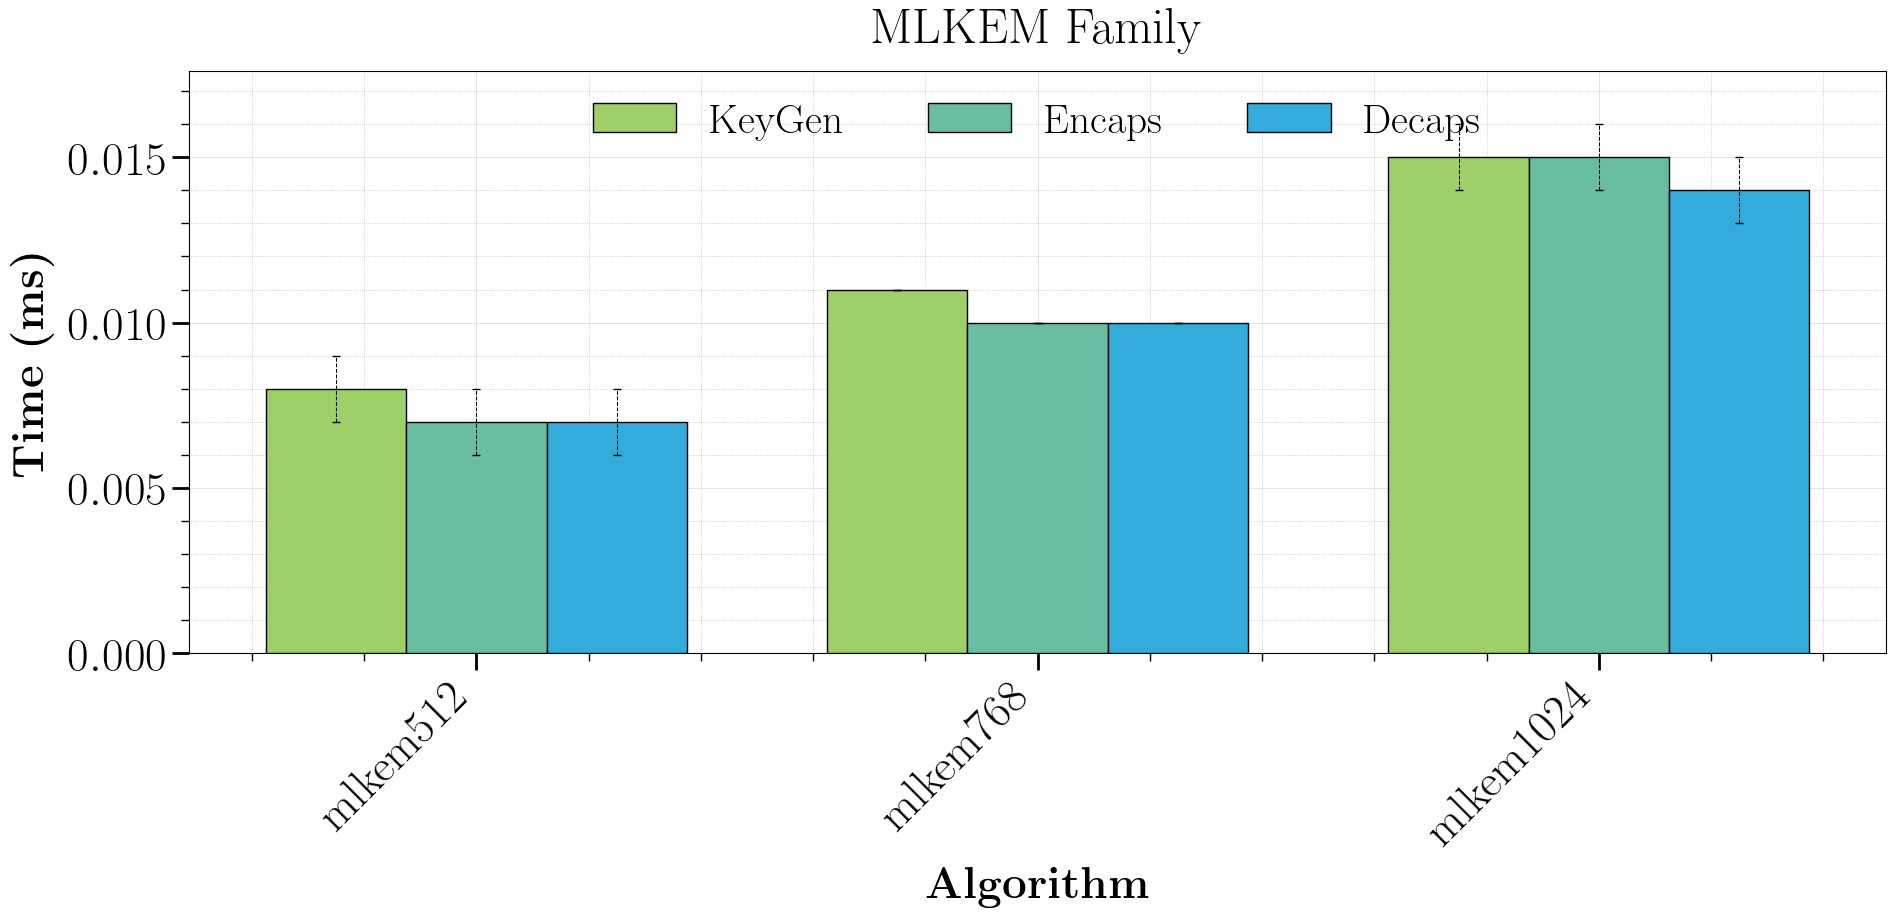

In [19]:
plot_kem_family(input_df=df_kems_stats, family='mlkem', error_suffix="_std", plot_title="mlkem_times.pdf", log_scale=False)

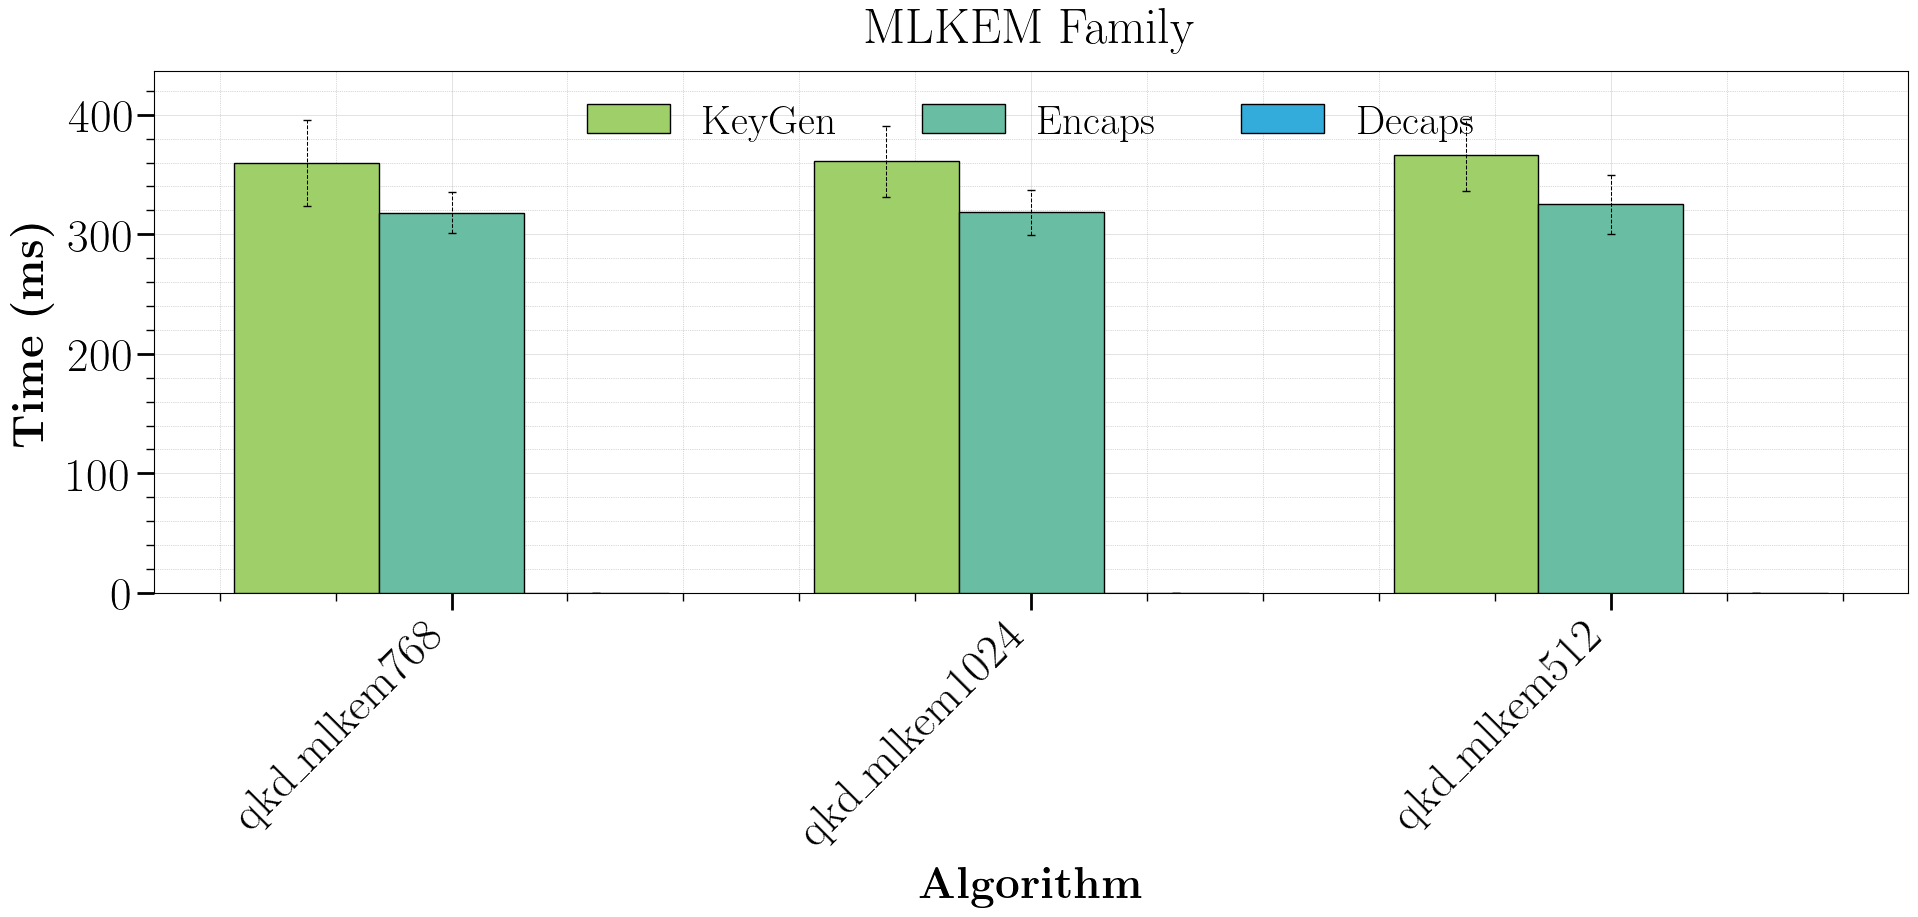

In [20]:
plot_kem_family(input_df=df_qkdkems_stats, family='mlkem', error_suffix="_std", plot_title="qkdmlkem_times.pdf", log_scale=False)

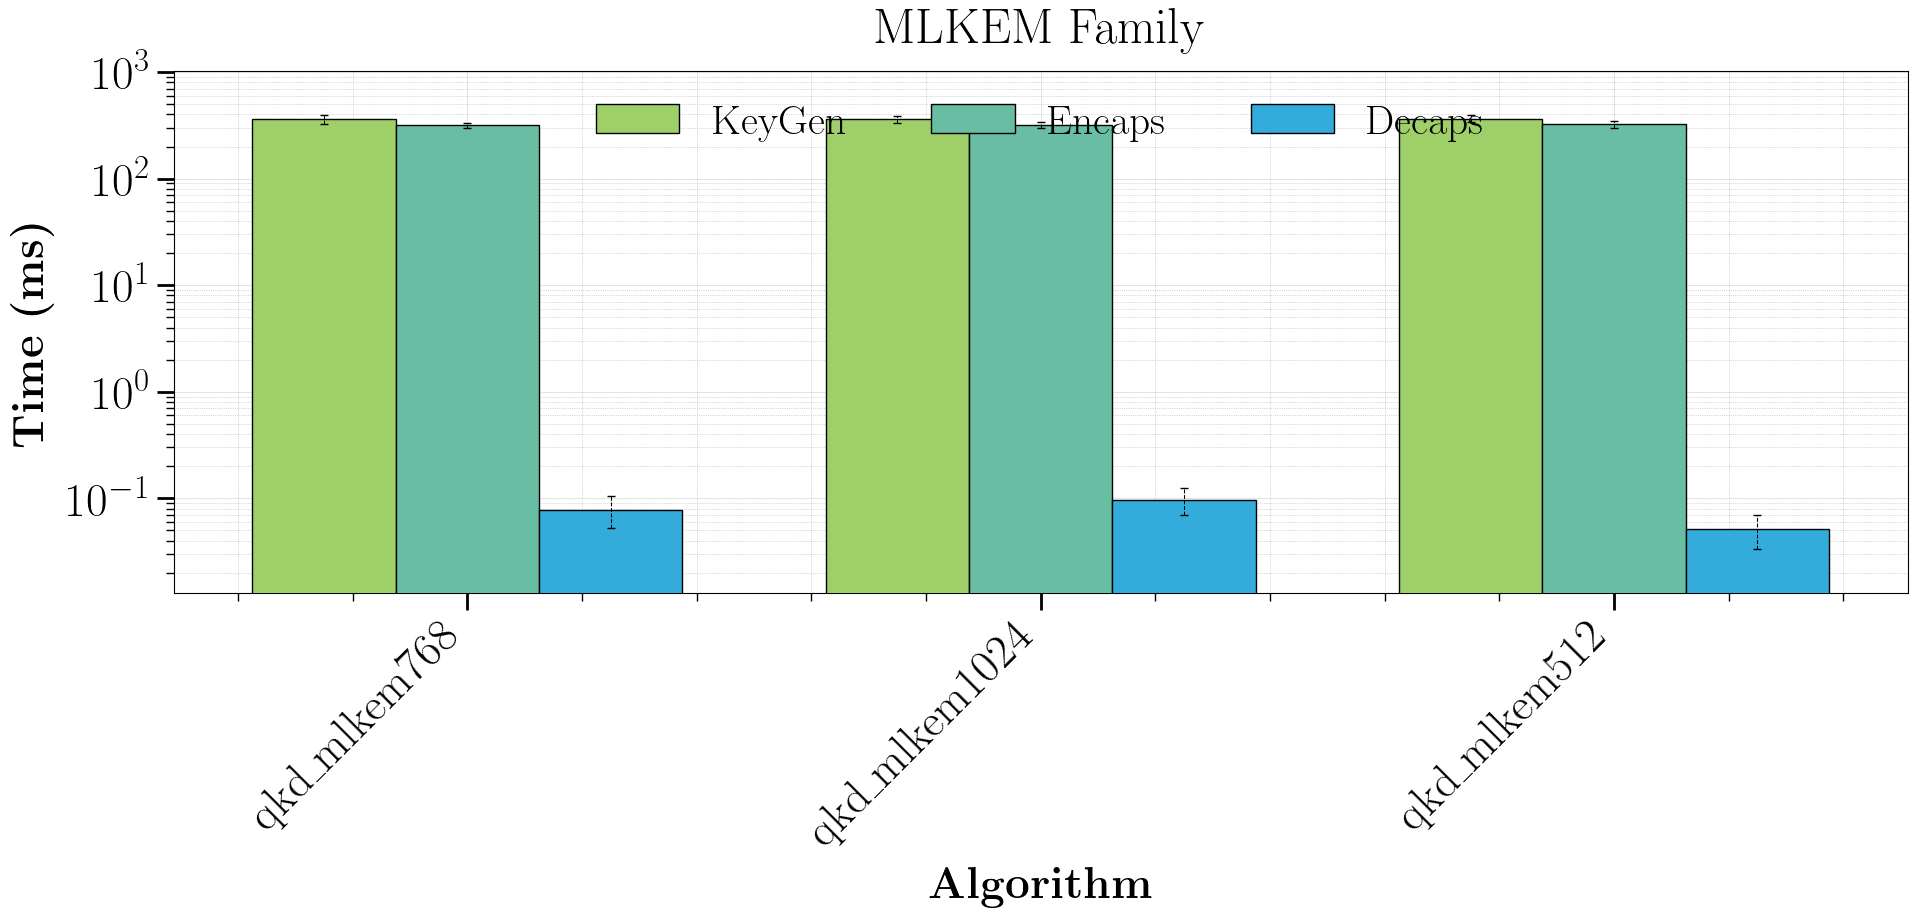

In [21]:
plot_kem_family(input_df=df_qkdkems_stats, family='mlkem', error_suffix="_std", plot_title="qkdmlkem_times_log.pdf", log_scale=True)

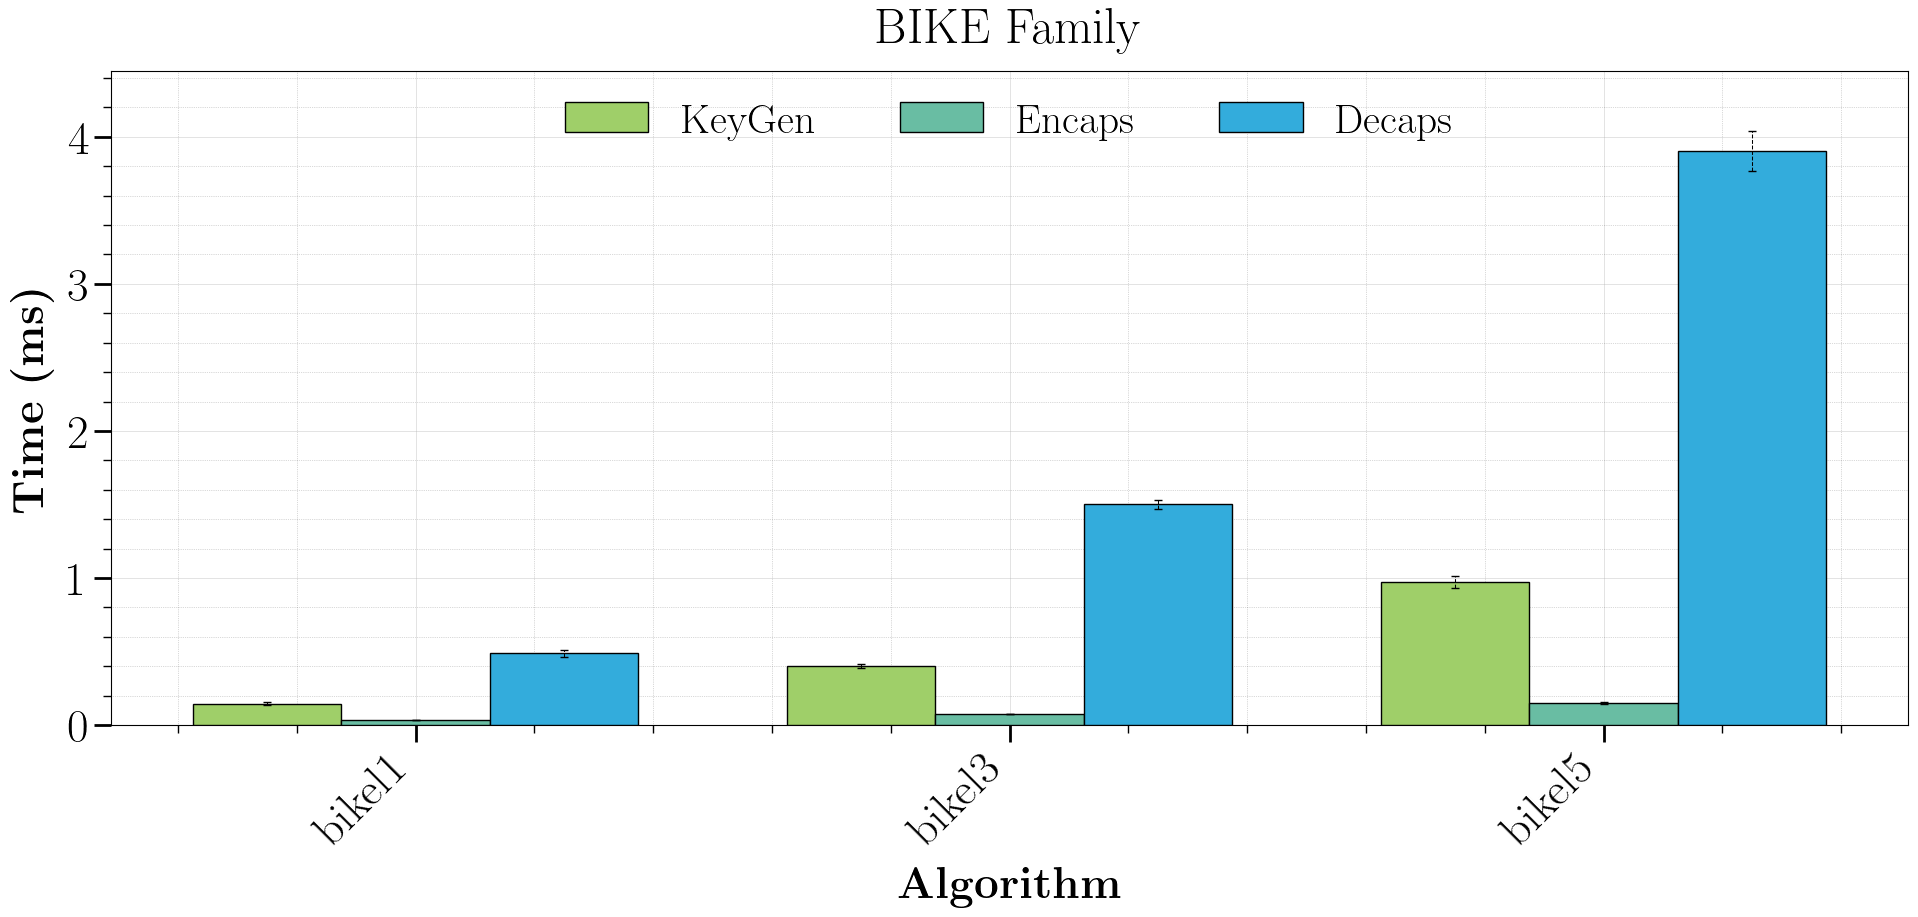

In [22]:
plot_kem_family(input_df=df_kems_stats, family='bike', error_suffix="_std", plot_title="bike_times.pdf", log_scale=False)

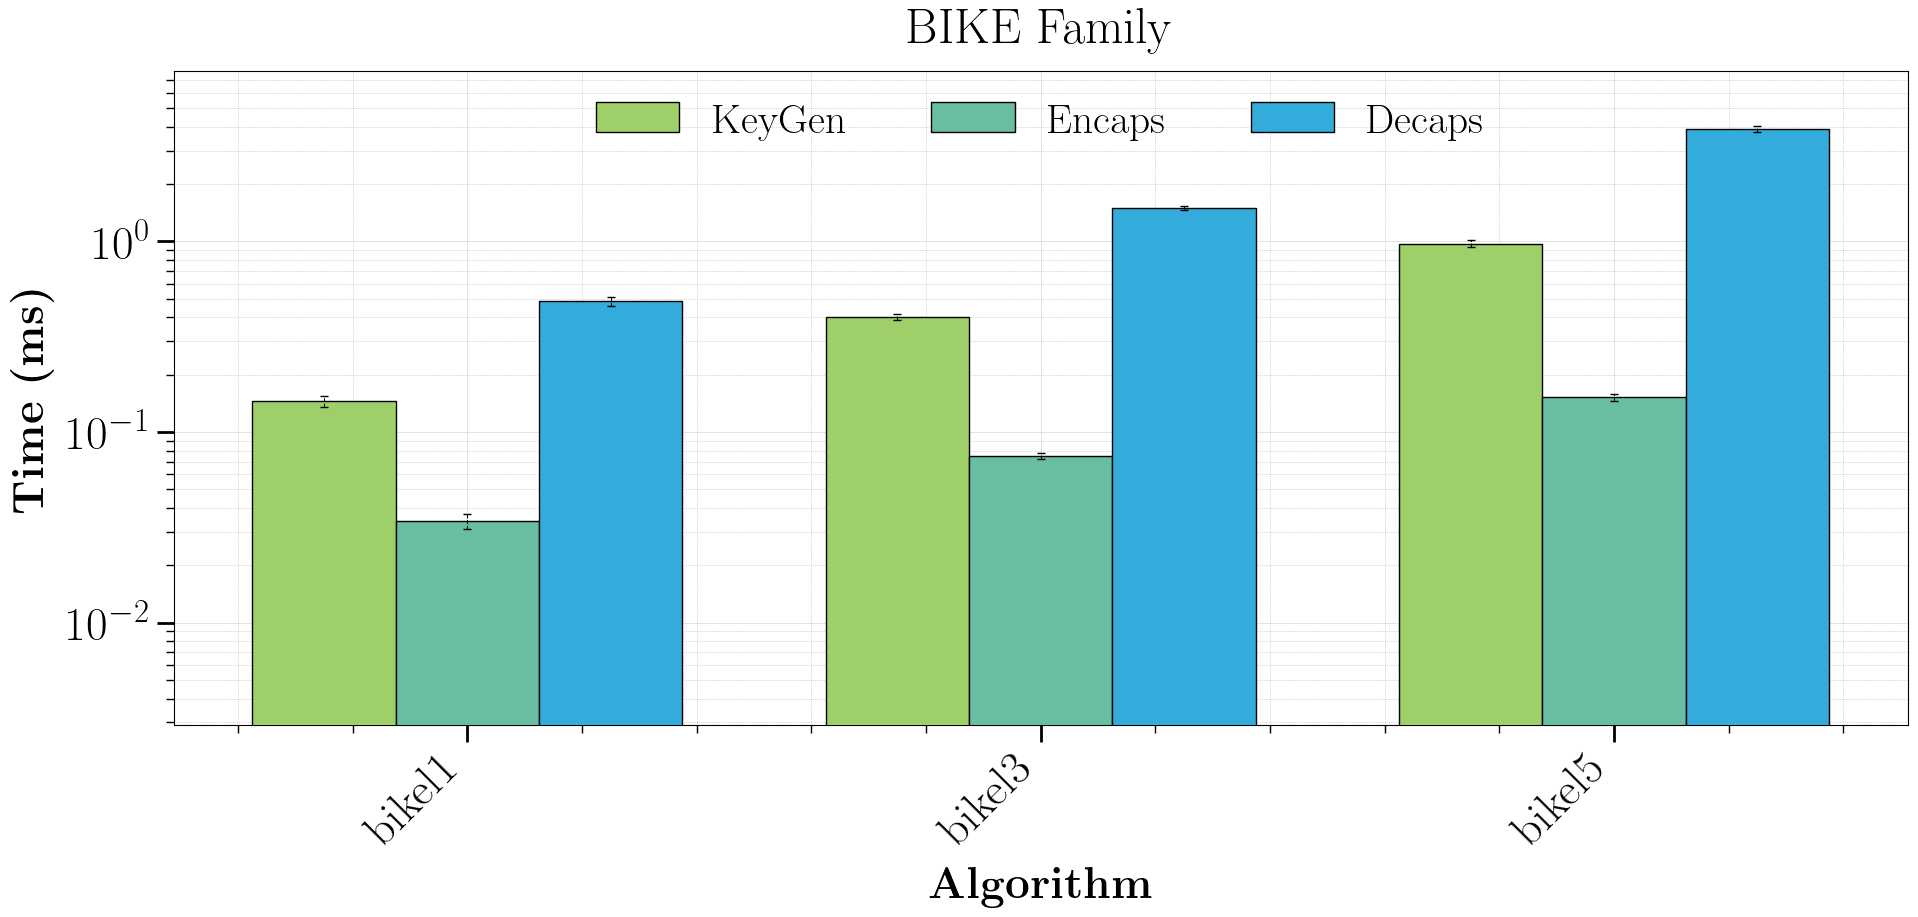

In [23]:
plot_kem_family(input_df=df_kems_stats, family='bike', error_suffix="_std", plot_title="bike_times_log.pdf", log_scale=True)

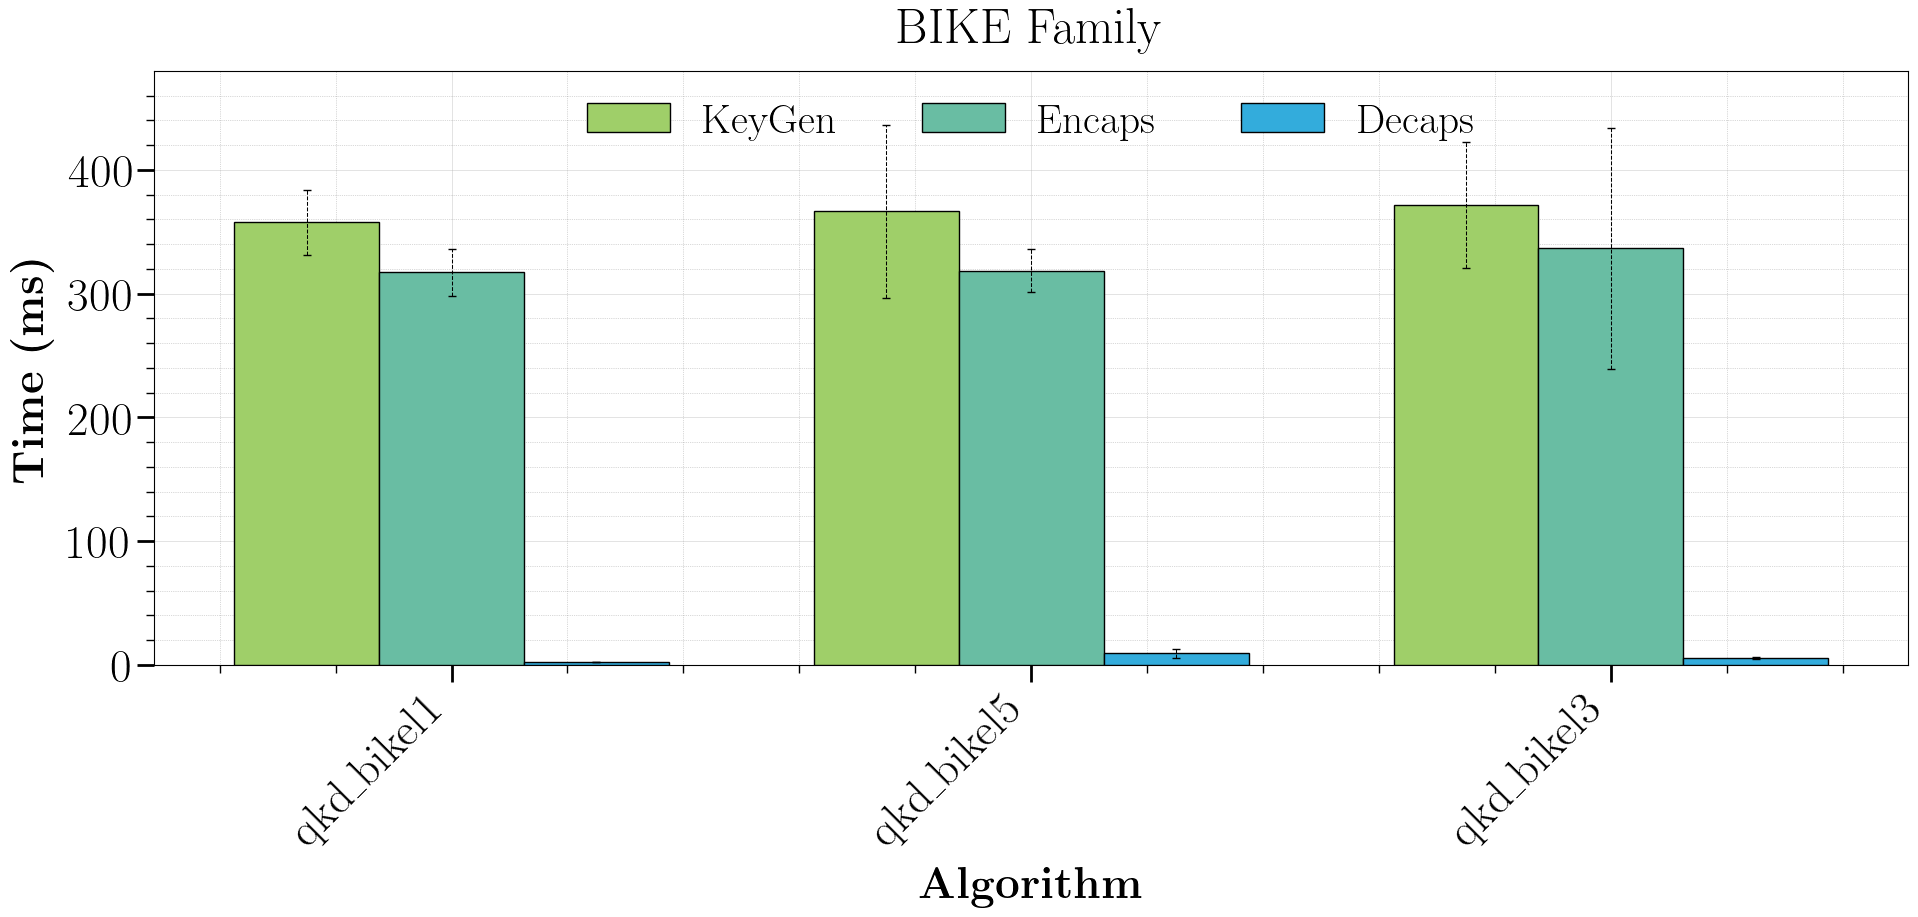

In [24]:
plot_kem_family(input_df=df_qkdkems_stats, family='bike', error_suffix="_std", plot_title="qkdbike_times.pdf", log_scale=False)

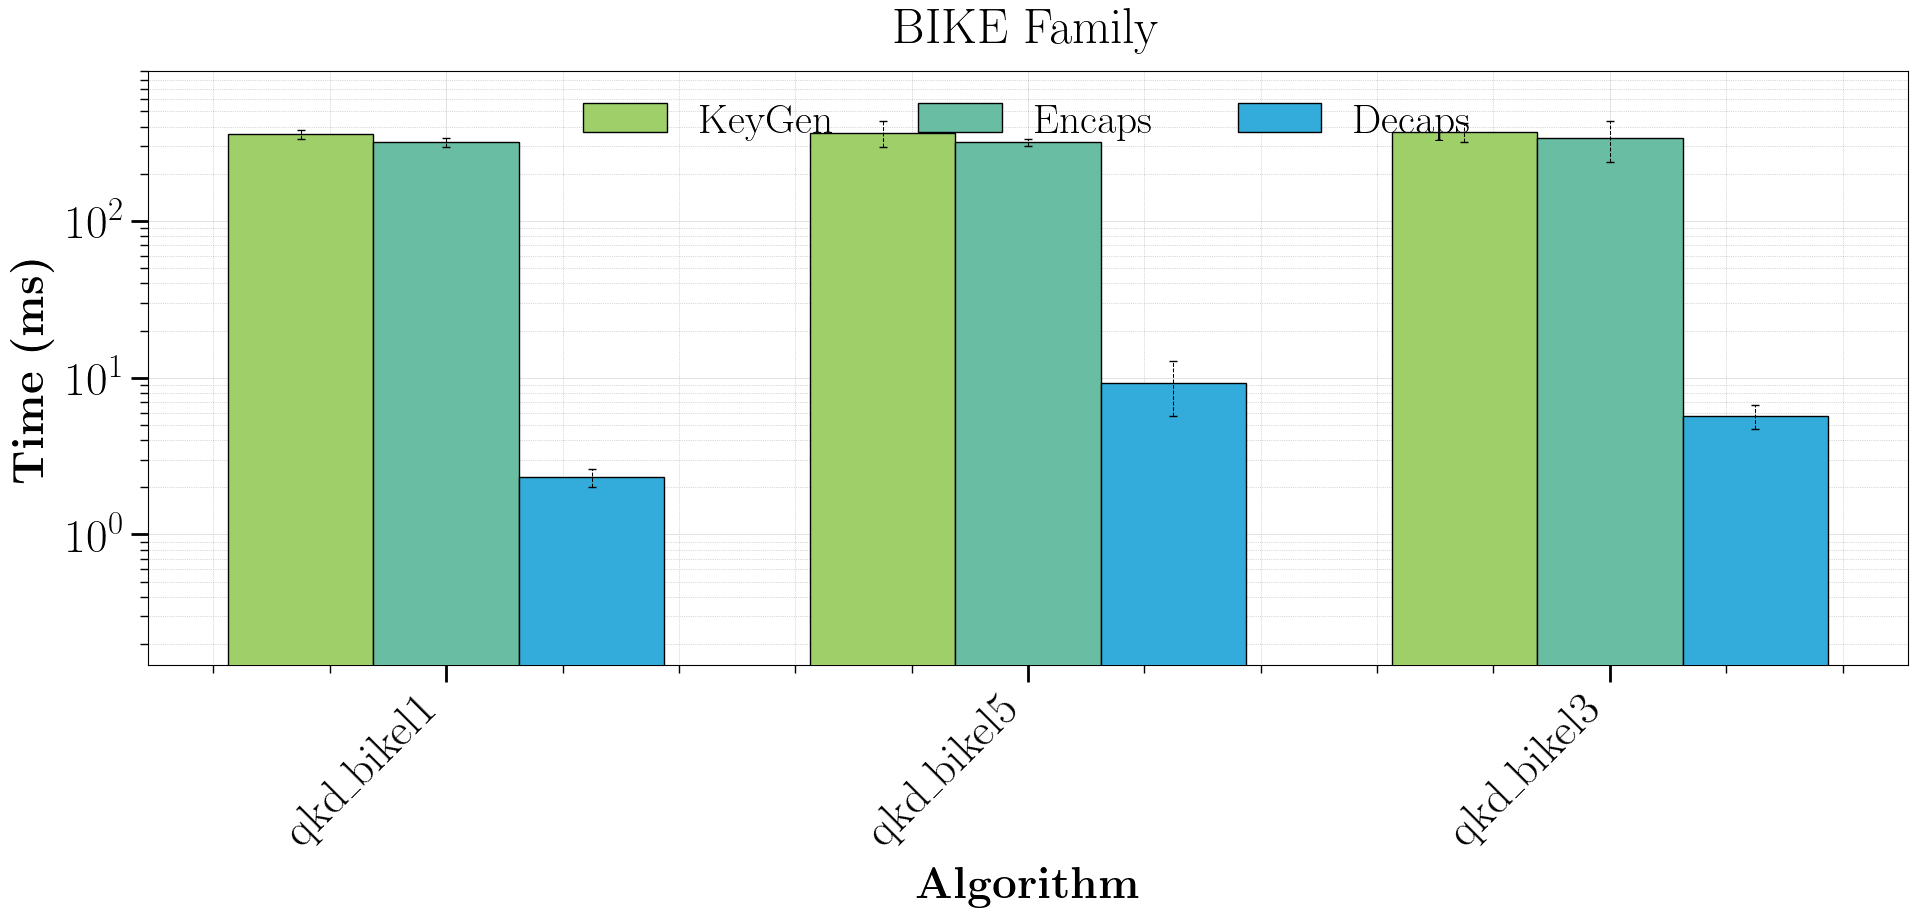

In [25]:
plot_kem_family(input_df=df_qkdkems_stats, family='bike', error_suffix="_std", plot_title="qkdbike_times_log.pdf", log_scale=True)

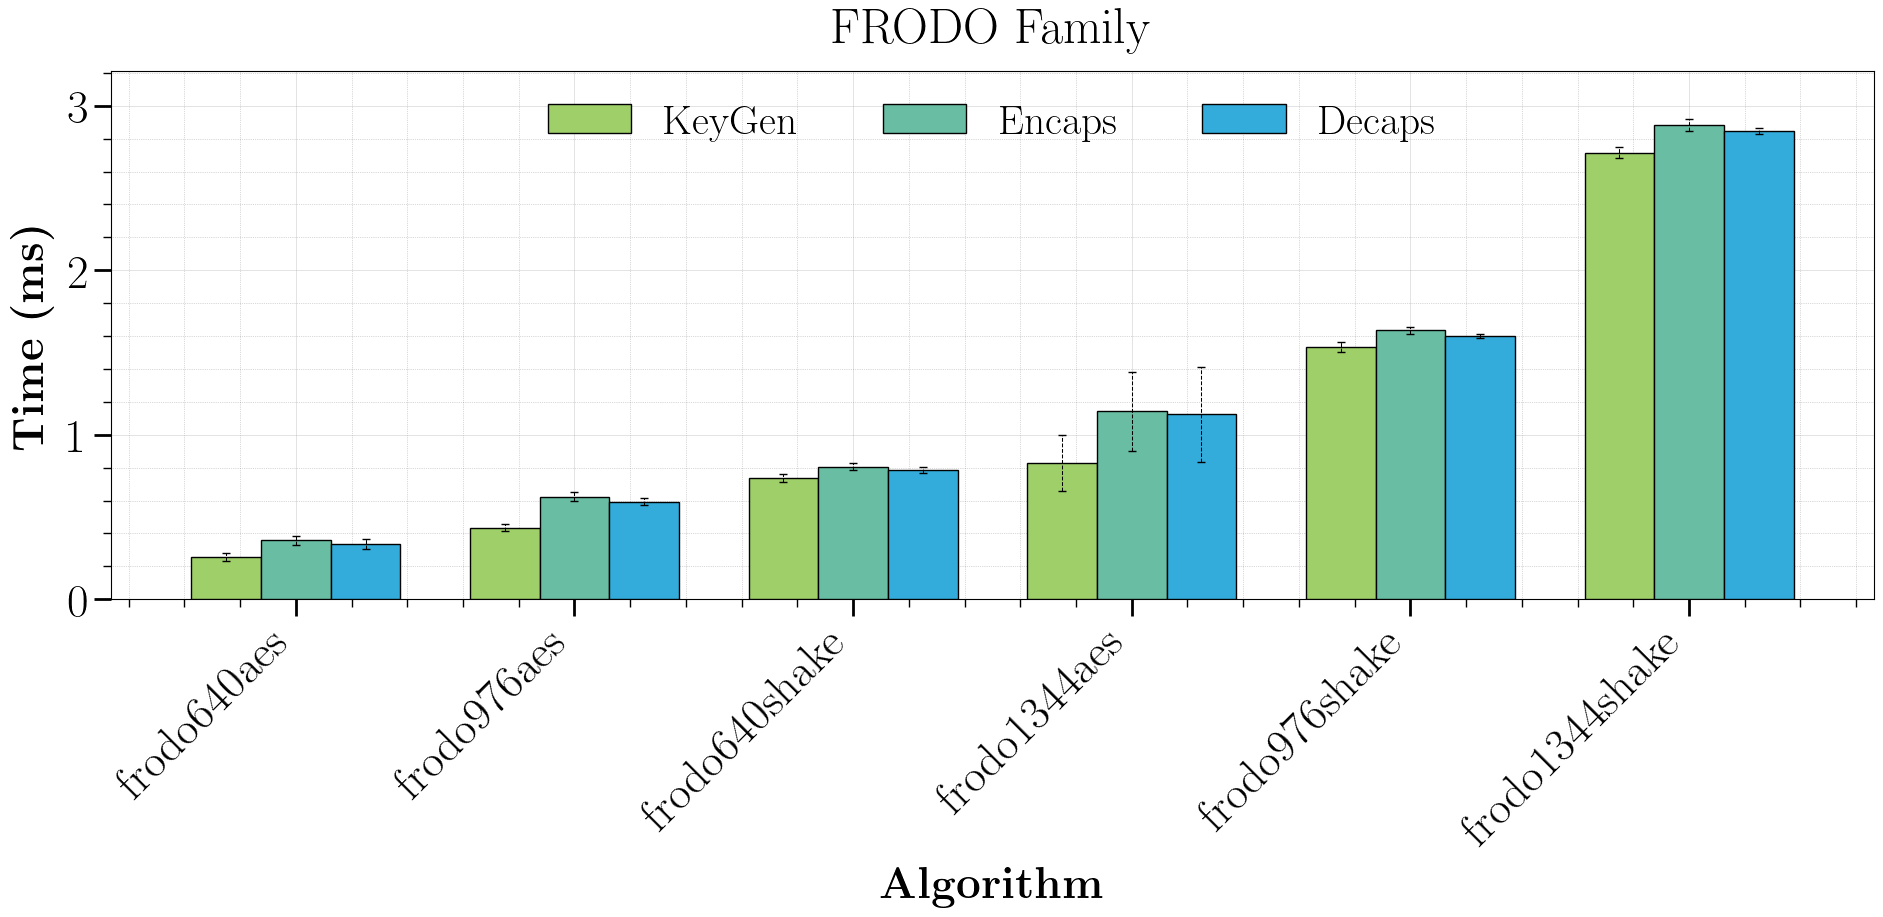

In [26]:
plot_kem_family(input_df=df_kems_stats, family='frodo', error_suffix="_std", plot_title="frodo_times.pdf", log_scale=False)

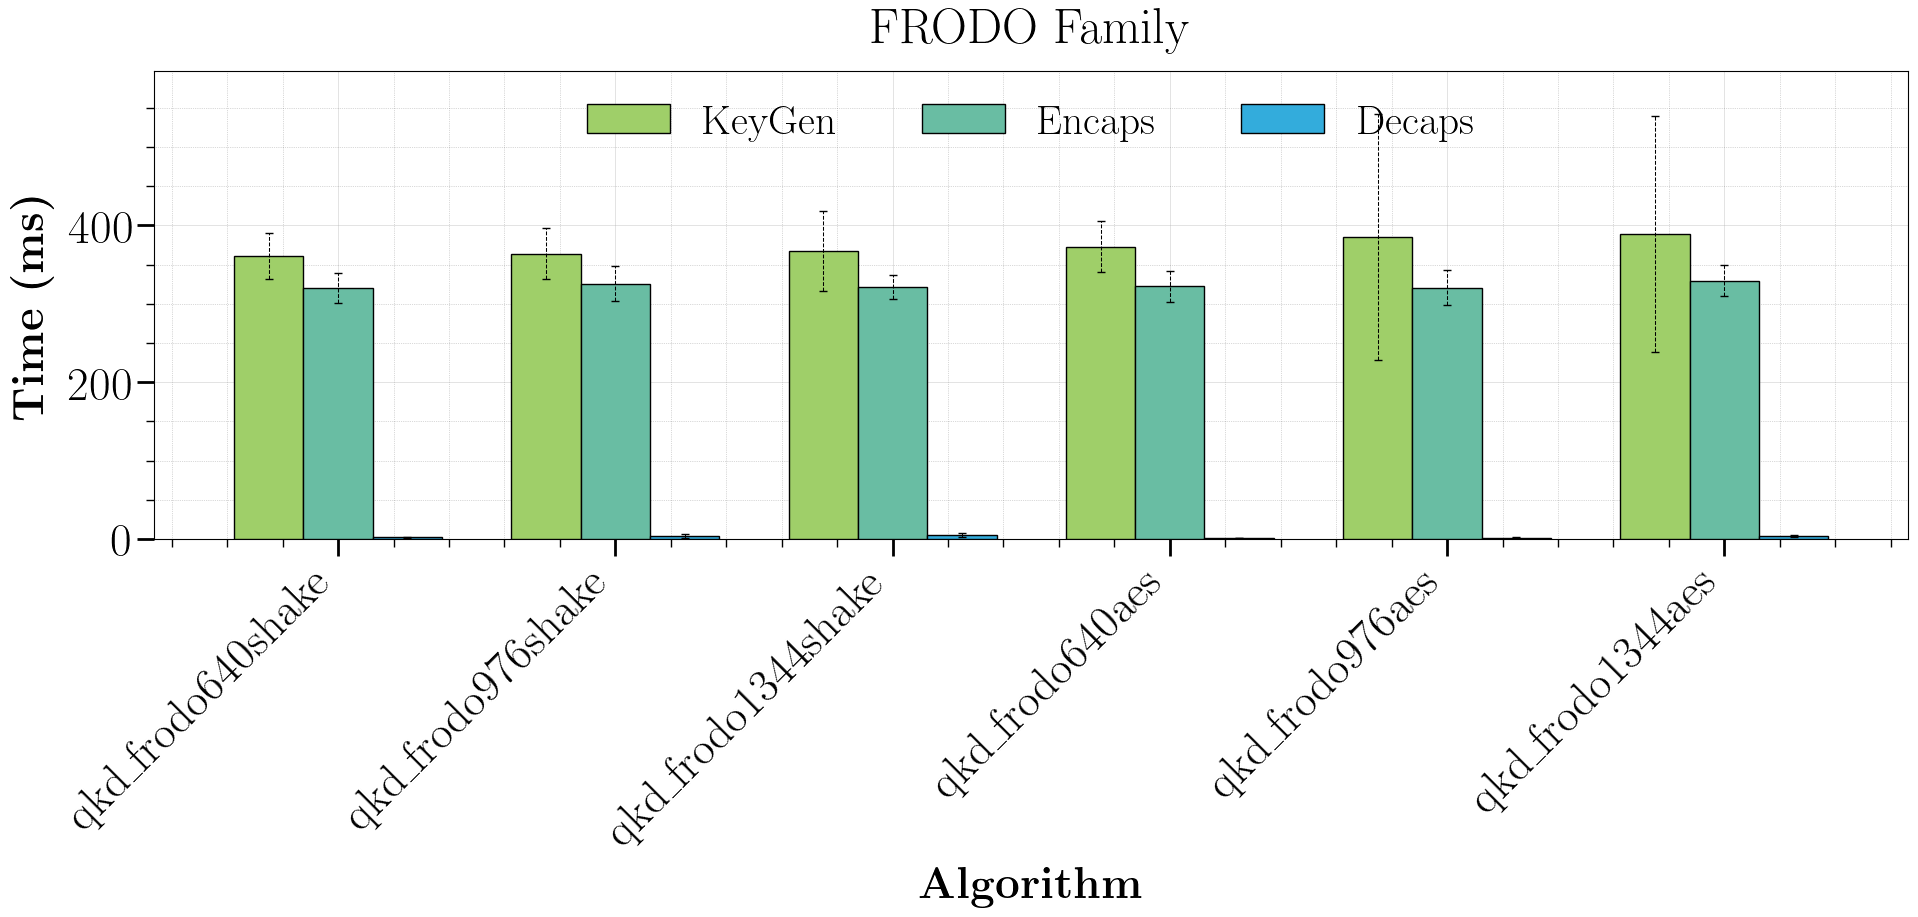

In [27]:
plot_kem_family(input_df=df_qkdkems_stats, family='frodo', error_suffix="_std", plot_title="qkdfrodo_times.pdf", log_scale=False)

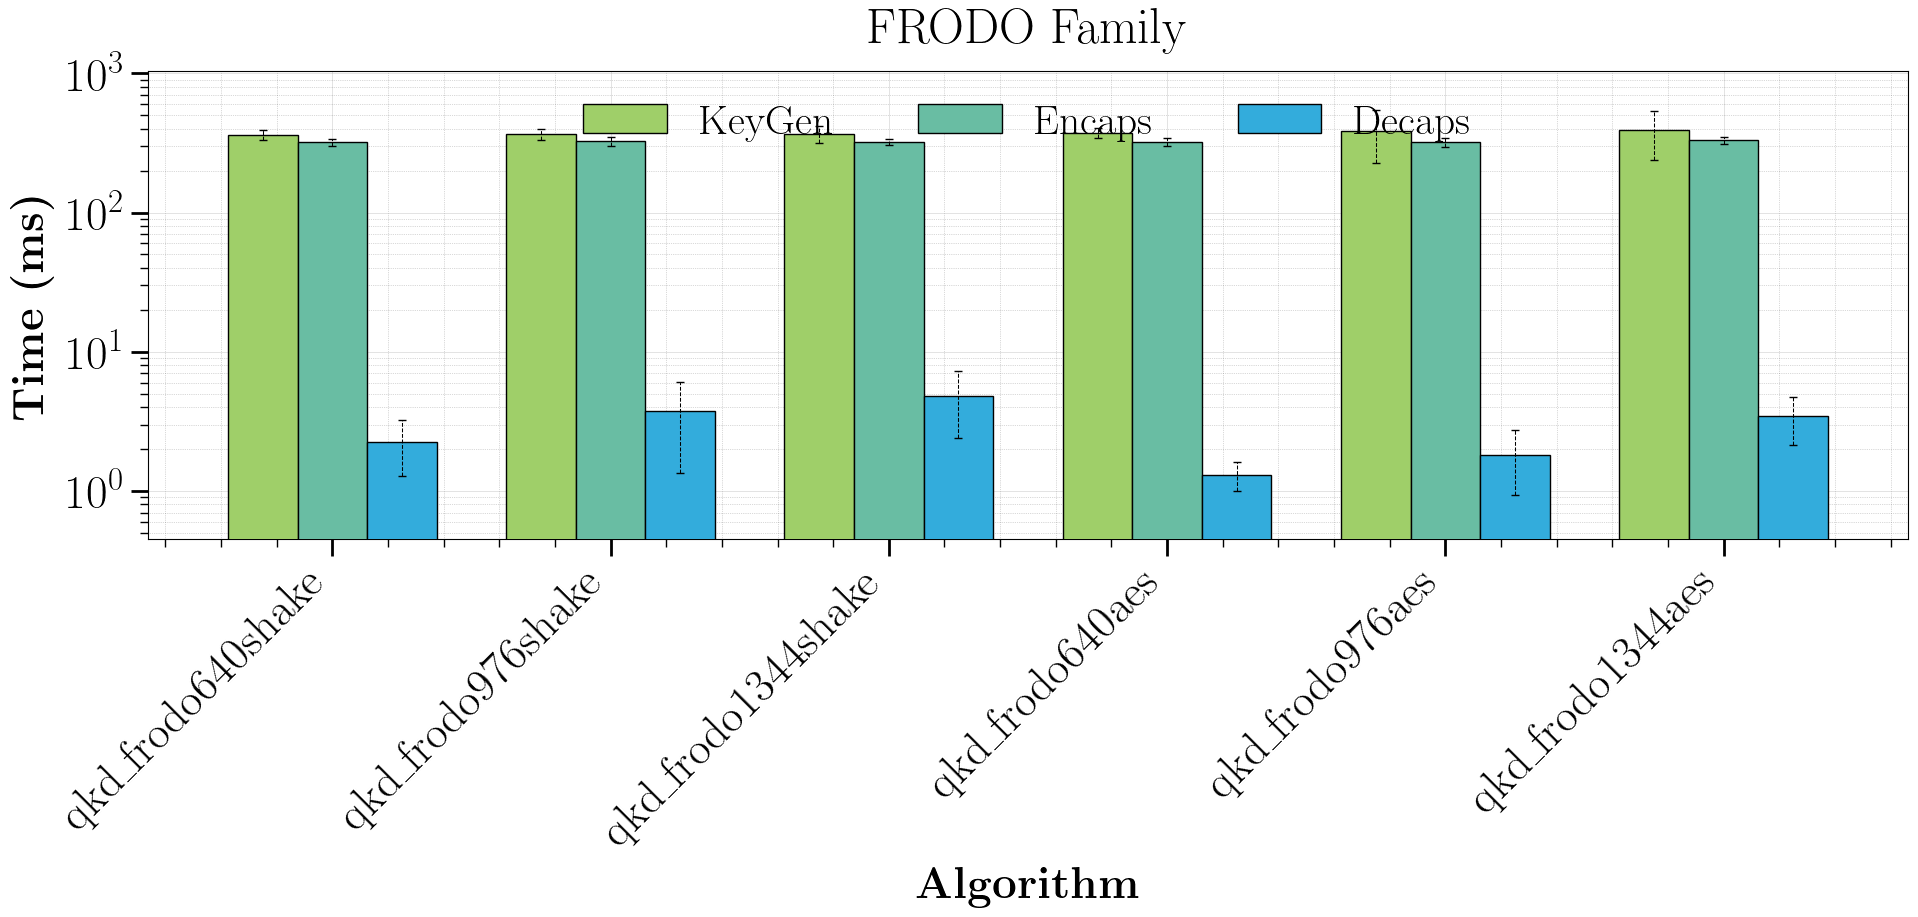

In [28]:
plot_kem_family(input_df=df_qkdkems_stats, family='frodo', error_suffix="_std", plot_title="qkdfrodo_times_log.pdf", log_scale=True)

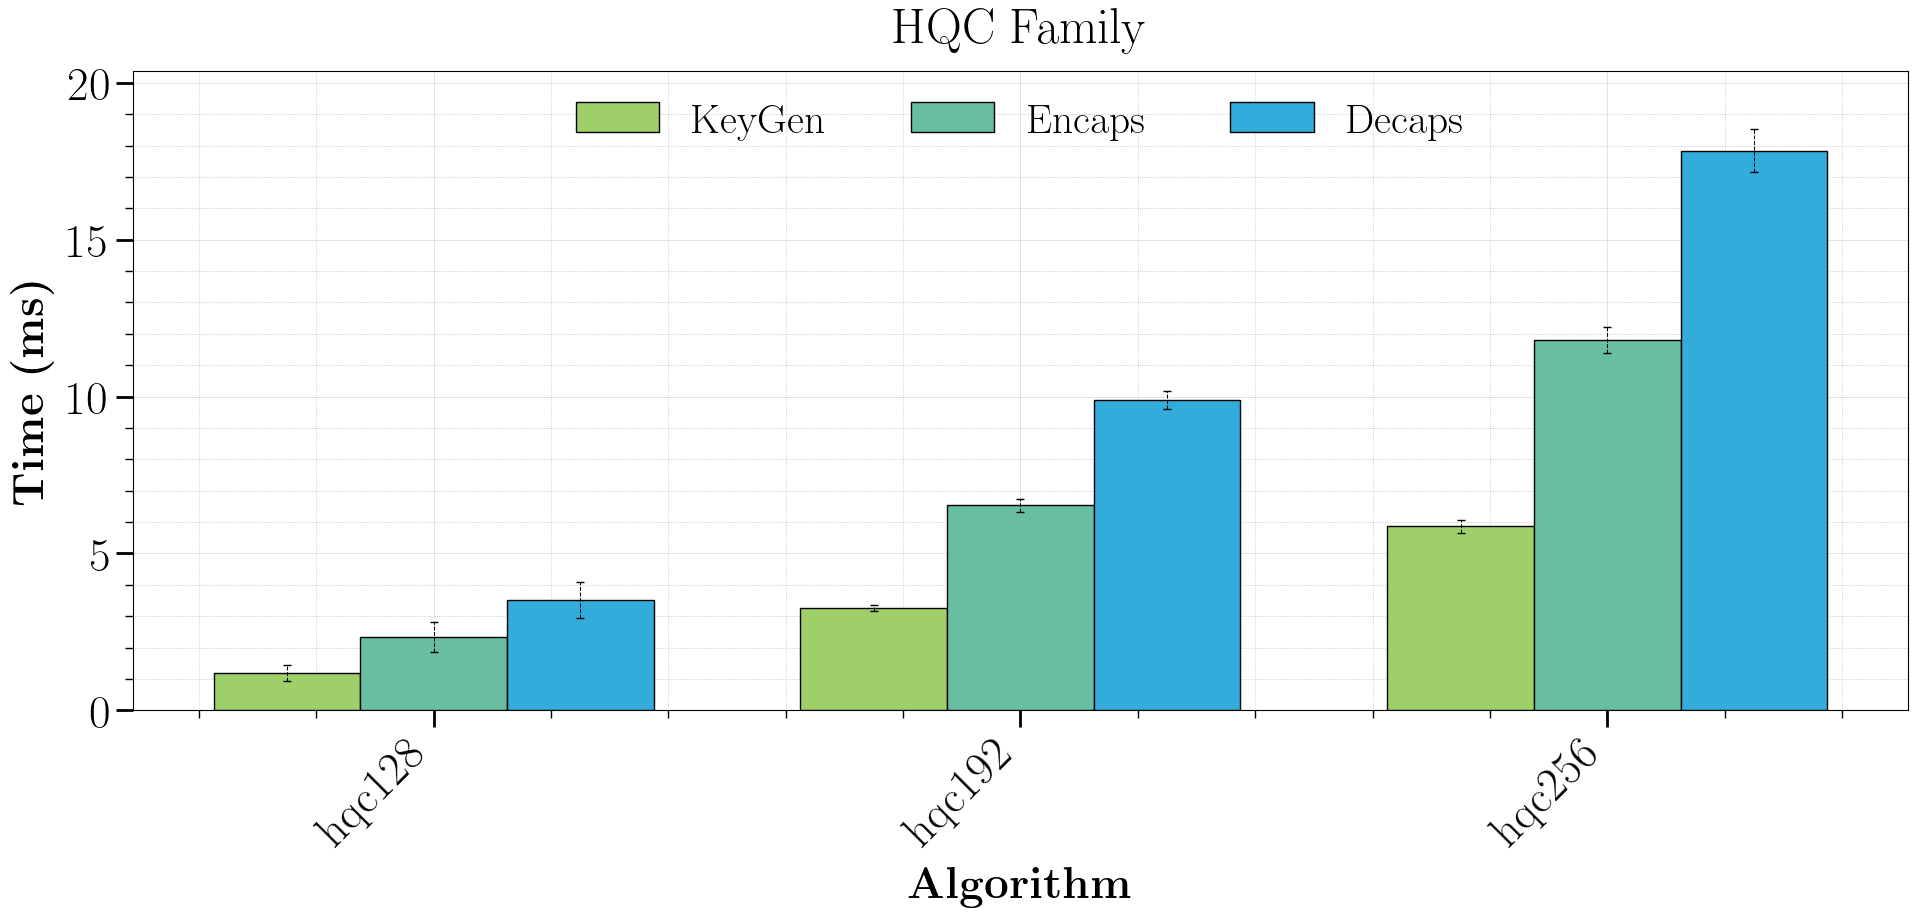

In [29]:
plot_kem_family(input_df=df_kems_stats, family='hqc', error_suffix="_std", plot_title="hqc_times.pdf", log_scale=False)

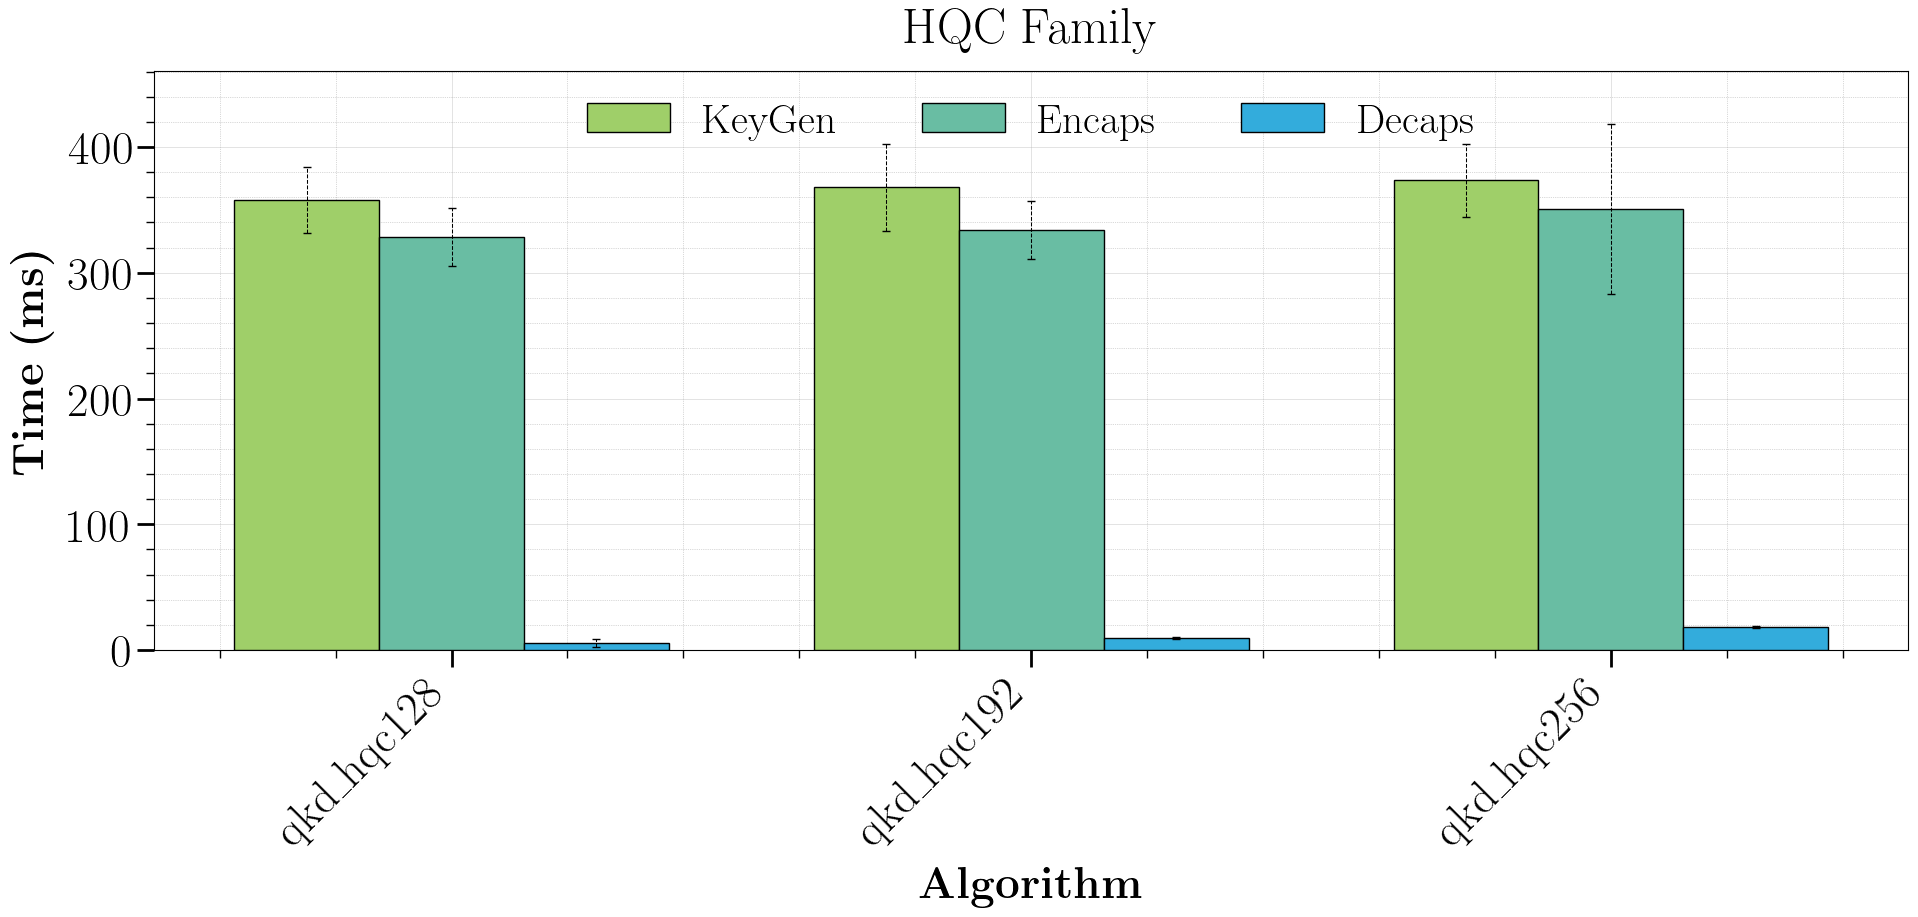

In [30]:
plot_kem_family(input_df=df_qkdkems_stats, family='hqc', error_suffix="_std", plot_title="qkdhqc_times.pdf", log_scale=False)

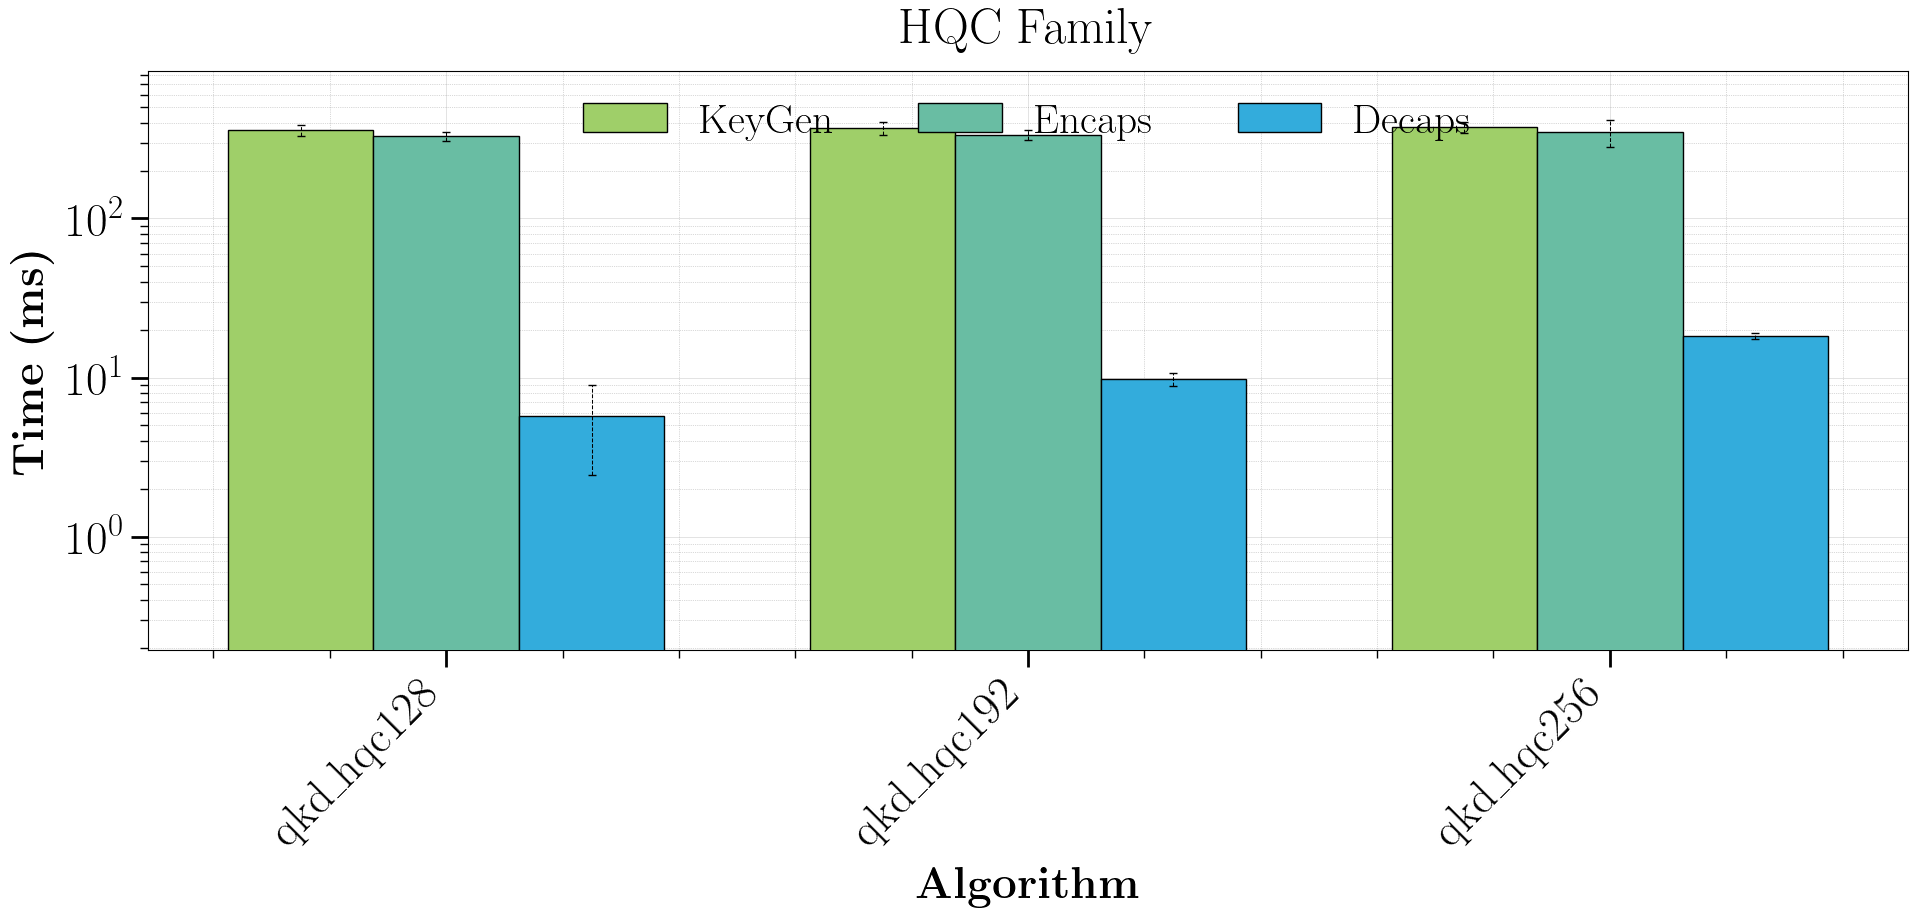

In [31]:
plot_kem_family(input_df=df_qkdkems_stats, family='hqc', error_suffix="_std", plot_title="qkdhqc_times_log.pdf", log_scale=True)

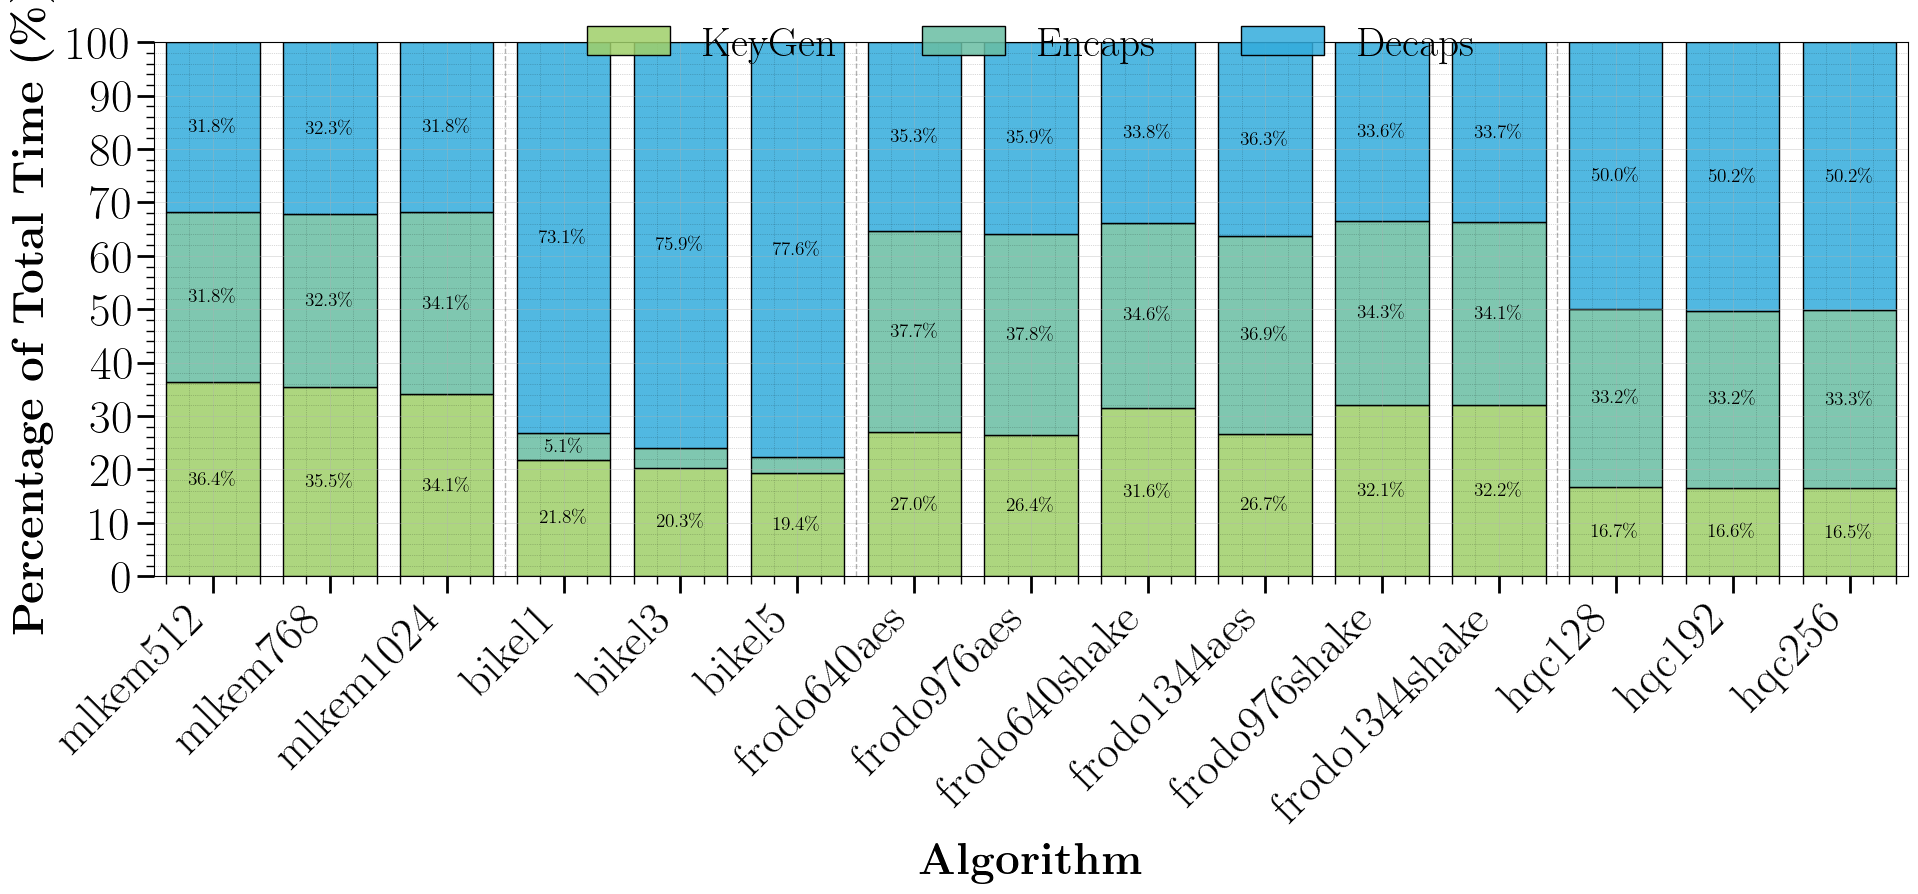

In [32]:
plot_ops_percent(input_df=df_kems_stats, family=None, plot_title="kems_ops_overhead.pdf")

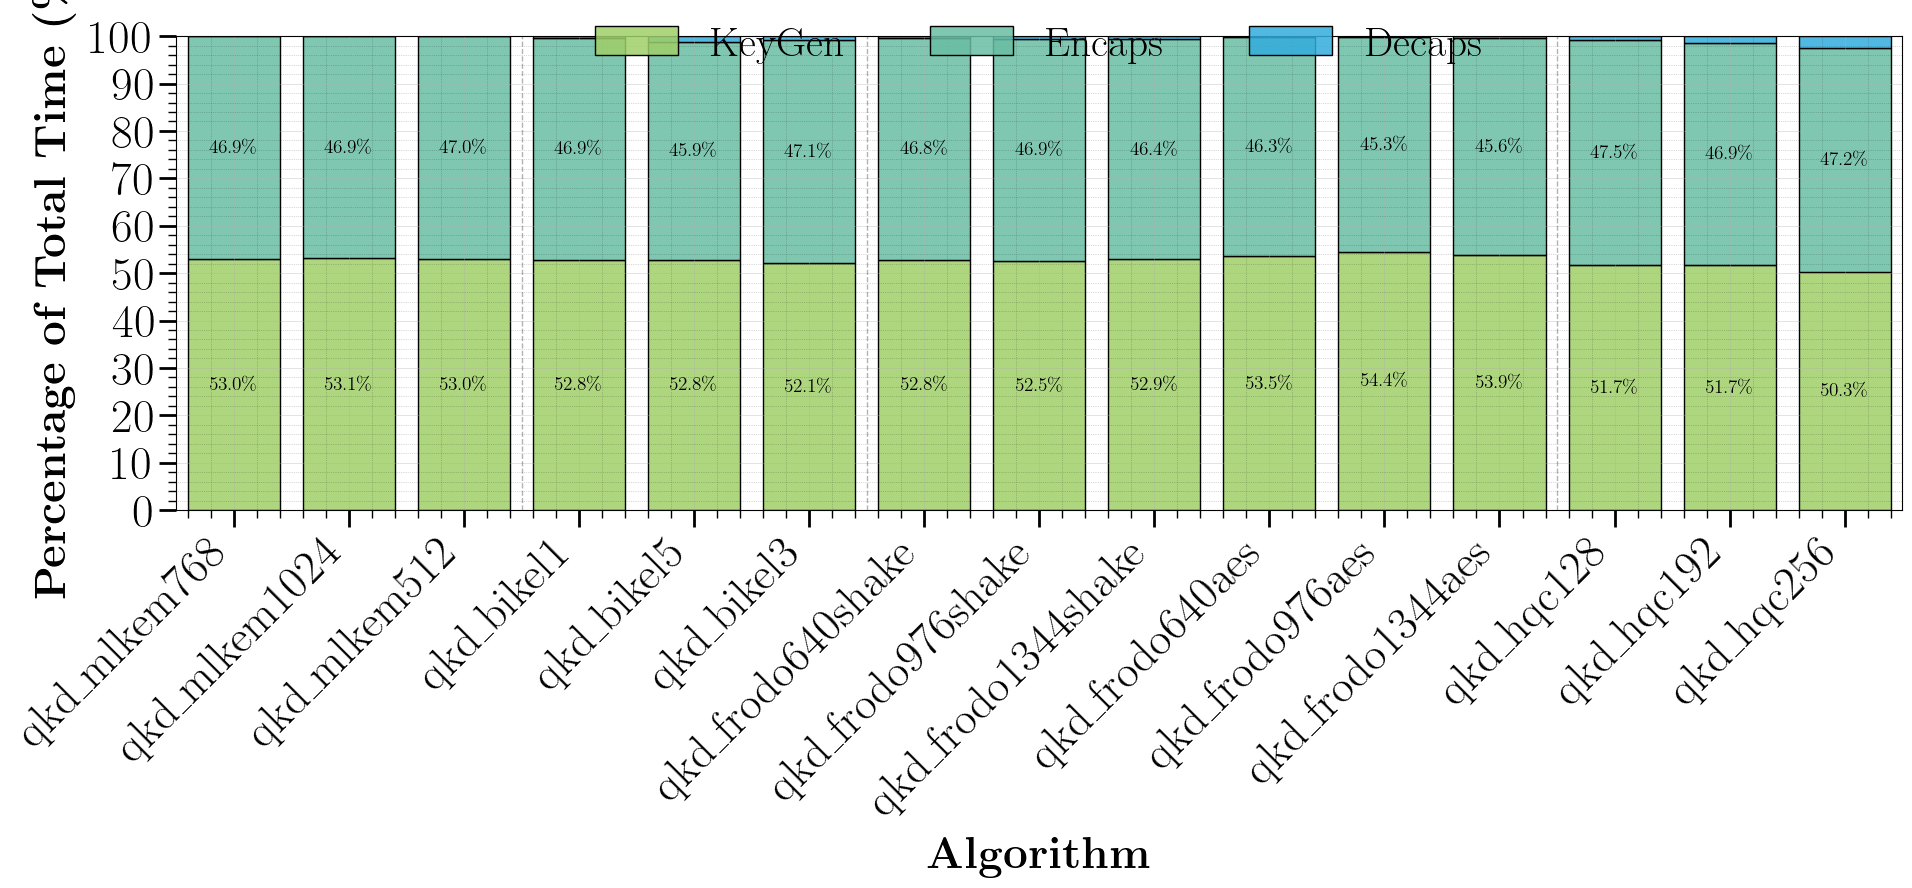

In [33]:
plot_ops_percent(input_df=df_qkdkems_stats, family=None, plot_title="qkdkems_ops_overhead.pdf")

In [34]:
# Combine the DataFrames for comparison 

from config import (KEM_FAMILIES)

algo_names = [alg for family in KEM_FAMILIES.values() for alg in family]

# Create copies to avoid modifying originals
df_std = df_kems_stats.copy()
df_qkd = df_qkdkems_stats.copy()

# Filtering 
df_std_ = df_std[df_std.index.isin(algo_names)]
df_qkd_ = df_qkd[df_qkd.index.str.replace('qkd_', '').isin(algo_names)]
    
# Rename indices to match if needed
df_qkd_.index = [idx.replace('qkd_', '') for idx in df_qkd_.index]
    
# Concatenate and sort
comparison_stats = pd.concat([df_std_, df_qkd_], 
                            keys=['OQS', 'QKD'],
                            names=['Variant', 'Algorithm'])

comparison_stats.to_csv("data/comparison_stats.csv")

comparison_stats

NumIterations  KeyGen(ms)_mean  KeyGen(ms)_std  \
Variant Algorithm                                                        
OQS     bikel1                     48            0.145           0.010   
        bikel3                     48            0.401           0.014   
        bikel5                     48            0.974           0.039   
        frodo1344aes               48            0.827           0.171   
        frodo1344shake             48            2.715           0.033   
        frodo640aes                48            0.256           0.025   
        frodo640shake              48            0.737           0.023   
        frodo976aes                48            0.435           0.020   
        frodo976shake              48            1.532           0.029   
        hqc128                     48            1.173           0.255   
        hqc192                     48            3.263           0.104   
        hqc256                     48            5.859           0.216   
        mlkem1024                  48            0.015           0.001   
        mlkem512                   48            0.008           0.001   
        mlkem768                   48            0.011           0.000   
QKD     bikel1                     48          357.479          26.129   
        bikel3                     48          371.532          51.103   
        bikel5                     48          366.340          69.640   
        frodo1344aes               48          388.994         150.486   
        frodo1344shake             48          366.953          51.231   
        frodo640aes                48          372.900          32.561   
        frodo640shake              48          361.023          29.176   
        frodo976aes                48          384.904         157.086   
        frodo976shake              48          363.976          32.257   
        hqc128                     48          357.699          26.379   
        hqc192                     48          367.855          34.928   
        hqc256                     48          373.410          28.704   
        mlkem1024                  48          360.981          29.649   
        mlkem512                   48          366.365          30.207   
        mlkem768                   48          359.584          36.153   

                        KeyGen(ms)_min  KeyGen(ms)_max  Encaps(ms)_mean  \
Variant Algorithm                                                         
OQS     bikel1                   0.136           0.169            0.034   
        bikel3                   0.388           0.445            0.075   
        bikel5                   0.906           1.076            0.152   
        frodo1344aes             0.723           1.680            1.143   
        frodo1344shake           2.542           2.801            2.883   
        frodo640aes              0.238           0.374            0.358   
        frodo640shake            0.720           0.816            0.807   
        frodo976aes              0.401           0.496            0.623   
        frodo976shake            1.513           1.654            1.635   
        hqc128                   0.965           2.175            2.328   
        hqc192                   3.141           3.453            6.529   
        hqc256                   5.376           6.211           11.813   
        mlkem1024                0.015           0.017            0.015   
        mlkem512                 0.007           0.010            0.007   
        mlkem768                 0.011           0.012            0.010   
QKD     bikel1                 304.308         431.467          317.293   
        bikel3                 313.874         659.574          336.480   
        bikel5                 306.483         795.548          318.364   
        frodo1344aes           310.397        1391.079          329.515   
        frodo1344shake         312.427         613.495          321.694   
     

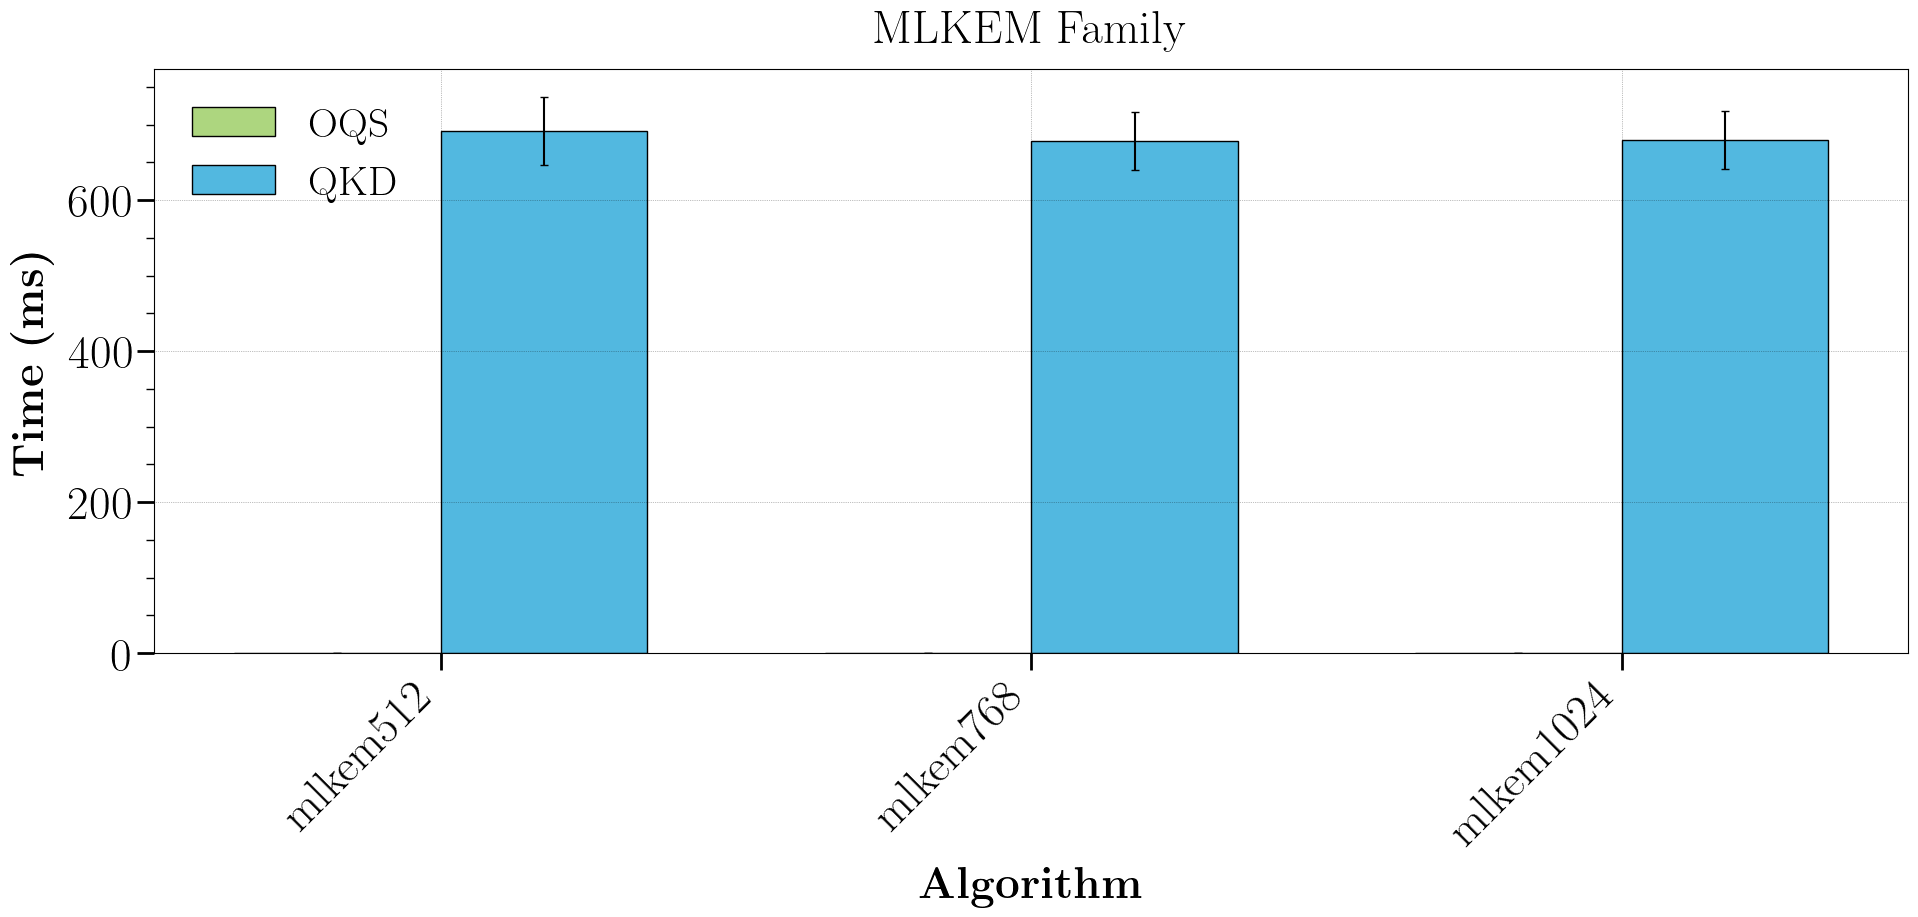

In [35]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', plot_title="mlkem_comparison.pdf")

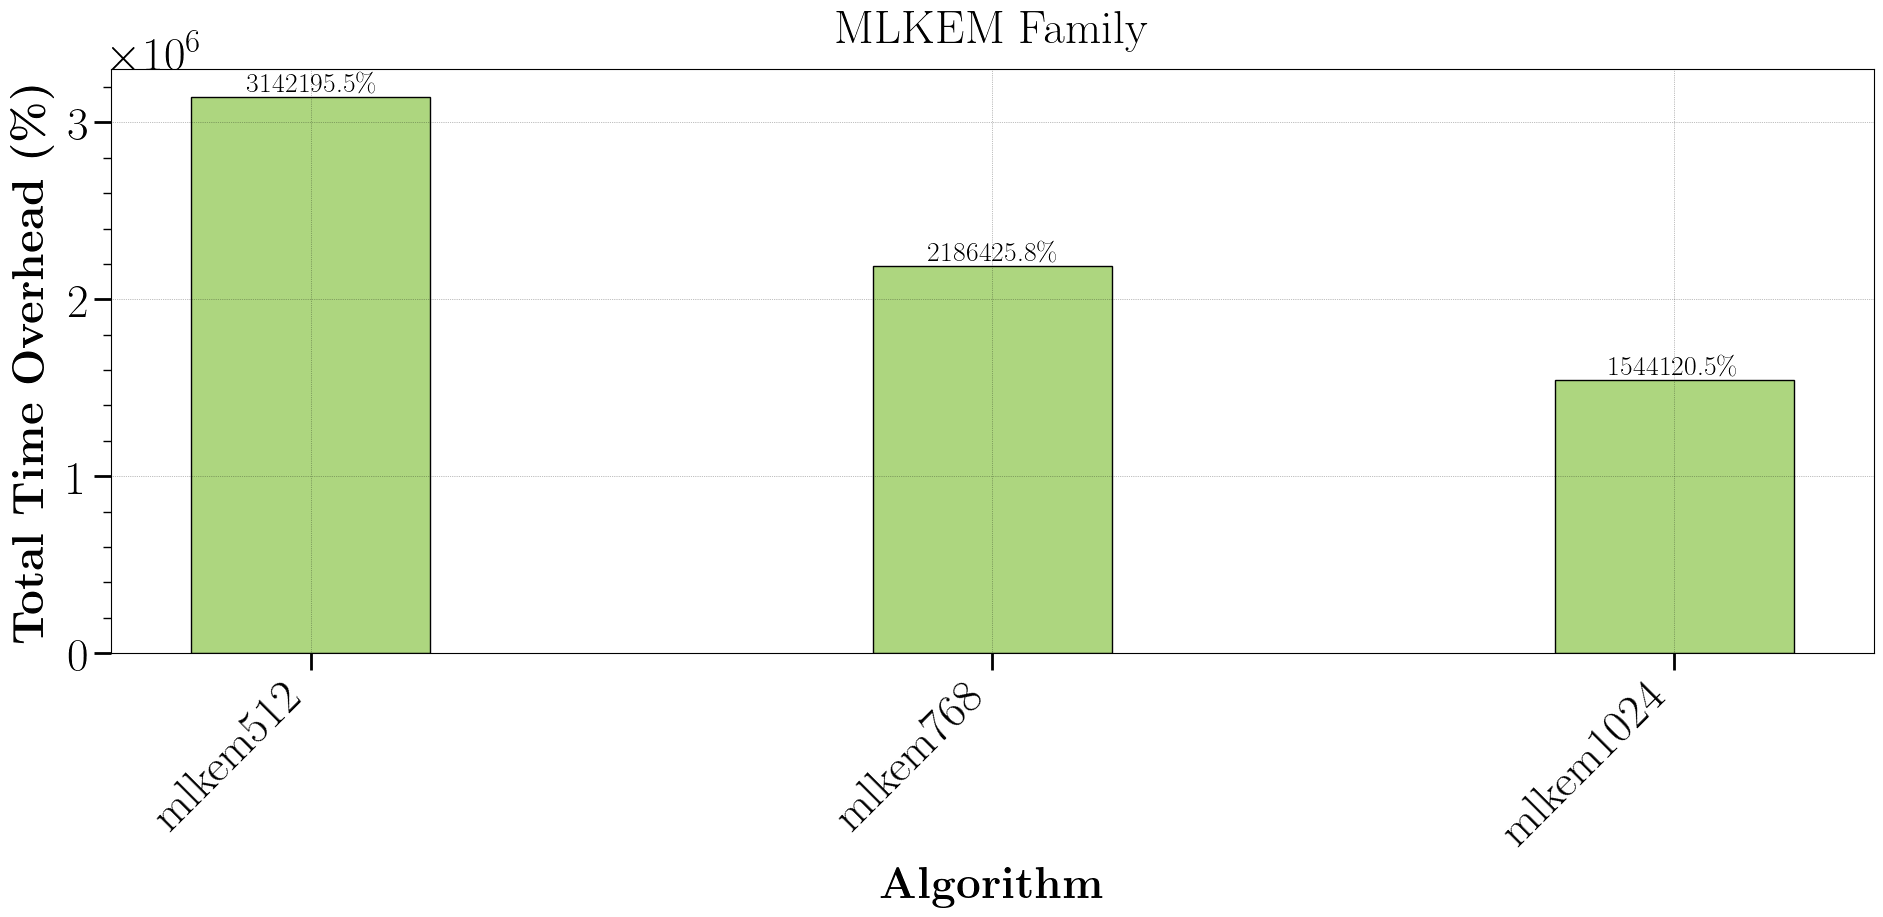

In [36]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='TotalTime(ms)', overhead=True, plot_title="kyber_comparison_overhead.pdf")

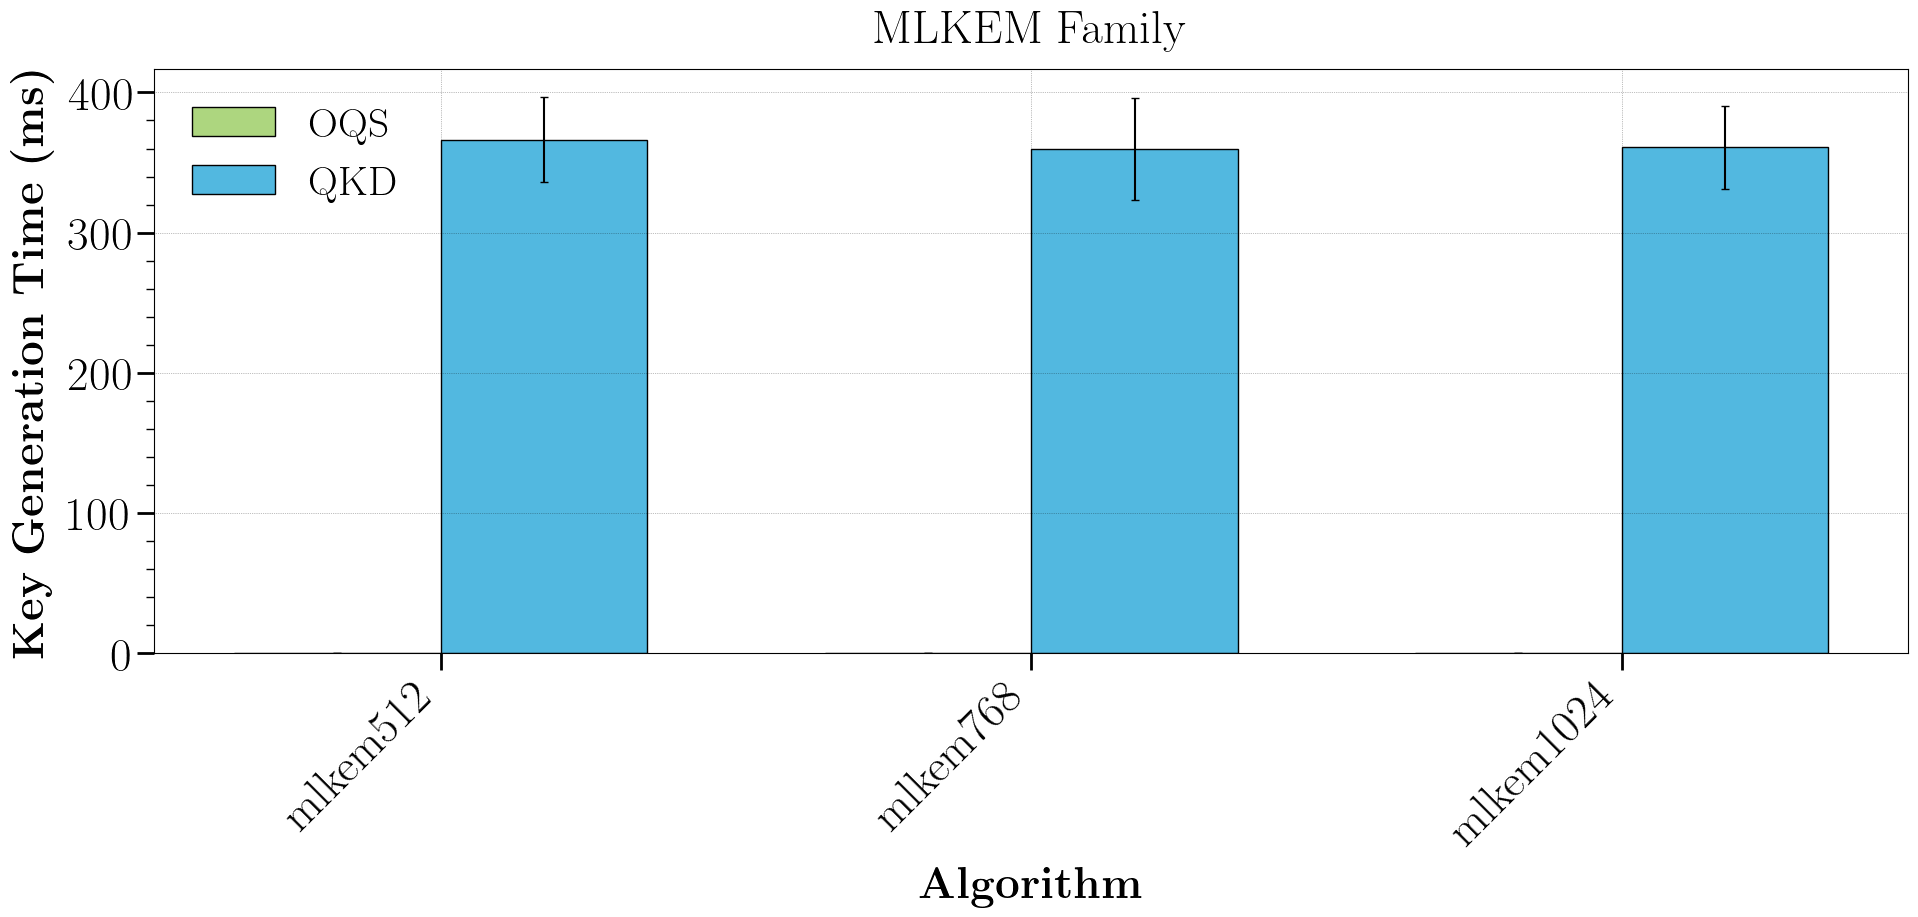

In [37]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', plot_title="mlkem_comparison_keygen.pdf")

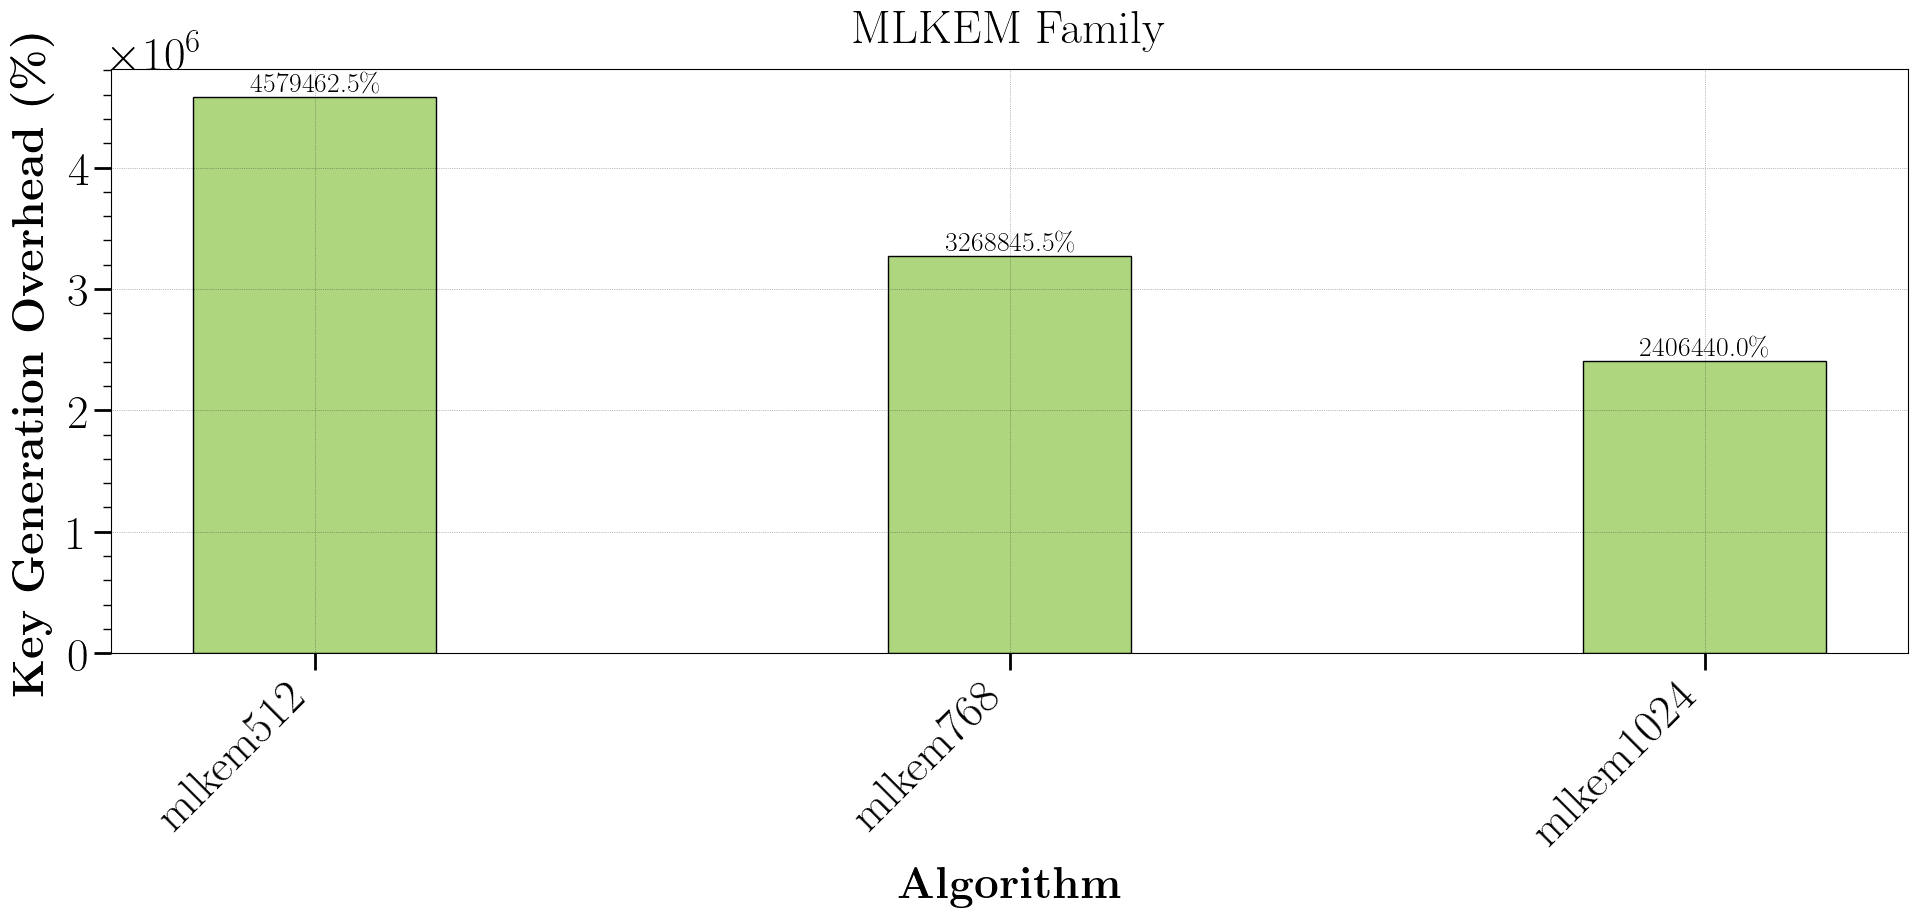

In [38]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='KeyGen(ms)', overhead=True, plot_title="mlkem_comparison_keygen_overhead.pdf")

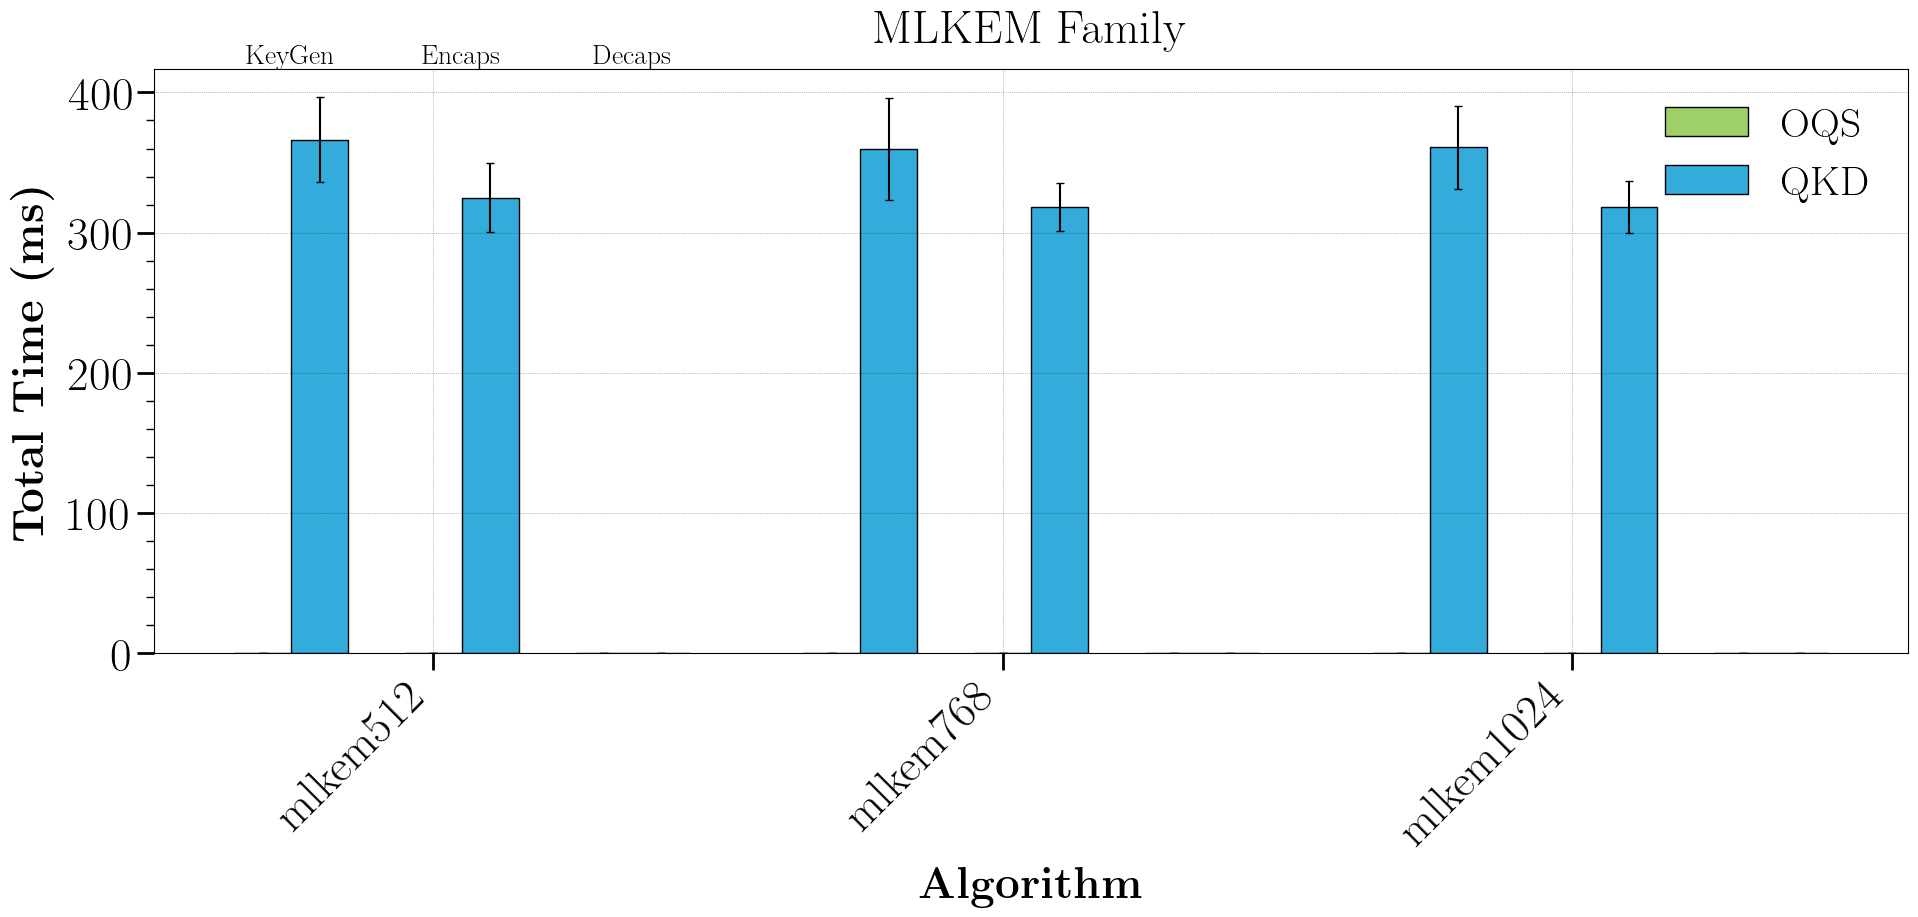

In [39]:
plot_kem_comparison(comparison_stats=comparison_stats, family="mlkem", operation='all', plot_title="mlkem_comparison_ops.pdf")

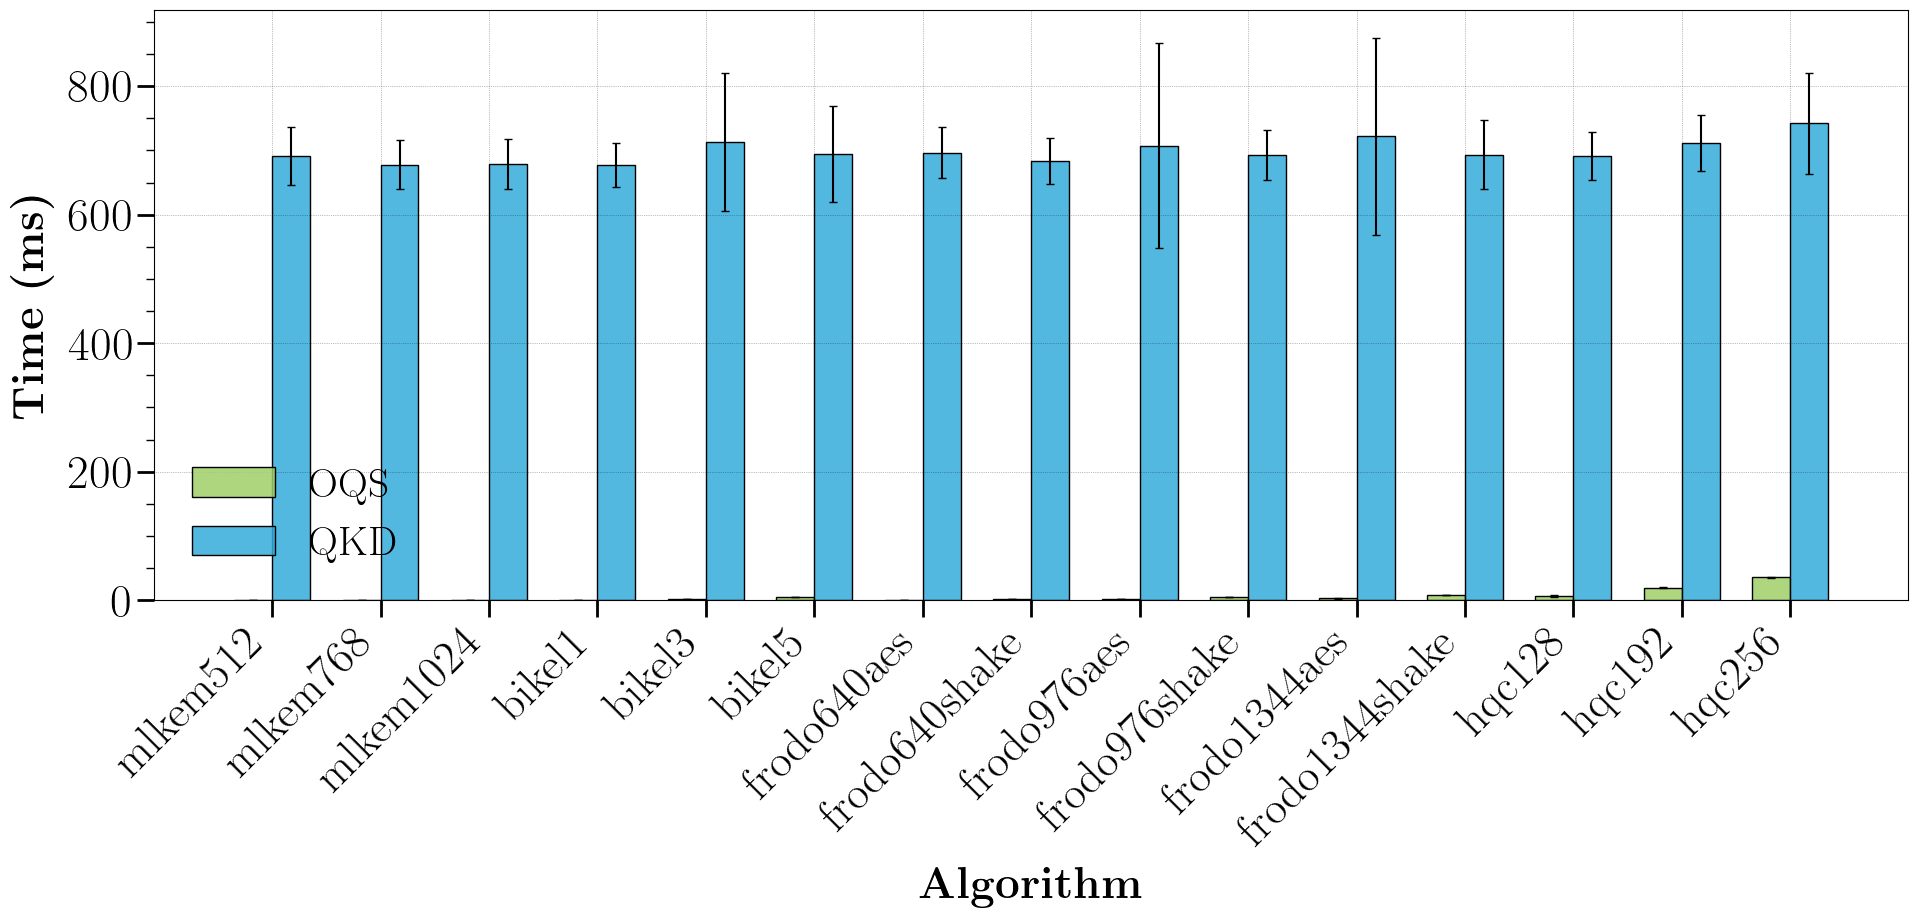

In [40]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='TotalTime(ms)',plot_title="kems_comparison.pdf")

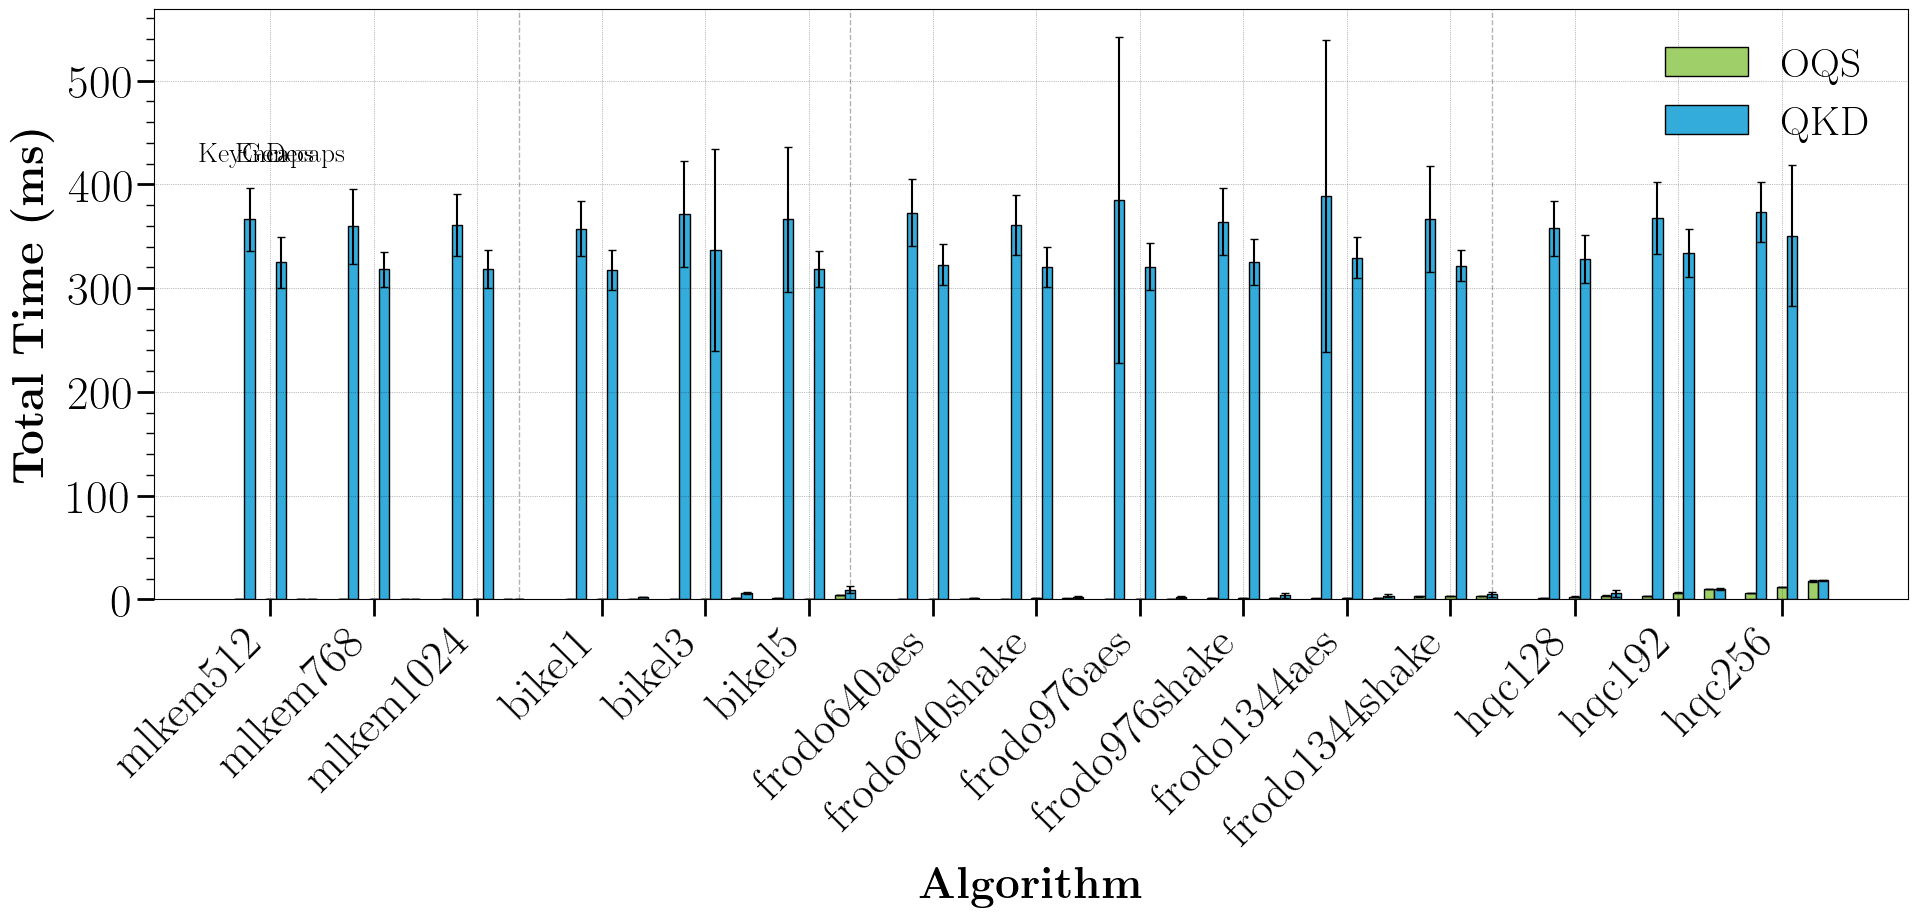

In [41]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=False, operation='all',plot_title="kems_comparison_all.pdf")

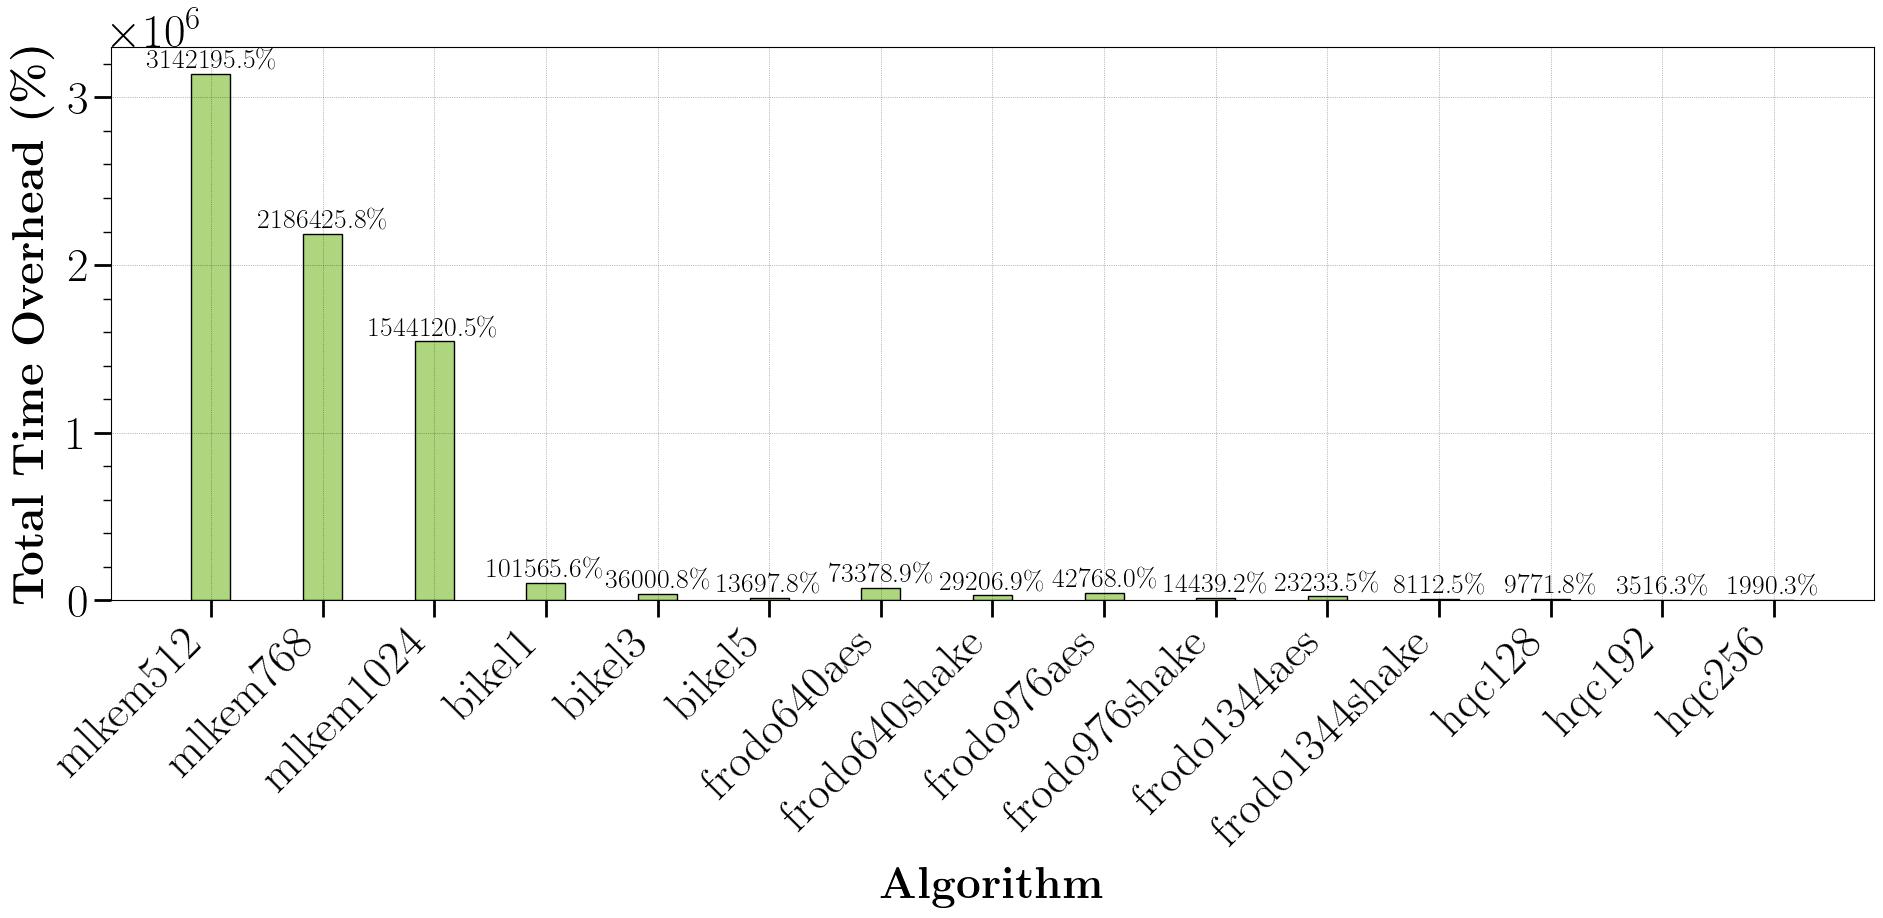

In [42]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='TotalTime(ms)',plot_title="kems_comparison_overhead.pdf")

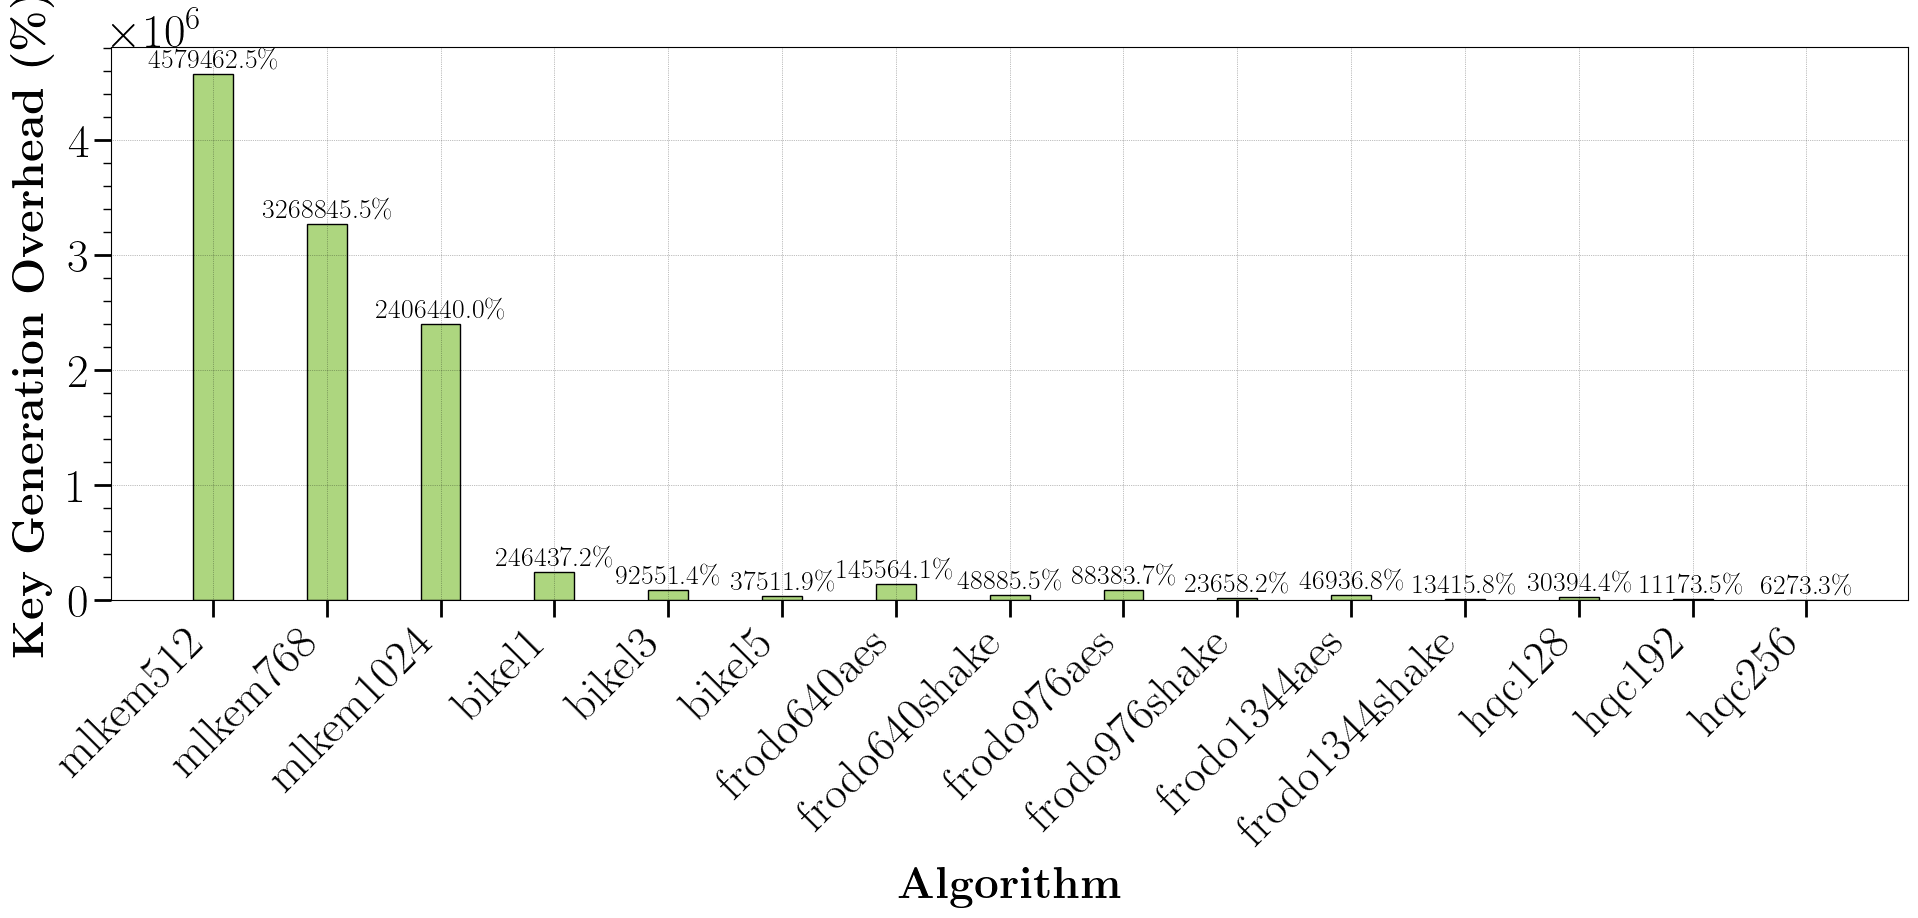

In [43]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='KeyGen(ms)', plot_title="kems_comparison_kg_overhead.pdf")

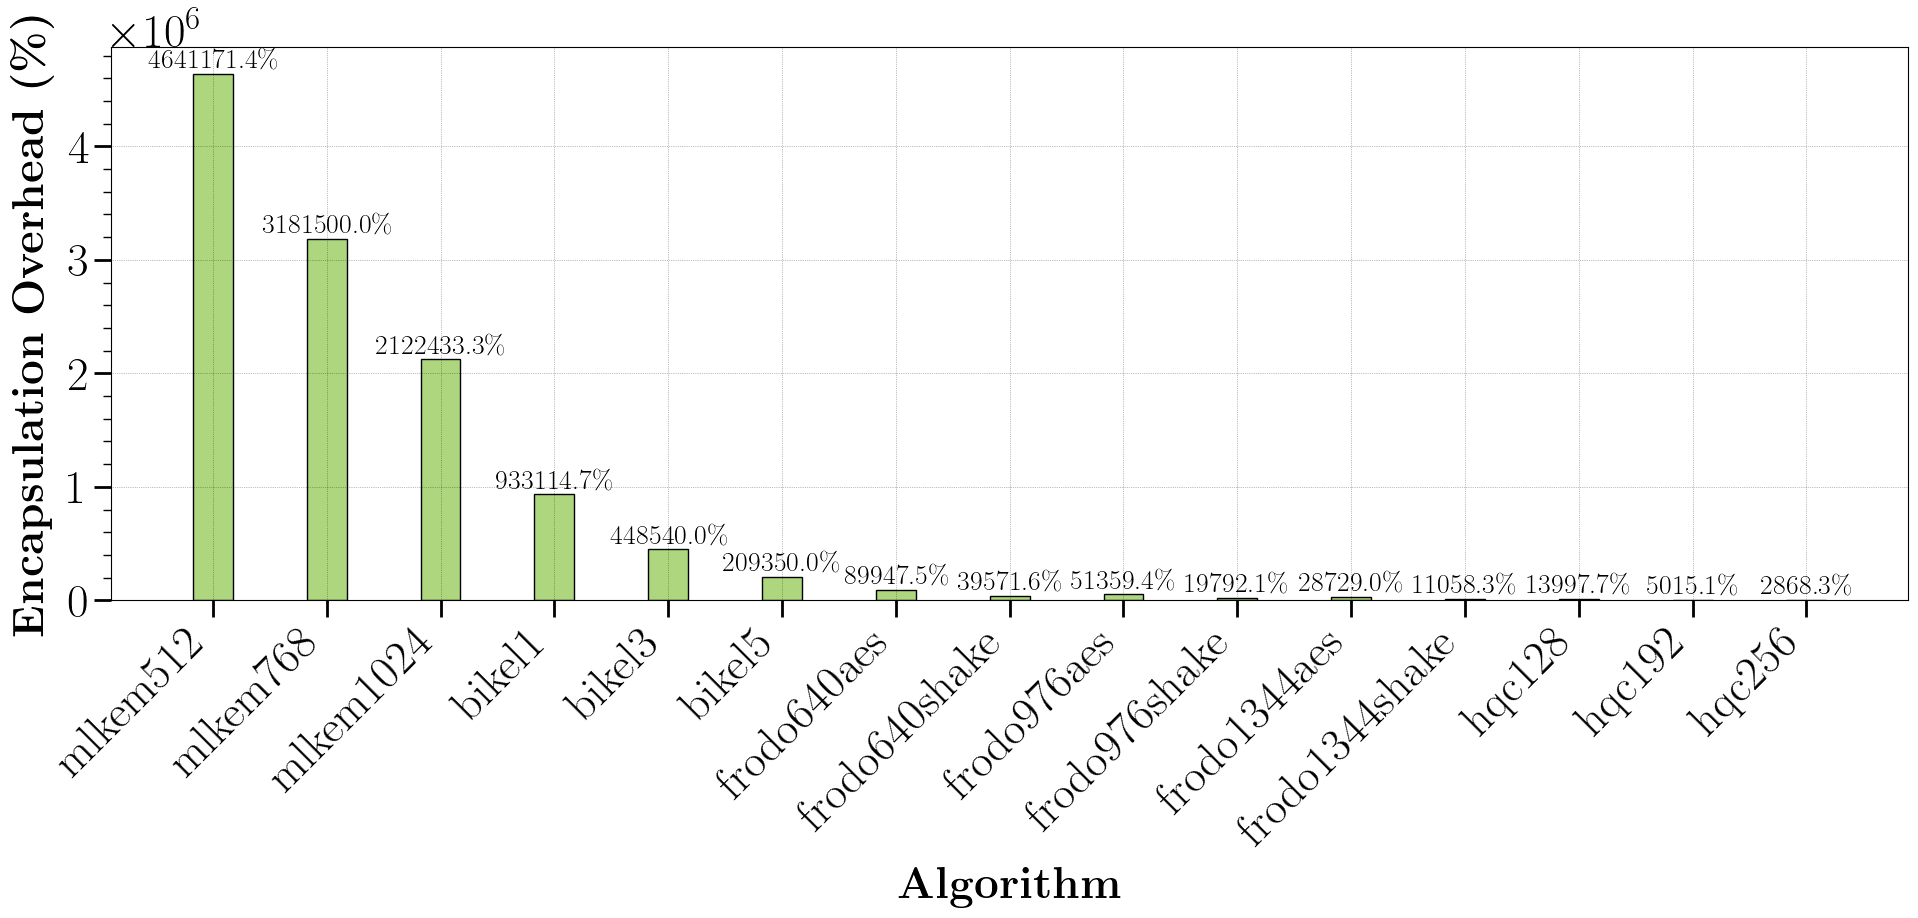

In [44]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Encaps(ms)', plot_title="kems_comparison_encap_overhead.pdf")

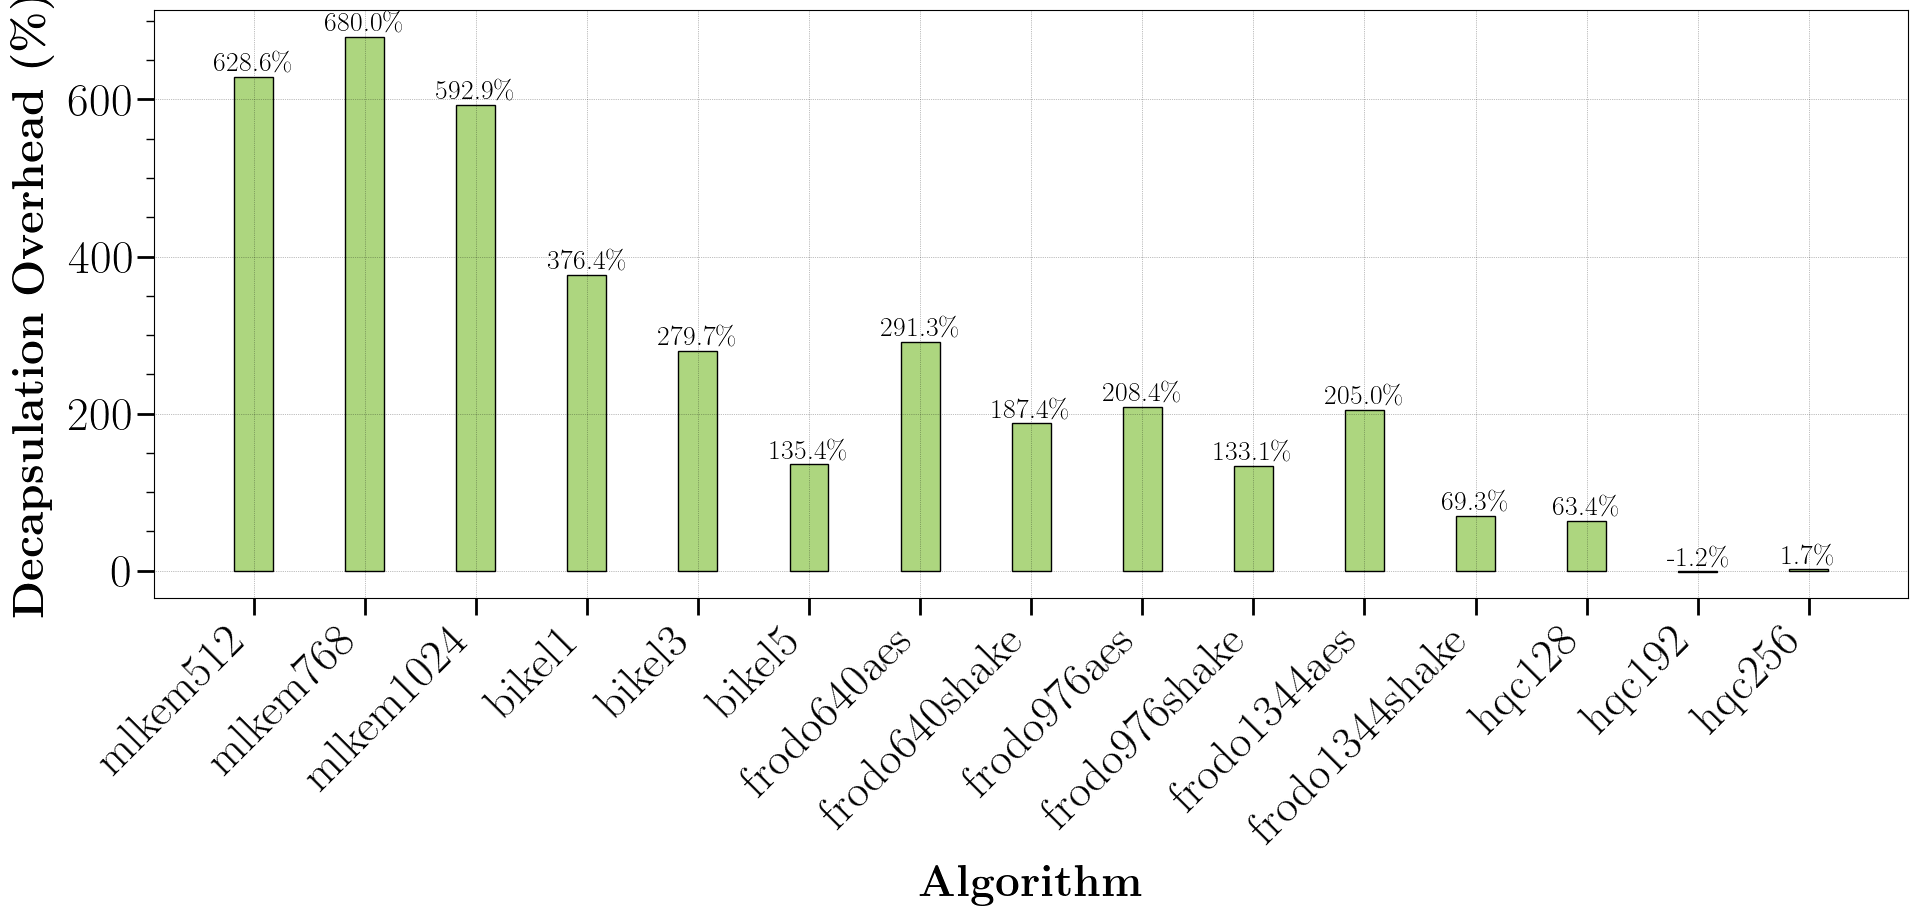

In [45]:
plot_kem_comparison(comparison_stats=comparison_stats, family=None, overhead=True, operation='Decaps(ms)', plot_title="kems_comparison_decap_overhead.pdf")

# BENCHMARKS - TLS

In [46]:
df_tls_kems = tls_data_summary("data/tls_bench_oqs_200_iter_20250128.csv")

df_tls_kems

Time_count  Time_mean  Time_std  Time_min  Time_max
KEM       Cert                                                           
mlkem1024 falcon1024         200     12.455     4.189      7.15     25.34
          falcon512          200     12.348     4.003      7.46     24.31
          mldsa44            200     11.478     3.495      6.82     23.39
          mldsa65            200     11.664     3.726      6.82     24.76
          mldsa87            200     12.120     3.811      7.27     24.47
...                          ...        ...       ...       ...       ...
hqc256    mldsa65            200     55.155     5.807     46.70     70.33
          mldsa87            200     54.674     5.782     46.46     70.45
          rsa_2048           200     57.953     6.674     46.95     84.61
          rsa_3072           200     57.916     6.779     47.72     77.51
          rsa_4096           200     55.677     6.814     45.92     81.17

[120 rows x 5 columns]

In [47]:
df_tls_qkdkems = tls_data_summary("data/tls_bench_qkd_200_iter_20250128.csv")

df_tls_qkdkems

Time_count  Time_mean  Time_std  Time_min  Time_max
KEM           Cert                                                           
qkd_mlkem1024 falcon1024         200     12.321     3.782      7.27     23.82
              falcon512          200     12.643     3.963      7.31     26.89
              mldsa44            200     11.878     3.671      6.95     23.09
              mldsa65            200     12.323     3.896      6.95     23.52
              mldsa87            200     12.198     3.812      7.38     23.09
...                              ...        ...       ...       ...       ...
qkd_hqc256    mldsa65            200     52.715     4.832     46.63     83.70
              mldsa87            200     55.968     6.662     45.89     74.28
              rsa_2048           200     56.659     6.771     46.83     83.98
              rsa_3072           200     56.684     7.000     47.30     82.55
              rsa_4096           200     56.291     6.974     47.34     96.50

[120 rows x 5 columns]

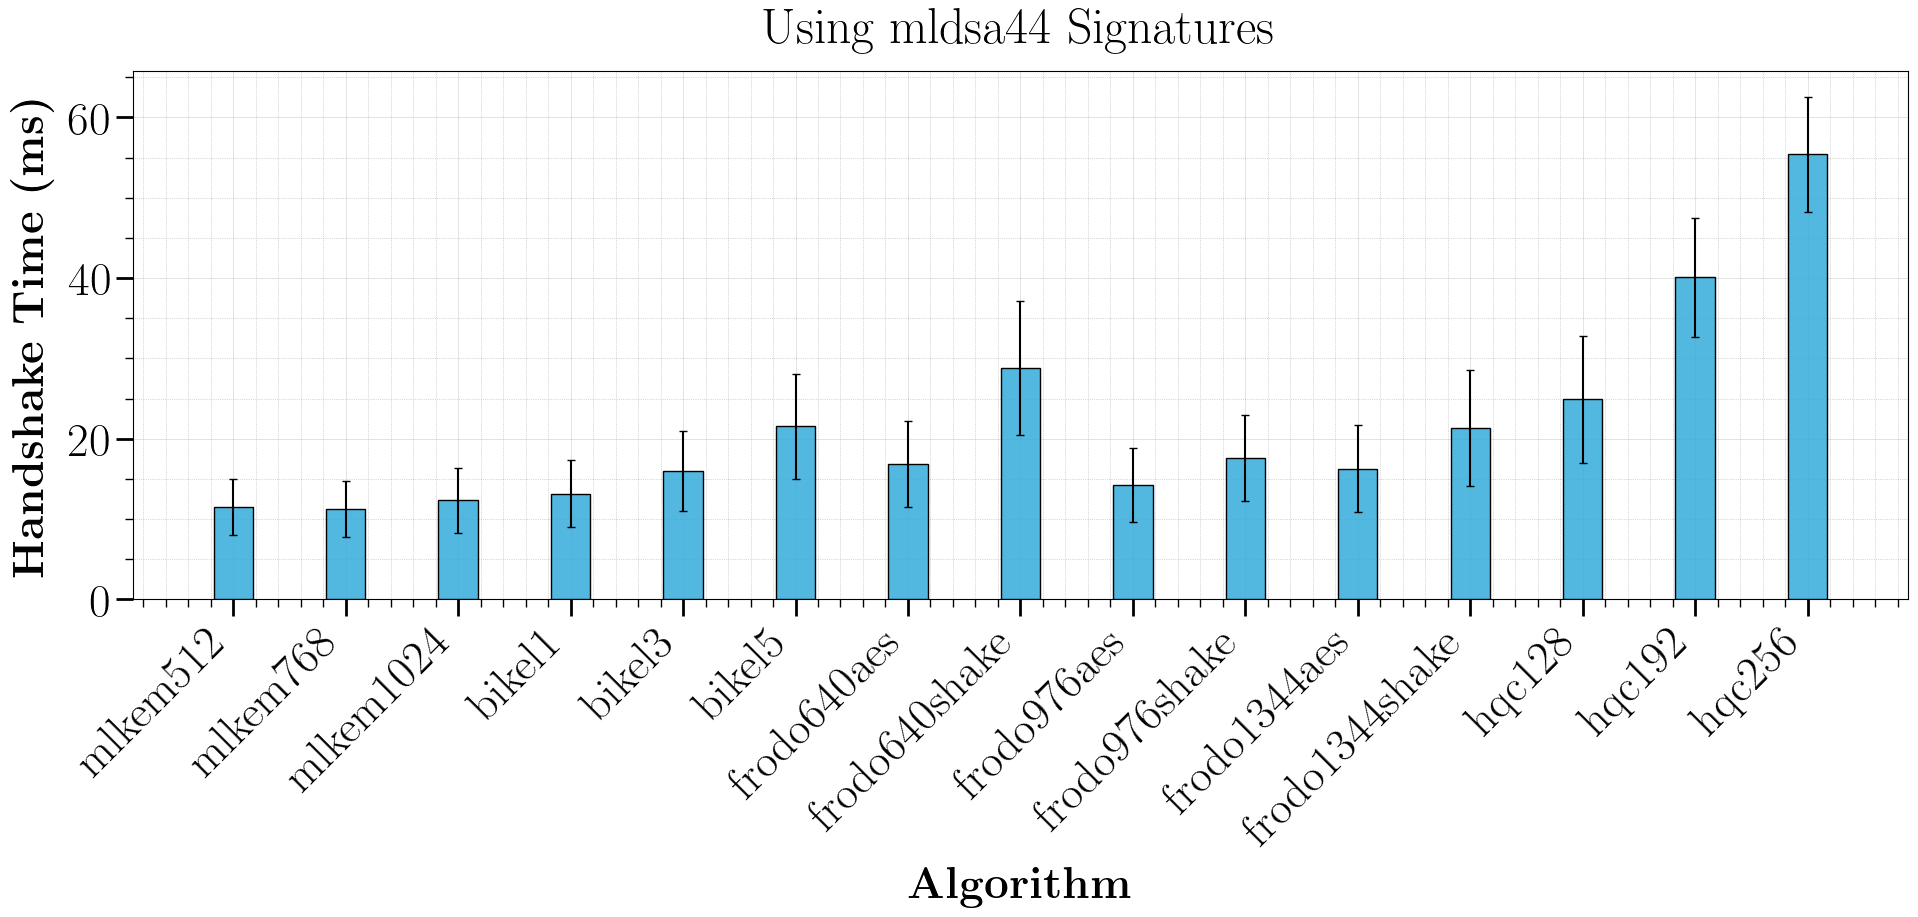

In [48]:
plot_tls_kem_families(input_df=df_tls_kems, cert_type='mldsa44', plot_title="tls_kems_mldsa44.pdf")

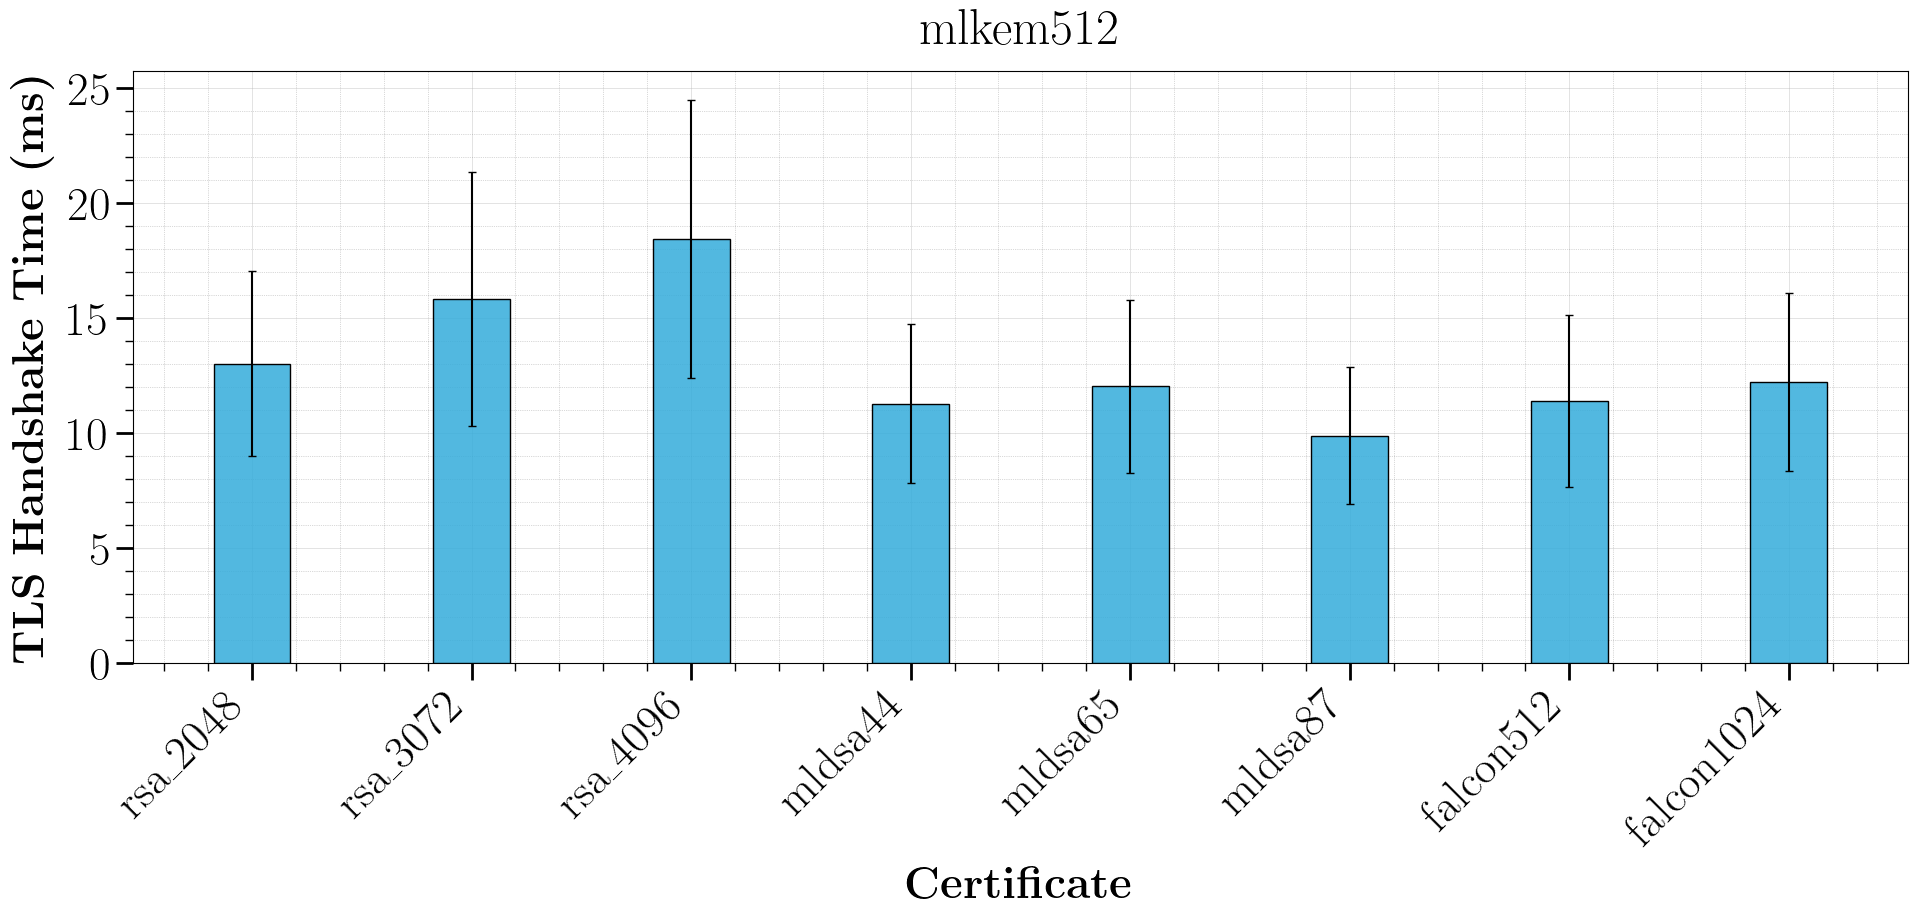

In [49]:
plot_tls_certs_families(input_df=df_tls_kems, kem_type='mlkem512', plot_title="tls_certs_mlkem512.pdf")

In [50]:
merged_df = pd.concat([df_tls_kems, df_tls_qkdkems], keys=['OQS', 'QKD'], names=['Provider'])

merged_df.to_csv("data/tls_comparison_stats.csv")

merged_df

Time_count  Time_mean  Time_std  Time_min  \
Provider KEM        Cert                                                    
OQS      mlkem1024  falcon1024         200     12.455     4.189      7.15   
                    falcon512          200     12.348     4.003      7.46   
                    mldsa44            200     11.478     3.495      6.82   
                    mldsa65            200     11.664     3.726      6.82   
                    mldsa87            200     12.120     3.811      7.27   
...                                    ...        ...       ...       ...   
QKD      qkd_hqc256 mldsa65            200     52.715     4.832     46.63   
                    mldsa87            200     55.968     6.662     45.89   
                    rsa_2048           200     56.659     6.771     46.83   
                    rsa_3072           200     56.684     7.000     47.30   
                    rsa_4096           200     56.291     6.974     47.34   

                                Time_max  
Provider KEM        Cert                  
OQS      mlkem1024  falcon1024     25.34  
                    falcon512      24.31  
                    mldsa44        23.39  
                    mldsa65        24.76  
                    mldsa87        24.47  
...                                  ...  
QKD      qkd_hqc256 mldsa65        83.70  
                    mldsa87        74.28  
                    rsa_2048       83.98  
                    rsa_3072       82.55  
                    rsa_4096       96.50  

[240 rows x 5 columns]

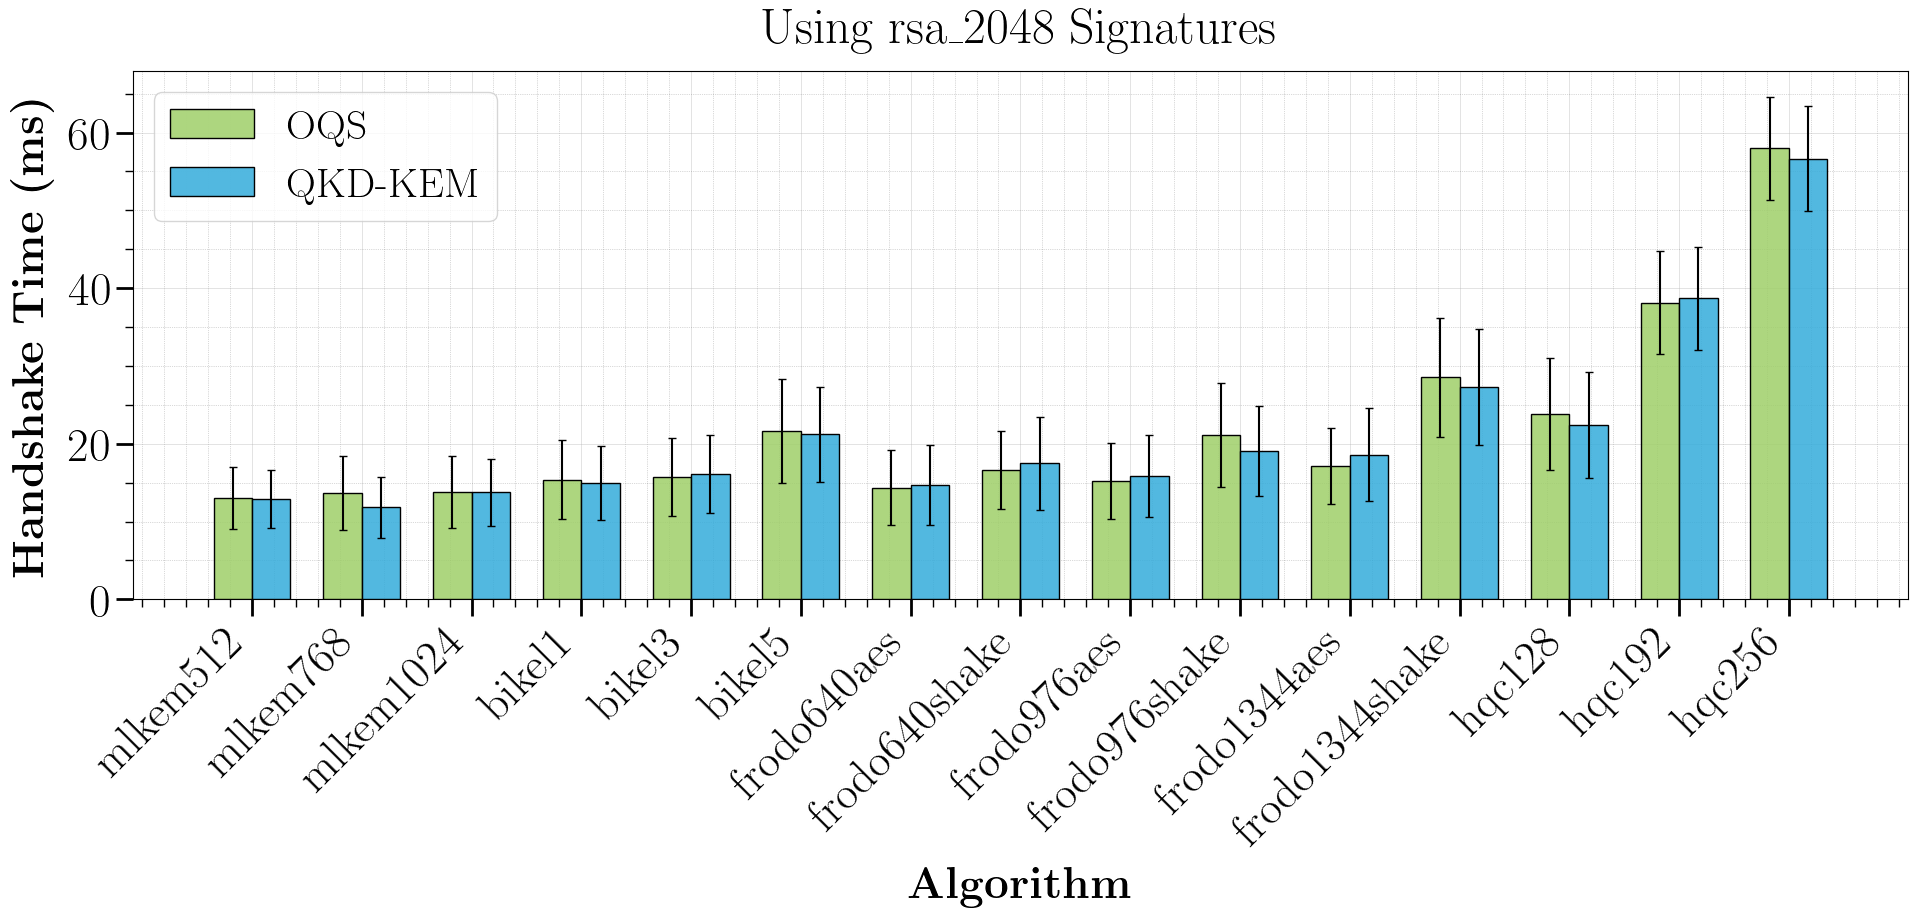

In [51]:
plot_tls_kem_families(input_df=merged_df, cert_type='rsa_2048', plot_title='tls_kems_comparison_rsa2048.pdf')

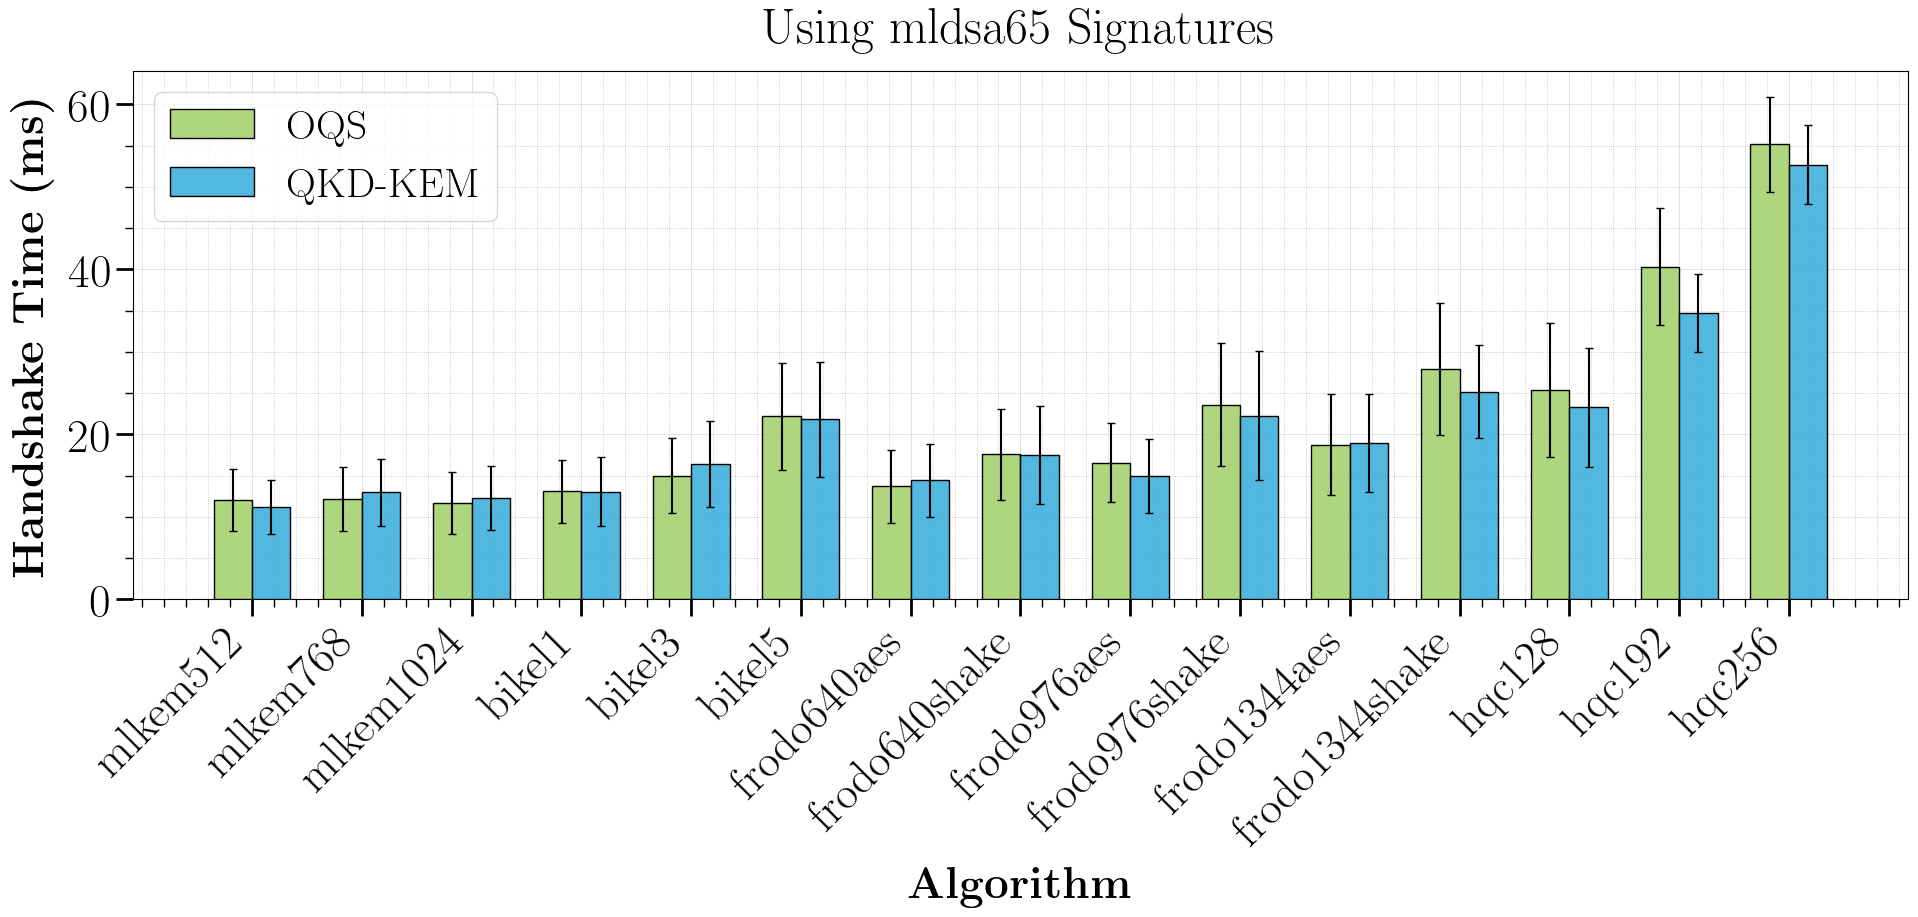

In [52]:
plot_tls_kem_families(input_df=merged_df, cert_type='mldsa65', plot_title='tls_kems_comparison_mldsa65.pdf')